In [ ]:
import time
import scipy
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import collections
import pandas as pd
import seaborn as sns

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

# Load Dataset

In [ ]:
# We loaded the datasets on drive: do not run if not needed
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

## Dataset Without Null Variables

In [ ]:
xy1_2= pd.read_csv("/content/drive/MyDrive/Business/2020/XY1_good_wo_0avgperday.csv", index_col=[0])
xy2_2= pd.read_csv("/content/drive/MyDrive/Business/2020/XY2_good_wo_0avgperday.csv", index_col=[0])


In [ ]:
#xy1_2= pd.read_csv("/content/XY1_good_wo_0avgperday.csv", index_col=[0])
#xy2_2= pd.read_csv("/content/XY2_good_wo_0avgperday.csv", index_col=[0])


### X1 & Y1: Data for first problem

In [ ]:
y1_2 = pd.DataFrame(xy1_2['FORMER_SMOKER'])

In [ ]:
y1_2

,FORMER_SMOKER
2,1
14,1
22,1
23,0
24,1
...,...
31551,1
31554,0
31560,1
31563,1


In [ ]:
x1_2 = xy1_2.drop(columns=['FORMER_SMOKER'])

In [ ]:
x1_2

,GENDER,AGE,HEALTH,ANXIETY_LEVEL,FATIGUE_LEVEL,ATLEAST_100CIG_SMOKED,AGE_FIRST_SMOKER,ADVISED_QUITTING,EVER_USED_ECIG,SMOKING_STATUS_ECIG,AVG_CIG_PERDAY
2,1,42,3,0.0,0.0,1,18.0,0.0,1,1,5.0
14,1,56,3,1.0,0.0,1,13.0,0.0,1,2,10.0
22,1,50,4,1.0,1.0,1,20.0,0.0,0,3,15.0
23,2,61,3,2.0,2.0,1,16.0,1.0,0,3,5.0
24,2,73,4,0.0,2.0,1,23.0,0.0,0,3,5.0
...,...,...,...,...,...,...,...,...,...,...,...
31551,1,55,3,1.0,1.0,1,18.0,0.0,0,3,15.0
31554,2,63,4,2.0,2.0,1,30.0,0.0,1,2,10.0
31560,2,60,1,1.0,3.0,1,19.0,0.0,0,3,15.0
31563,1,59,3,1.0,1.0,1,16.0,0.0,0,3,5.0


In [ ]:
counter = collections.Counter(xy1_2.FORMER_SMOKER)
counter

Counter({1: 7843, 0: 809})

In [ ]:
xy1_NonFormerSmk= xy1_2[xy1_2.FORMER_SMOKER == 0]
xy1_NonFormerSmk

,GENDER,AGE,HEALTH,ANXIETY_LEVEL,FATIGUE_LEVEL,ATLEAST_100CIG_SMOKED,AGE_FIRST_SMOKER,ADVISED_QUITTING,EVER_USED_ECIG,SMOKING_STATUS_ECIG,FORMER_SMOKER,AVG_CIG_PERDAY
23,2,61,3,2.0,2.0,1,16.0,1.0,0,3,0,5.0
46,1,56,4,3.0,2.0,1,15.0,1.0,0,3,0,4.0
47,1,52,1,2.0,3.0,1,17.0,0.0,0,3,0,10.0
77,2,67,2,1.0,1.0,1,26.0,0.0,0,3,0,2.0
104,1,54,3,2.0,3.0,1,24.0,1.0,1,2,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31366,1,63,3,1.0,2.0,1,40.0,0.0,0,3,0,1.0
31438,1,55,5,3.0,3.0,1,19.0,1.0,0,3,0,20.0
31479,2,70,5,2.0,2.0,1,17.0,1.0,0,3,0,1.0
31518,1,61,3,2.0,2.0,1,26.0,0.0,0,3,0,1.0


In [ ]:
y1_NonFormerSmk = pd.DataFrame(xy1_NonFormerSmk['FORMER_SMOKER'])

In [ ]:
x1_NonFormerSmk = xy1_NonFormerSmk.drop(columns=['FORMER_SMOKER'])

In [ ]:
xy1_FormerSmk= xy1_2[xy1_2.FORMER_SMOKER == 1]
xy1_FormerSmk

,GENDER,AGE,HEALTH,ANXIETY_LEVEL,FATIGUE_LEVEL,ATLEAST_100CIG_SMOKED,AGE_FIRST_SMOKER,ADVISED_QUITTING,EVER_USED_ECIG,SMOKING_STATUS_ECIG,FORMER_SMOKER,AVG_CIG_PERDAY
2,1,42,3,0.0,0.0,1,18.0,0.0,1,1,1,5.0
14,1,56,3,1.0,0.0,1,13.0,0.0,1,2,1,10.0
22,1,50,4,1.0,1.0,1,20.0,0.0,0,3,1,15.0
24,2,73,4,0.0,2.0,1,23.0,0.0,0,3,1,5.0
34,2,27,2,1.0,1.0,1,23.0,0.0,1,1,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31547,1,62,2,1.0,0.0,1,16.0,0.0,0,3,1,10.0
31551,1,55,3,1.0,1.0,1,18.0,0.0,0,3,1,15.0
31560,2,60,1,1.0,3.0,1,19.0,0.0,0,3,1,15.0
31563,1,59,3,1.0,1.0,1,16.0,0.0,0,3,1,5.0


In [ ]:
y1_FormerSmk = pd.DataFrame(xy1_FormerSmk['FORMER_SMOKER'])

In [ ]:
x1_FormerSmk = xy1_FormerSmk.drop(columns=['FORMER_SMOKER'])

In [ ]:
counter = collections.Counter(xy1_2.FORMER_SMOKER)
counter

Counter({1: 7843, 0: 809})

In [ ]:
xy1_NonEcigSmk= xy1_2[xy1_2.EVER_USED_ECIG == 0]
xy1_NonEcigSmk

,GENDER,AGE,HEALTH,ANXIETY_LEVEL,FATIGUE_LEVEL,ATLEAST_100CIG_SMOKED,AGE_FIRST_SMOKER,ADVISED_QUITTING,EVER_USED_ECIG,SMOKING_STATUS_ECIG,FORMER_SMOKER,AVG_CIG_PERDAY
22,1,50,4,1.0,1.0,1,20.0,0.0,0,3,1,15.0
23,2,61,3,2.0,2.0,1,16.0,1.0,0,3,0,5.0
24,2,73,4,0.0,2.0,1,23.0,0.0,0,3,1,5.0
41,2,70,1,0.0,2.0,1,33.0,0.0,0,3,1,5.0
42,1,65,1,2.0,0.0,1,19.0,0.0,0,3,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31547,1,62,2,1.0,0.0,1,16.0,0.0,0,3,1,10.0
31551,1,55,3,1.0,1.0,1,18.0,0.0,0,3,1,15.0
31560,2,60,1,1.0,3.0,1,19.0,0.0,0,3,1,15.0
31563,1,59,3,1.0,1.0,1,16.0,0.0,0,3,1,5.0


In [ ]:
y1_NonEcigSmk = pd.DataFrame(xy1_NonEcigSmk['FORMER_SMOKER'])

In [ ]:
x1_NonEcigSmk = xy1_NonEcigSmk.drop(columns=['FORMER_SMOKER'])

In [ ]:
xy1_EcigSmk= xy1_2[xy1_2.EVER_USED_ECIG == 1]
xy1_EcigSmk

,GENDER,AGE,HEALTH,ANXIETY_LEVEL,FATIGUE_LEVEL,ATLEAST_100CIG_SMOKED,AGE_FIRST_SMOKER,ADVISED_QUITTING,EVER_USED_ECIG,SMOKING_STATUS_ECIG,FORMER_SMOKER,AVG_CIG_PERDAY
2,1,42,3,0.0,0.0,1,18.0,0.0,1,1,1,5.0
14,1,56,3,1.0,0.0,1,13.0,0.0,1,2,1,10.0
34,2,27,2,1.0,1.0,1,23.0,0.0,1,1,1,5.0
36,2,36,1,2.0,1.0,1,18.0,0.0,1,2,1,5.0
53,1,38,1,0.0,2.0,1,16.0,0.0,1,1,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31458,1,24,2,1.0,1.0,1,18.0,0.0,1,2,1,5.0
31463,1,75,5,2.0,0.0,1,14.0,0.0,1,1,1,40.0
31519,1,28,3,1.0,2.0,1,17.0,0.0,1,1,1,20.0
31524,1,45,1,0.0,0.0,1,18.0,0.0,1,2,1,10.0


In [ ]:
y1_EcigSmk = pd.DataFrame(xy1_EcigSmk['FORMER_SMOKER'])

In [ ]:
x1_EcigSmk = xy1_EcigSmk.drop(columns=['FORMER_SMOKER'])

##### SMOTE dataset

In [ ]:
sm = SMOTE( random_state=42, k_neighbors=5)

In [ ]:
X_res1, y_res1 = sm.fit_resample(x1_2, y1_2['FORMER_SMOKER'])

In [ ]:
sm = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)

In [ ]:
X_res2, y_res2 = sm.fit_resample(x1_2, y1_2['FORMER_SMOKER'])

### X2 & Y2: Data for second problem

In [ ]:
xy2_2 = xy2_2.drop(columns=['EVER_USED_ECIG'])

In [ ]:
y2_2 = pd.DataFrame(xy2_2['FORMER_ECIG_SMOKER'])

In [ ]:
y2_2

,FORMER_ECIG_SMOKER
2,1
14,0
34,1
36,0
53,1
...,...
31458,0
31463,1
31519,1
31524,0


In [ ]:

counter = collections.Counter(y2_2.FORMER_ECIG_SMOKER == 0)
counter

Counter({False: 489, True: 1363})

In [ ]:
x2_2 = xy2_2.drop(columns=['FORMER_ECIG_SMOKER'])

In [ ]:
x2_2

,GENDER,AGE,HEALTH,ANXIETY_LEVEL,FATIGUE_LEVEL,ATLEAST_100CIG_SMOKED,AGE_FIRST_SMOKER,ADVISED_QUITTING,AVG_CIG_PERDAY
2,1,42,3,0.0,0.0,1,18.0,0.0,5.0
14,1,56,3,1.0,0.0,1,13.0,0.0,10.0
34,2,27,2,1.0,1.0,1,23.0,0.0,5.0
36,2,36,1,2.0,1.0,1,18.0,0.0,5.0
53,1,38,1,0.0,2.0,1,16.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...
31458,1,24,2,1.0,1.0,1,18.0,0.0,5.0
31463,1,75,5,2.0,0.0,1,14.0,0.0,40.0
31519,1,28,3,1.0,2.0,1,17.0,0.0,20.0
31524,1,45,1,0.0,0.0,1,18.0,0.0,10.0


In [ ]:
xy2_NonFormerSmk= xy2_2[xy2_2.FORMER_ECIG_SMOKER == 0]
xy2_NonFormerSmk

,GENDER,AGE,HEALTH,ANXIETY_LEVEL,FATIGUE_LEVEL,ATLEAST_100CIG_SMOKED,AGE_FIRST_SMOKER,ADVISED_QUITTING,FORMER_ECIG_SMOKER,AVG_CIG_PERDAY
14,1,56,3,1.0,0.0,1,13.0,0.0,0,10.0
36,2,36,1,2.0,1.0,1,18.0,0.0,0,5.0
81,1,69,2,1.0,2.0,1,19.0,0.0,0,4.0
104,1,54,3,2.0,3.0,1,24.0,1.0,0,8.0
107,2,51,4,2.0,2.0,1,22.0,1.0,0,6.0
...,...,...,...,...,...,...,...,...,...,...
31384,1,21,1,1.0,0.0,1,16.0,0.0,0,1.0
31439,1,57,3,2.0,3.0,1,19.0,0.0,0,15.0
31458,1,24,2,1.0,1.0,1,18.0,0.0,0,5.0
31524,1,45,1,0.0,0.0,1,18.0,0.0,0,10.0


In [ ]:
y2_NonFormerSmk = pd.DataFrame(xy2_NonFormerSmk['FORMER_ECIG_SMOKER'])

In [ ]:
x2_NonFormerSmk = xy2_NonFormerSmk.drop(columns=['FORMER_ECIG_SMOKER'])

In [ ]:
xy2_FormerSmk= xy2_2[xy2_2.FORMER_ECIG_SMOKER == 1]
xy2_FormerSmk

,GENDER,AGE,HEALTH,ANXIETY_LEVEL,FATIGUE_LEVEL,ATLEAST_100CIG_SMOKED,AGE_FIRST_SMOKER,ADVISED_QUITTING,FORMER_ECIG_SMOKER,AVG_CIG_PERDAY
2,1,42,3,0.0,0.0,1,18.0,0.0,1,5.0
34,2,27,2,1.0,1.0,1,23.0,0.0,1,5.0
53,1,38,1,0.0,2.0,1,16.0,0.0,1,20.0
129,2,67,4,1.0,3.0,1,20.0,0.0,1,10.0
130,1,20,4,2.0,3.0,1,19.0,0.0,1,4.0
...,...,...,...,...,...,...,...,...,...,...
31185,1,38,2,1.0,1.0,1,18.0,0.0,1,20.0
31239,2,60,3,0.0,0.0,1,15.0,0.0,1,10.0
31310,1,57,2,2.0,1.0,1,17.0,0.0,1,20.0
31463,1,75,5,2.0,0.0,1,14.0,0.0,1,40.0


In [ ]:
y2_FormerSmk = pd.DataFrame(xy2_FormerSmk['FORMER_ECIG_SMOKER'])

In [ ]:
x2_FormerSmk = xy2_FormerSmk.drop(columns=['FORMER_ECIG_SMOKER'])

##### SMOTE dataset

In [ ]:
sm = SMOTE( random_state=42, k_neighbors=5)

In [ ]:
X_res, y_res = sm.fit_resample(x2_2, y2_2['FORMER_ECIG_SMOKER'])

## Dataset With Null  Avg per Day

In [ ]:
xy1_1= pd.read_csv("/content/XY1_good_with_0avgperday.csv", index_col=[0])
xy2_1= pd.read_csv("/content/XY2_good_with_0avgperday.csv", index_col=[0])


FileNotFoundError: ignored

In [ ]:
xy2_1 = xy2_1.drop(columns=['EVER_USED_ECIG'])
xy2_2 = xy2_2.drop(columns=['EVER_USED_ECIG'])

In [ ]:
y2_1 = pd.DataFrame(xy2_1['FORMER_ECIG_SMOKER'])

In [ ]:
#y2_2 = pd.DataFrame(xy2_2['FORMER_ECIG_SMOKER'])

In [ ]:
x2_1 = xy2_1.drop(columns=['FORMER_SMOKER', 'FORMER_ECIG_SMOKER'])

In [ ]:
y1_1 = pd.DataFrame(xy1_1['FORMER_SMOKER'])


In [ ]:
x1_1 = xy1_1.drop(columns=['FORMER_SMOKER'])
x2_1 = xy2_1.drop(columns=['FORMER_SMOKER'])

# Model

## Look at data

In [ ]:
x1_2

,GENDER,AGE,HEALTH,ANXIETY_LEVEL,FATIGUE_LEVEL,ATLEAST_100CIG_SMOKED,AGE_FIRST_SMOKER,ADVISED_QUITTING,EVER_USED_ECIG,SMOKING_STATUS_ECIG,AVG_CIG_PERDAY
2,1,42,3,0.0,0.0,1,18.0,0.0,1,1,5.0
14,1,56,3,1.0,0.0,1,13.0,0.0,1,2,10.0
22,1,50,4,1.0,1.0,1,20.0,0.0,0,3,15.0
23,2,61,3,2.0,2.0,1,16.0,1.0,0,3,5.0
24,2,73,4,0.0,2.0,1,23.0,0.0,0,3,5.0
...,...,...,...,...,...,...,...,...,...,...,...
31551,1,55,3,1.0,1.0,1,18.0,0.0,0,3,15.0
31554,2,63,4,2.0,2.0,1,30.0,0.0,1,2,10.0
31560,2,60,1,1.0,3.0,1,19.0,0.0,0,3,15.0
31563,1,59,3,1.0,1.0,1,16.0,0.0,0,3,5.0


In [ ]:
y1_2

,FORMER_SMOKER
2,1
14,1
22,1
23,0
24,1
...,...
31551,1
31554,0
31560,1
31563,1


In [ ]:
x2_2

,GENDER,AGE,HEALTH,ANXIETY_LEVEL,FATIGUE_LEVEL,ATLEAST_100CIG_SMOKED,AGE_FIRST_SMOKER,ADVISED_QUITTING,AVG_CIG_PERDAY
2,1,42,3,0.0,0.0,1,18.0,0.0,5.0
14,1,56,3,1.0,0.0,1,13.0,0.0,10.0
34,2,27,2,1.0,1.0,1,23.0,0.0,5.0
36,2,36,1,2.0,1.0,1,18.0,0.0,5.0
53,1,38,1,0.0,2.0,1,16.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...
31458,1,24,2,1.0,1.0,1,18.0,0.0,5.0
31463,1,75,5,2.0,0.0,1,14.0,0.0,40.0
31519,1,28,3,1.0,2.0,1,17.0,0.0,20.0
31524,1,45,1,0.0,0.0,1,18.0,0.0,10.0


In [ ]:
y2_2

,FORMER_ECIG_SMOKER
2,1
14,0
34,1
36,0
53,1
...,...
31458,0
31463,1
31519,1
31524,0


## Random Forest

### 1 Define Model : Random Forest 91% | NO SMOTE NEEDED


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x1_2, y1_2['FORMER_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier()
# Train the model on training data
rf.fit(X_train, y_train);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9106317411402157


In [ ]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

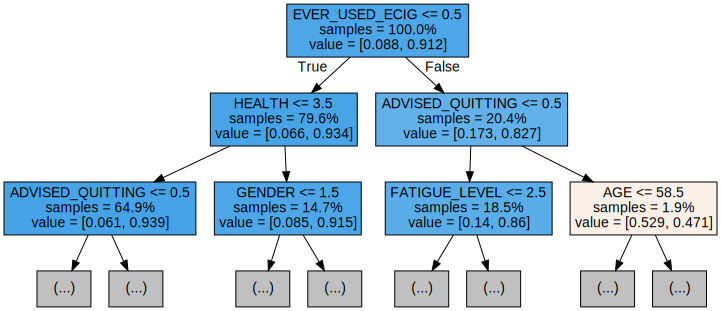

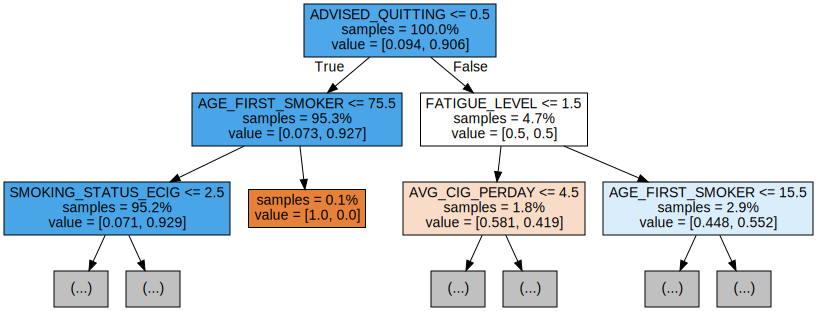

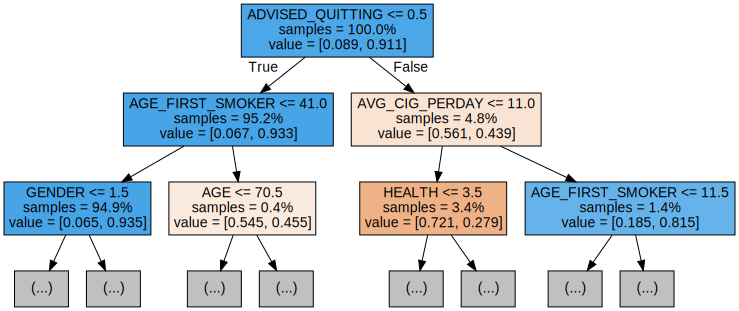

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

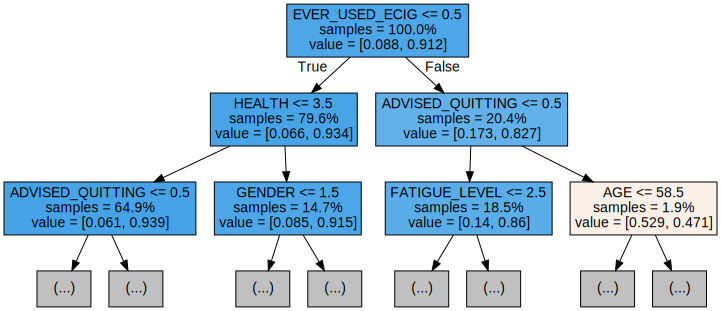

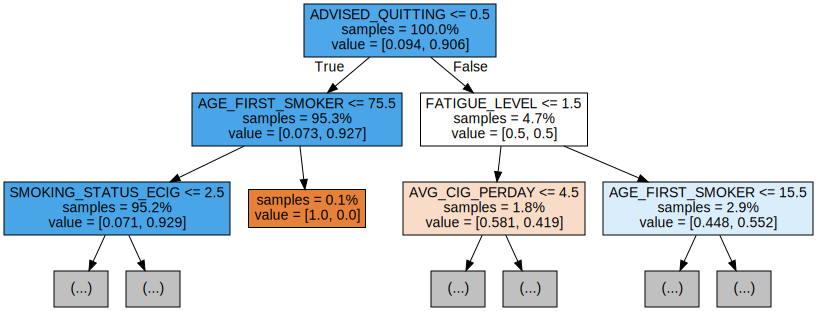

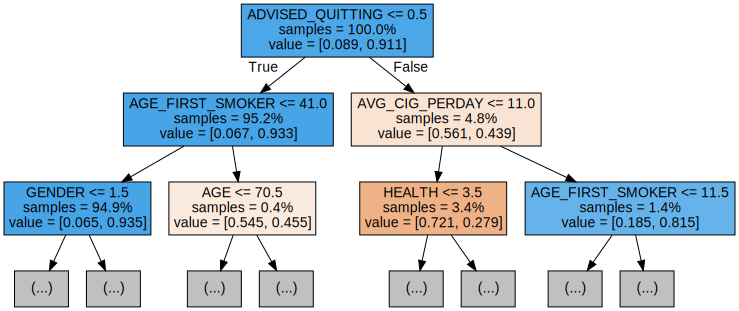

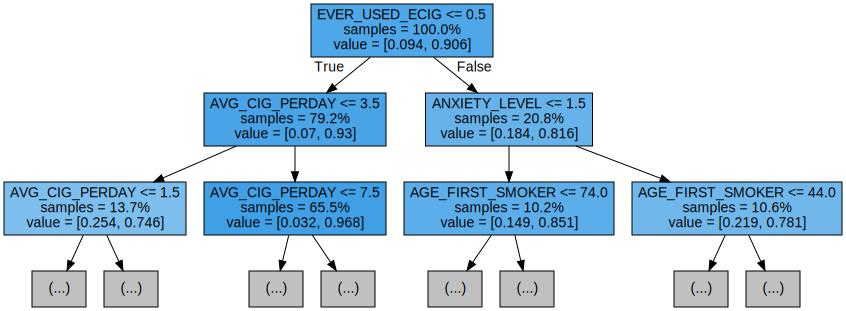

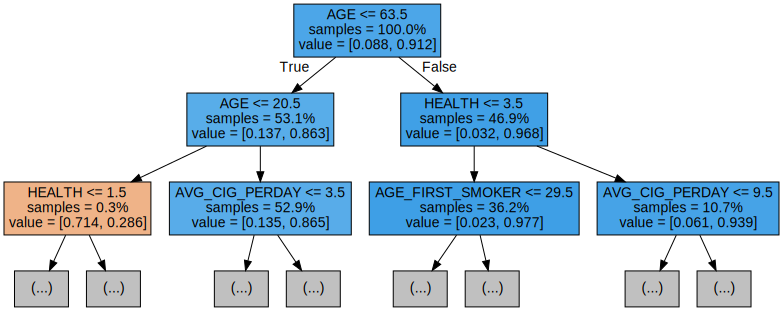

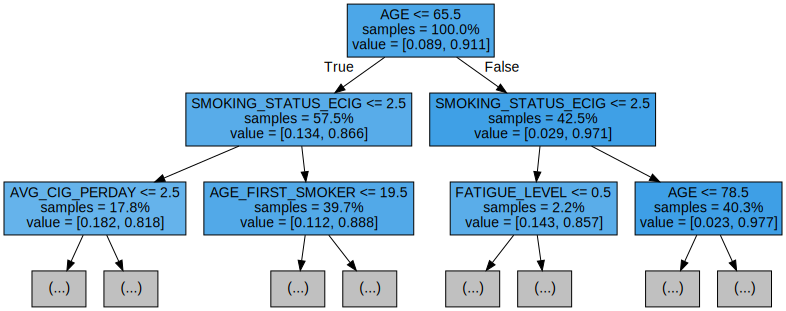

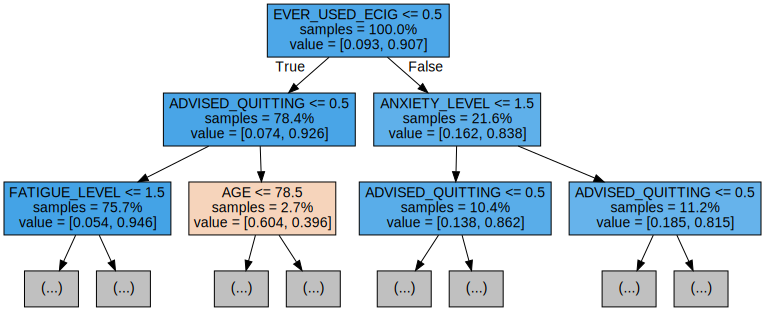

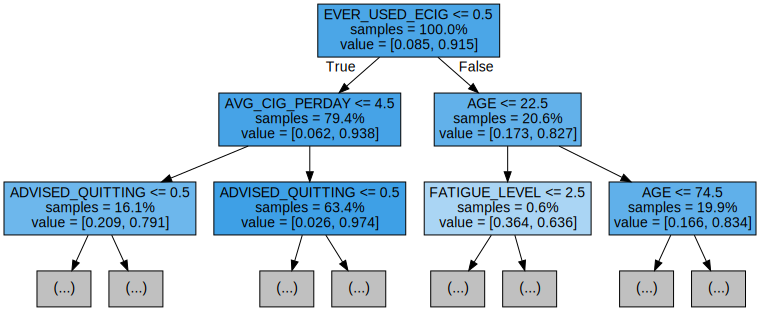

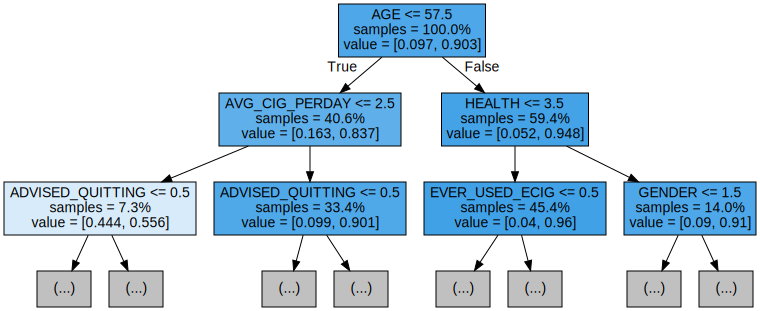

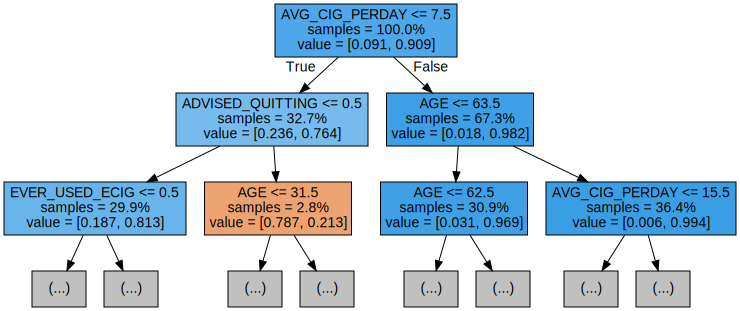

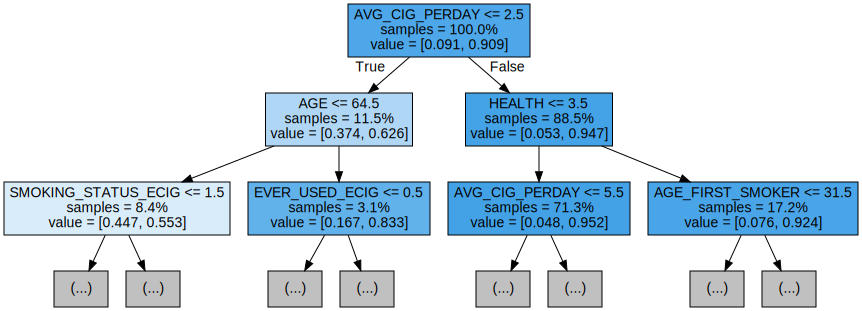

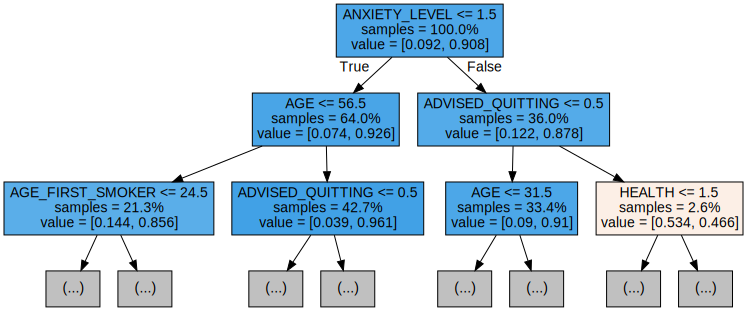

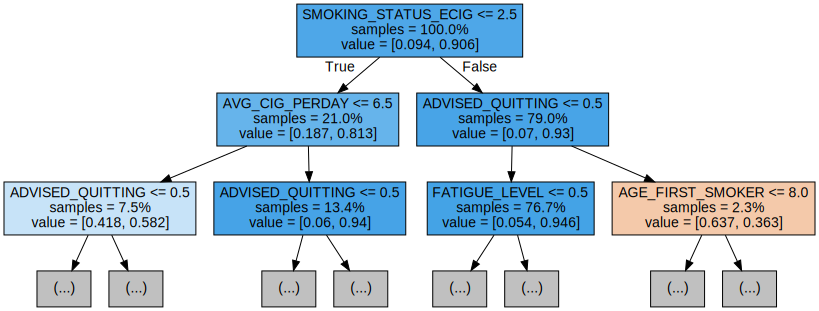

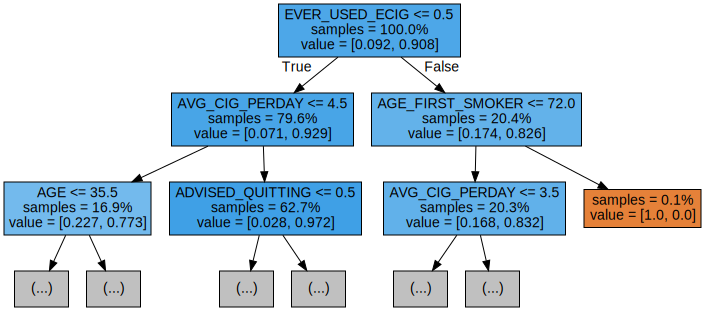

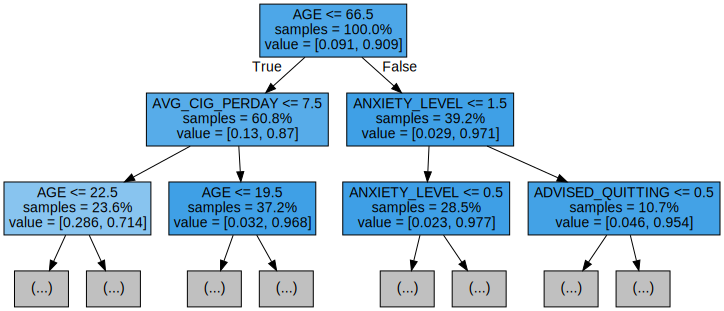

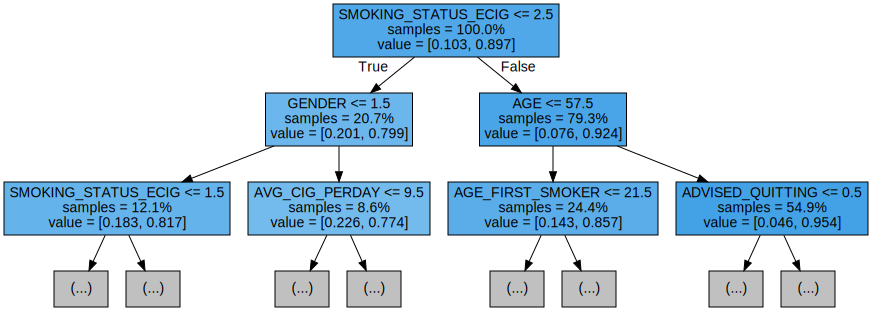

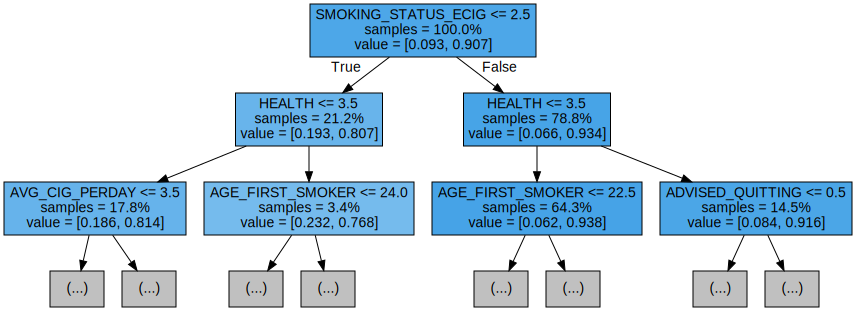

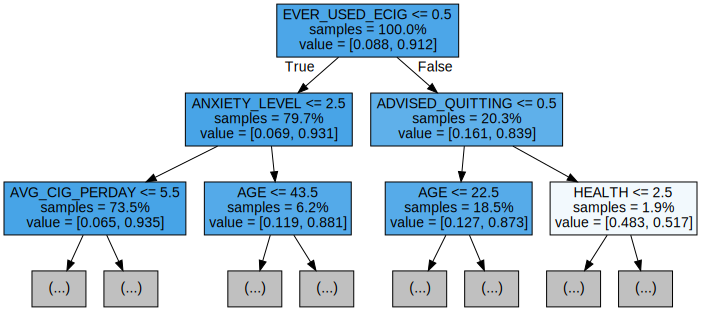

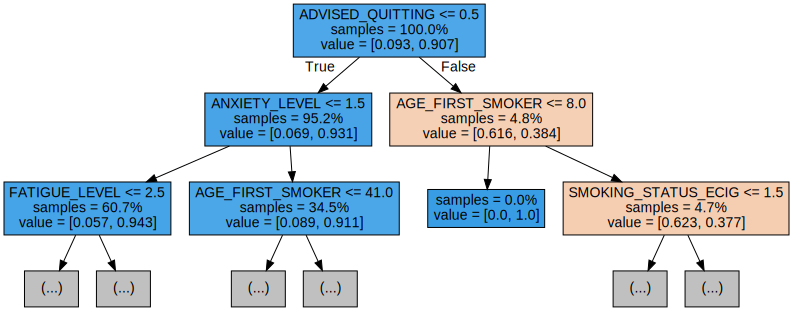

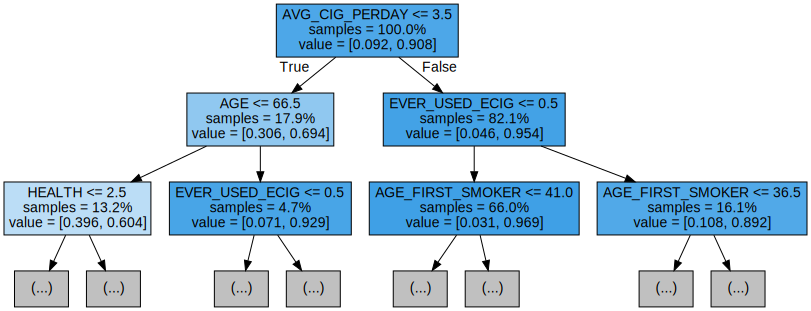

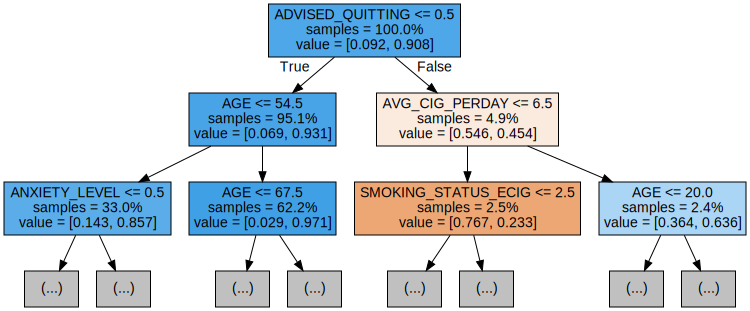

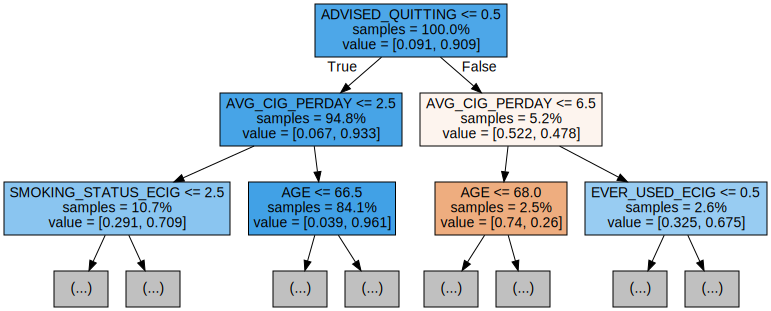

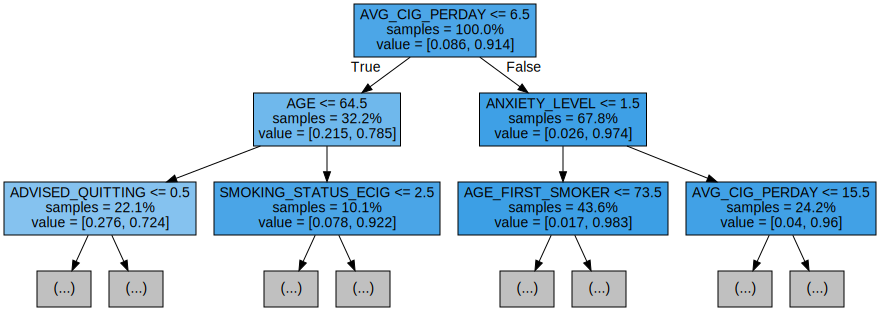

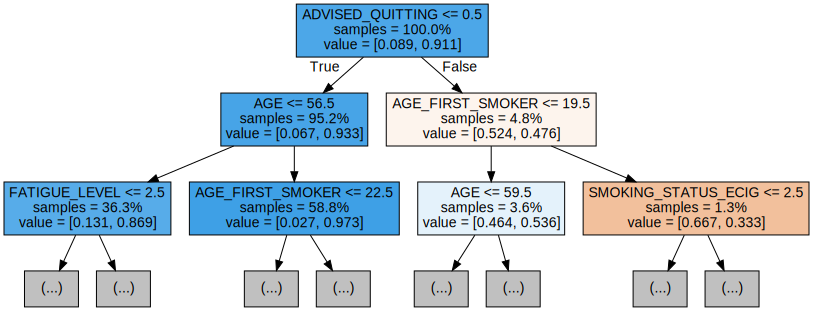

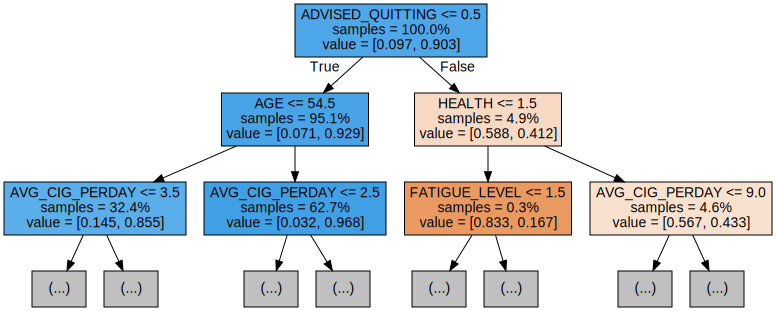

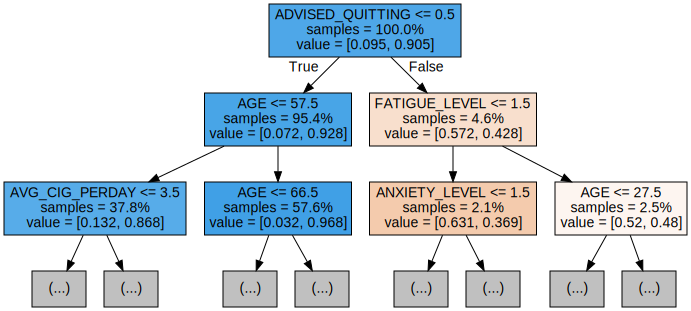

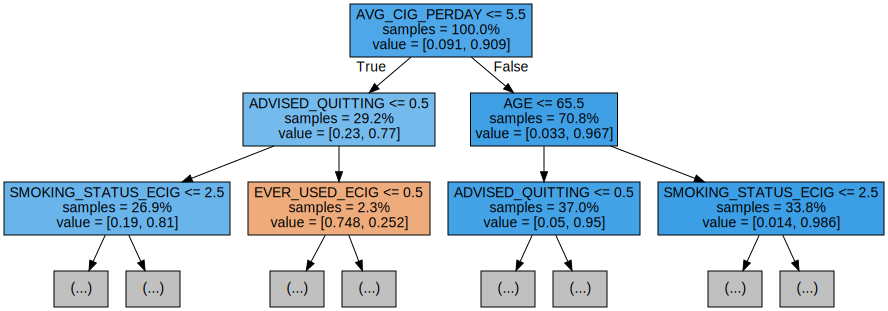

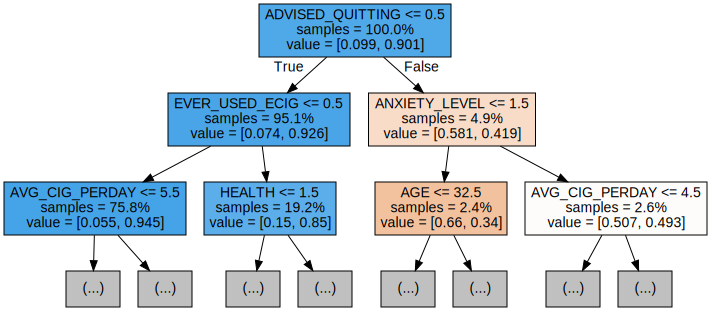

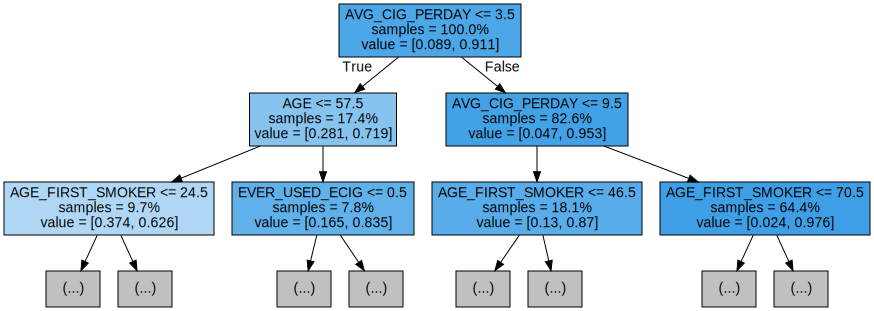

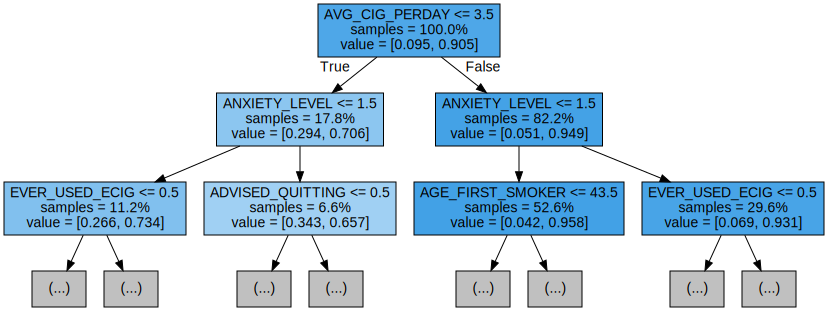

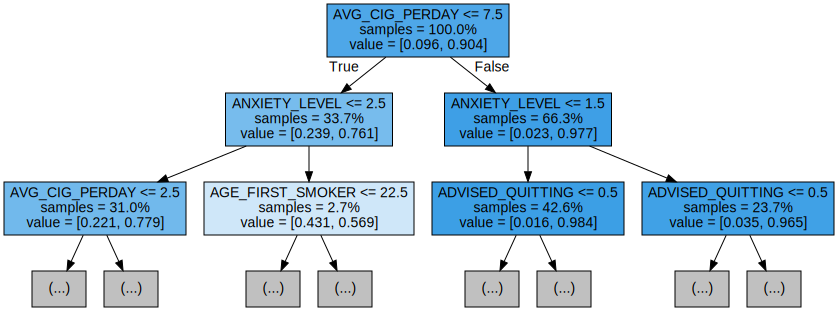

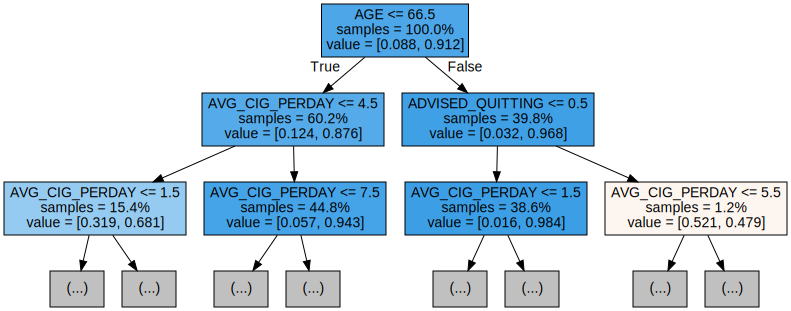

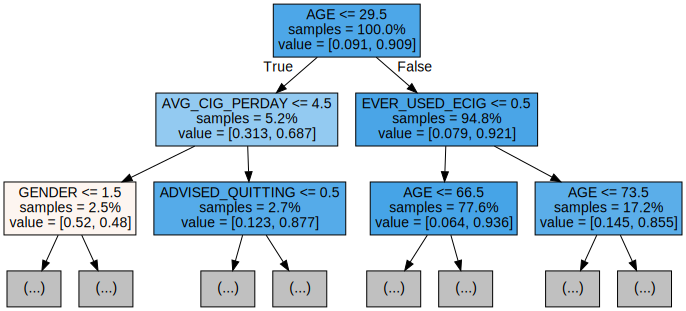

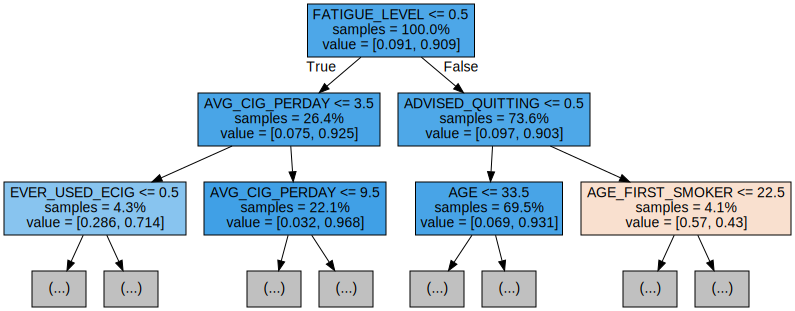

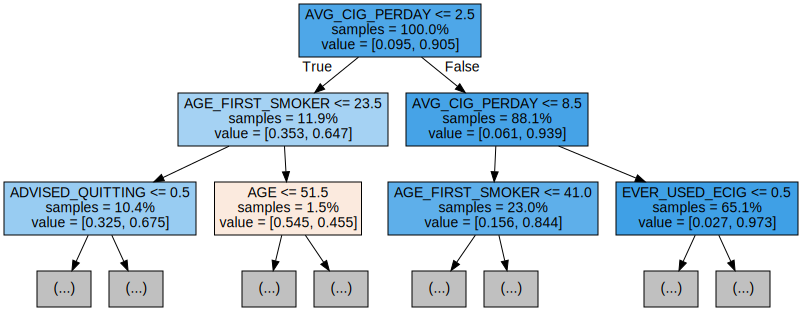

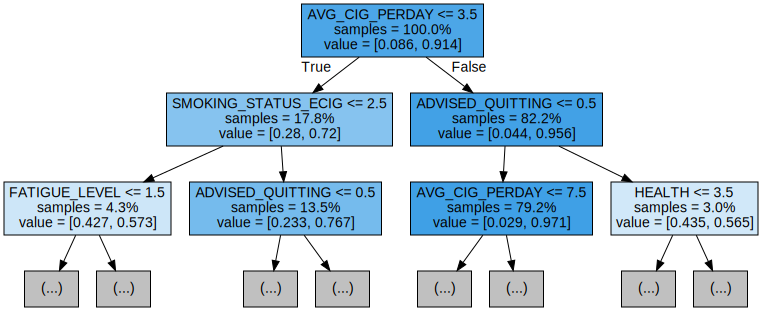

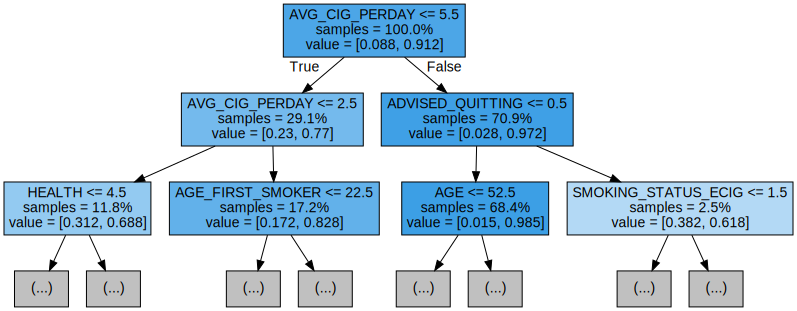

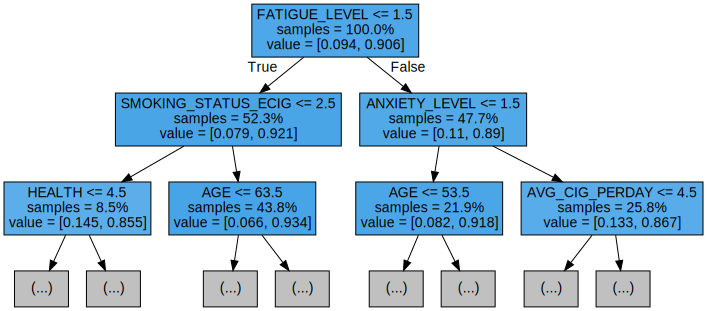

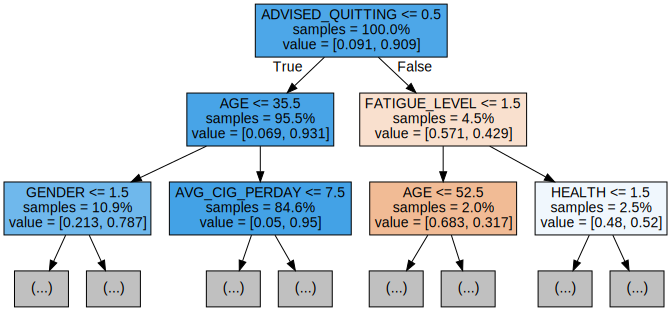

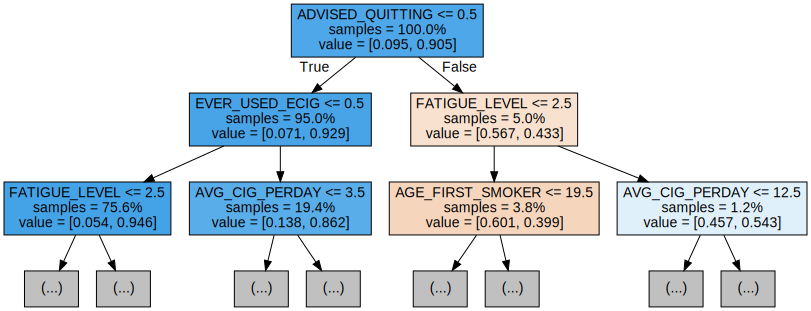

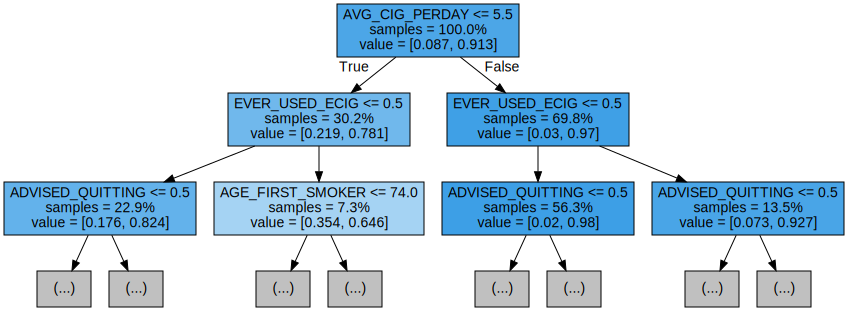

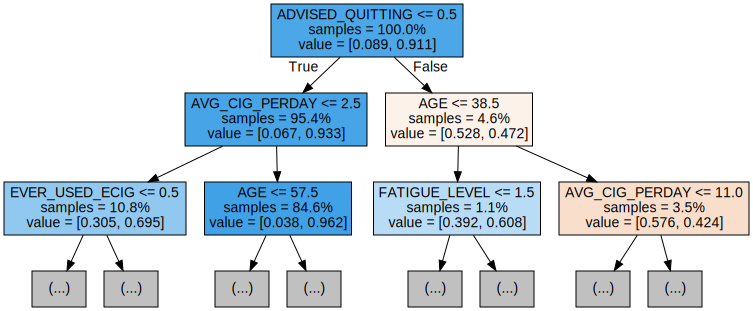

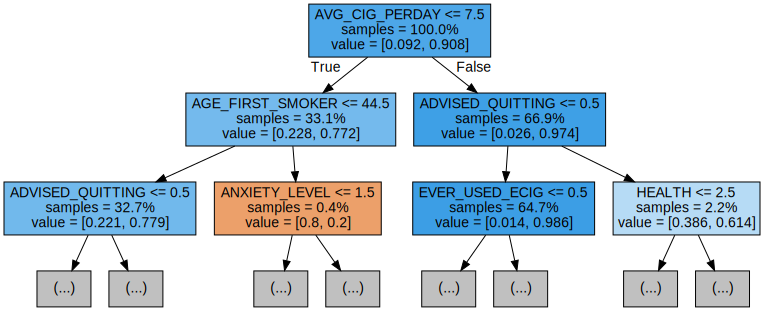

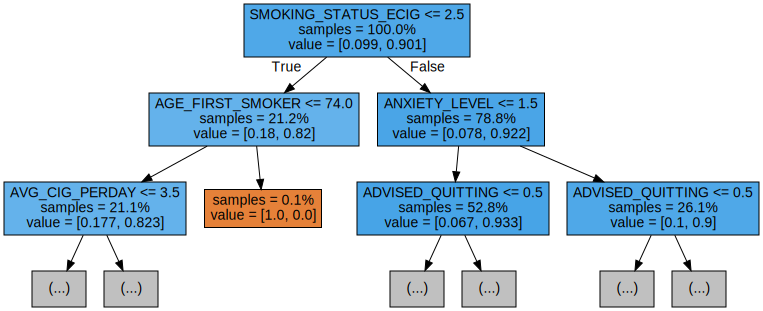

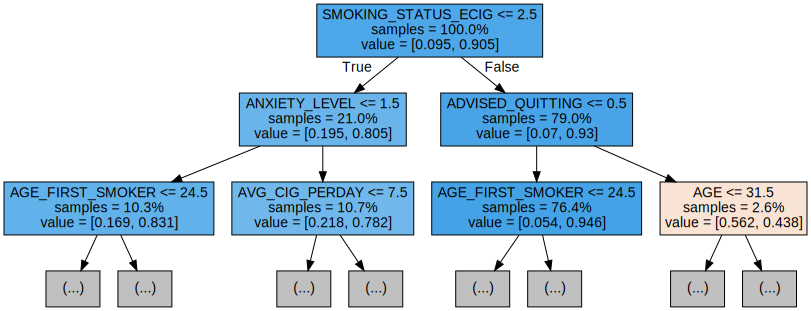

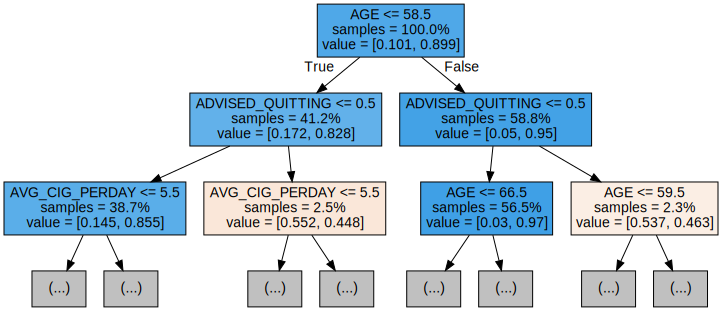

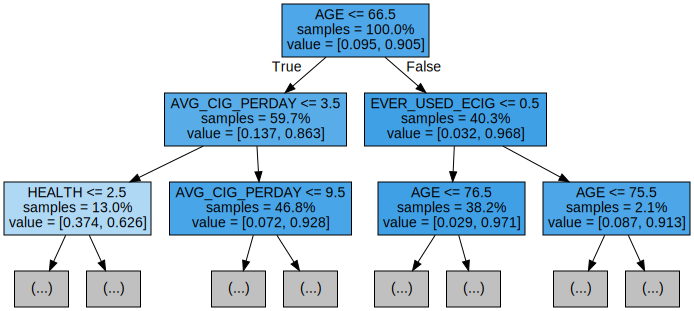

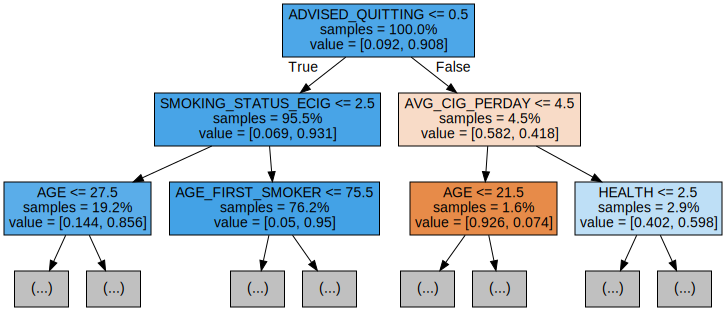

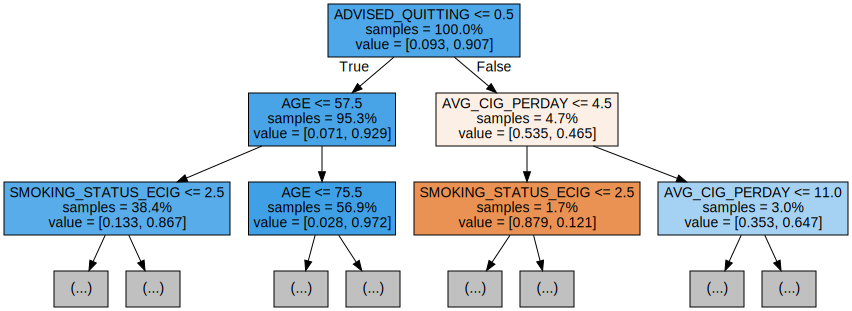

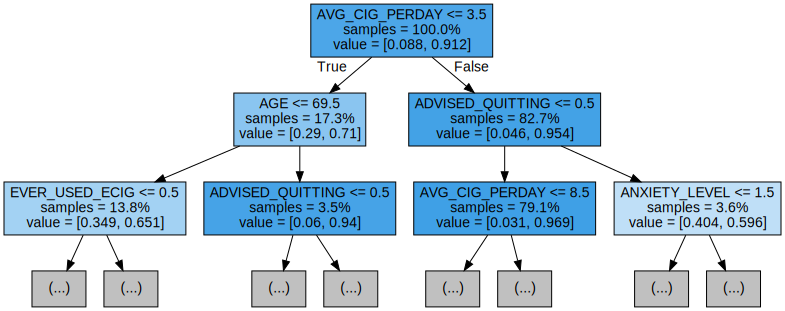

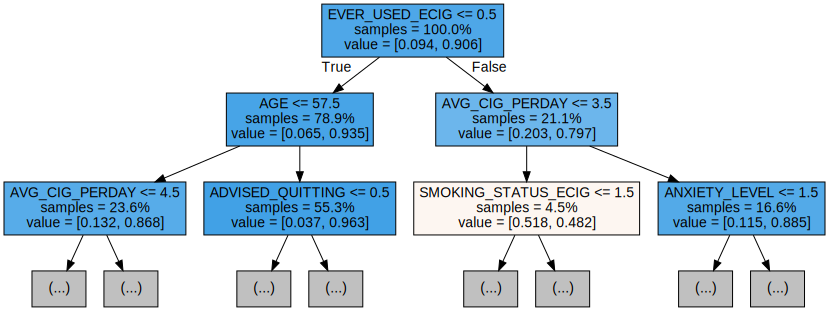

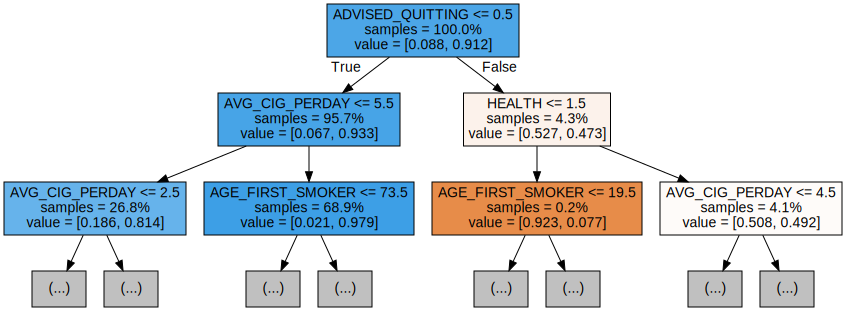

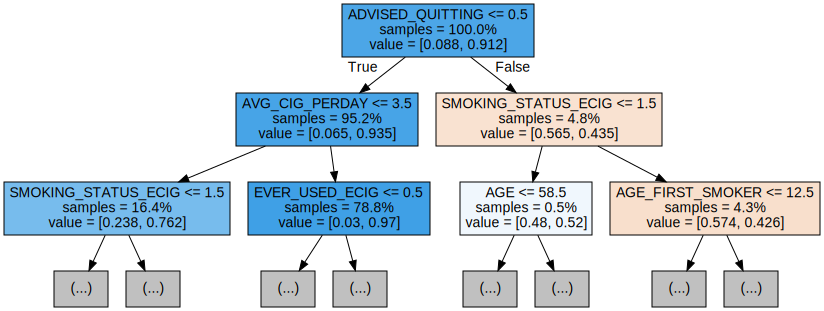

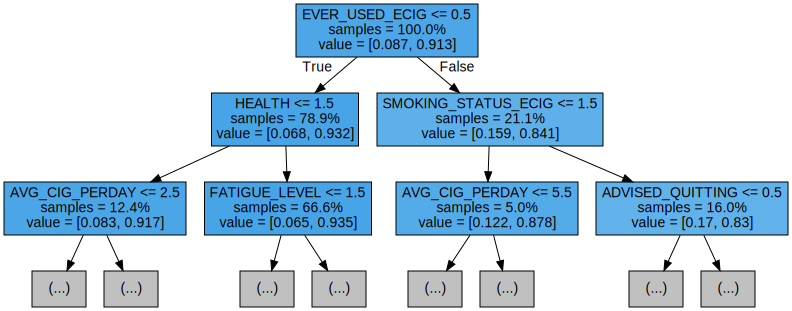

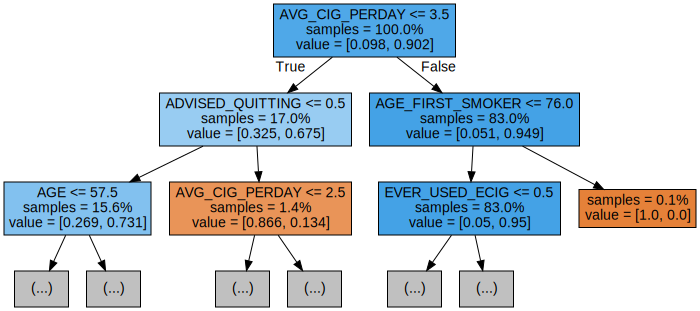

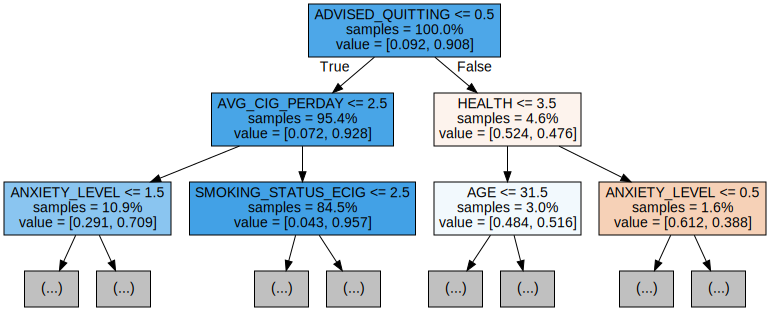

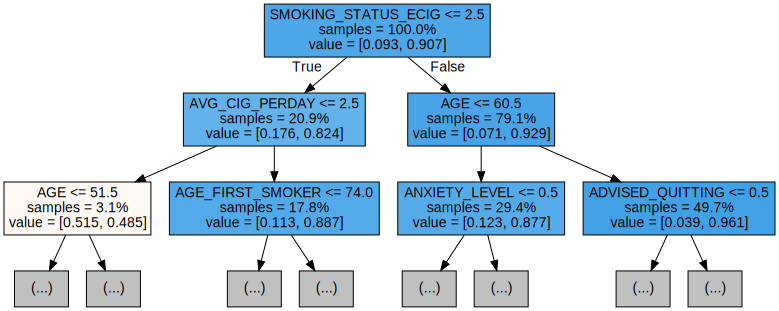

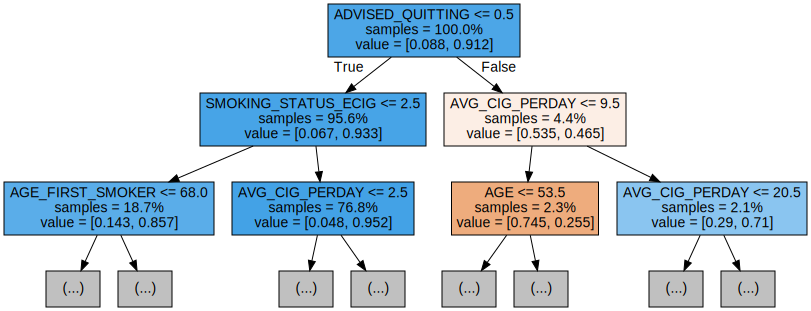

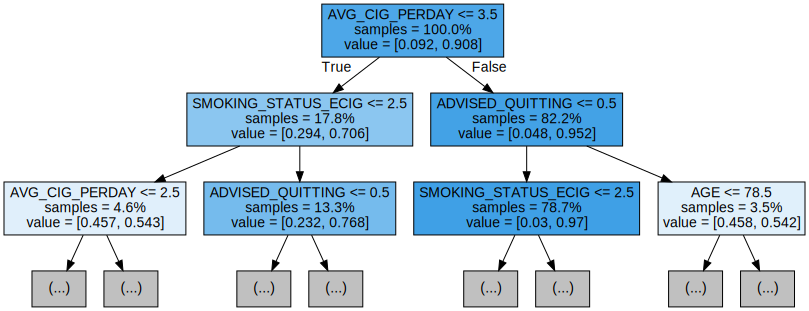

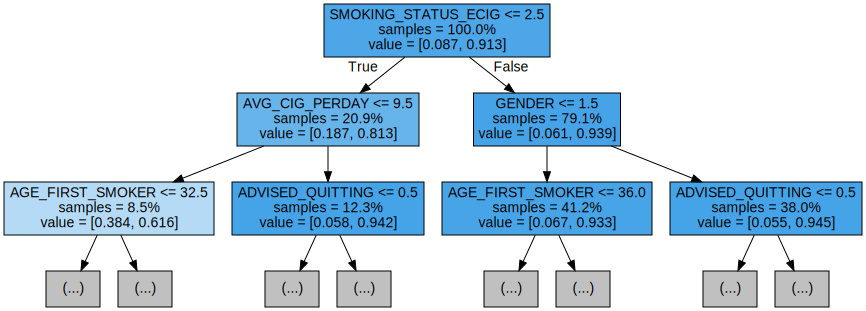

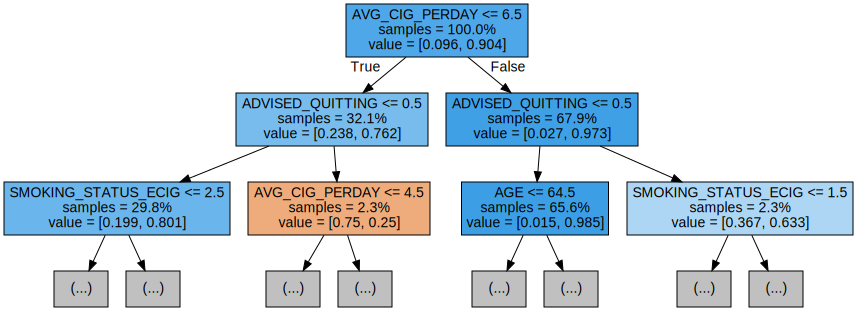

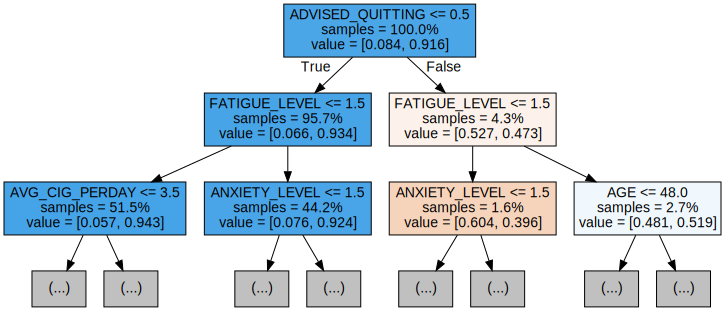

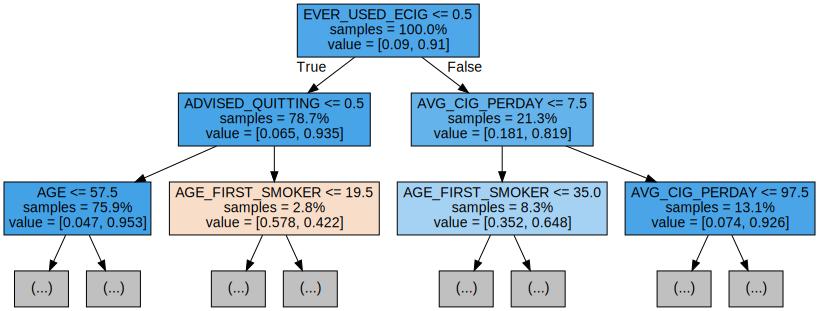

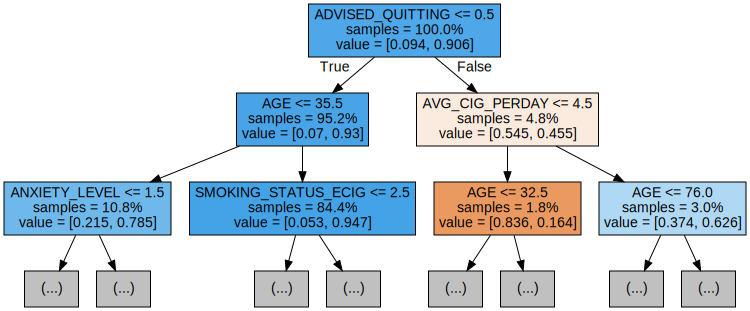

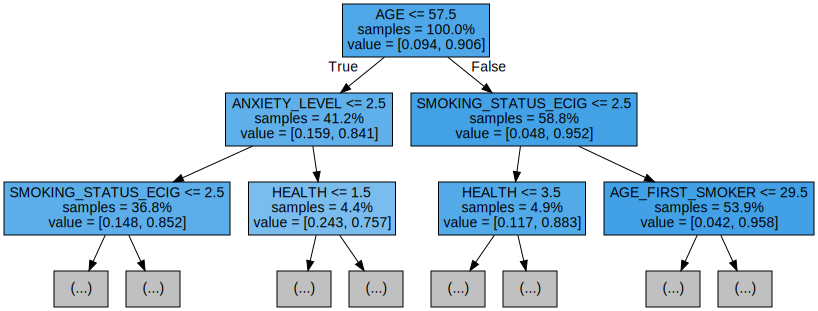

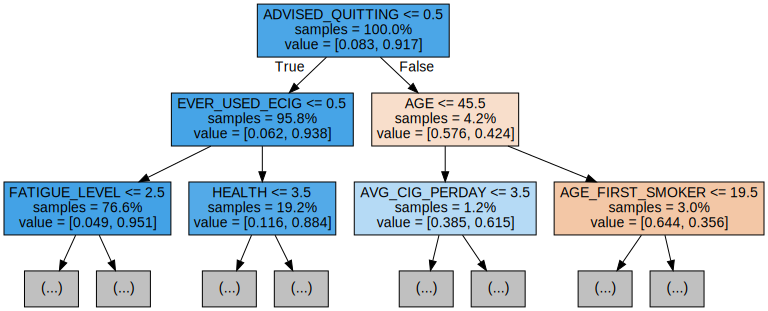

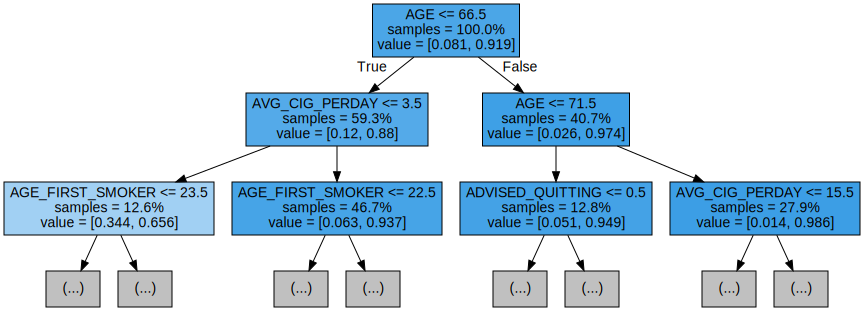

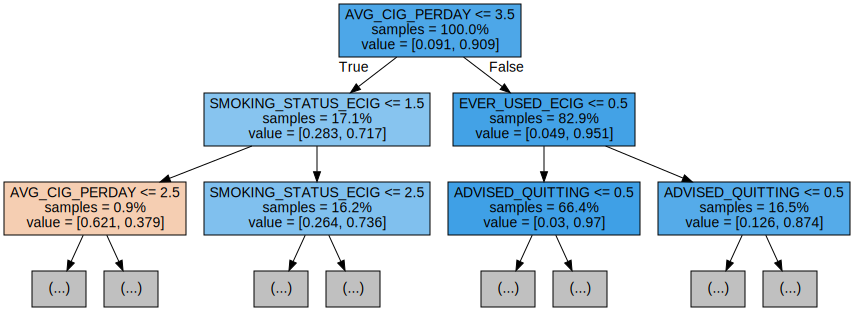

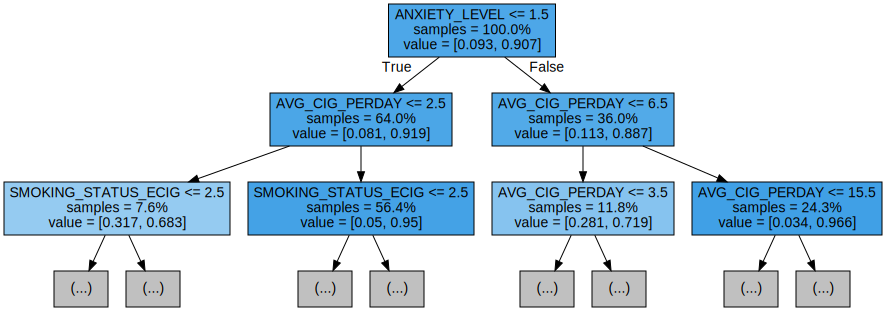

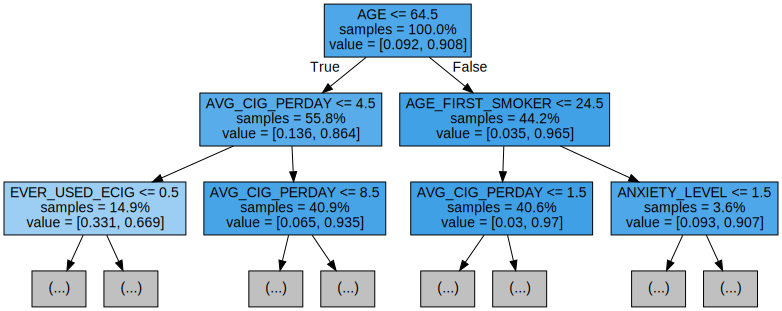

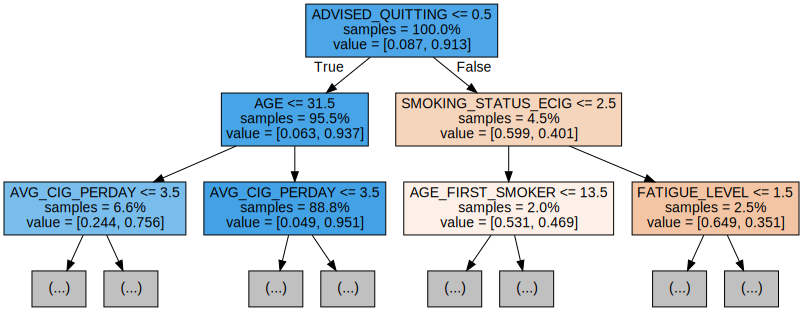

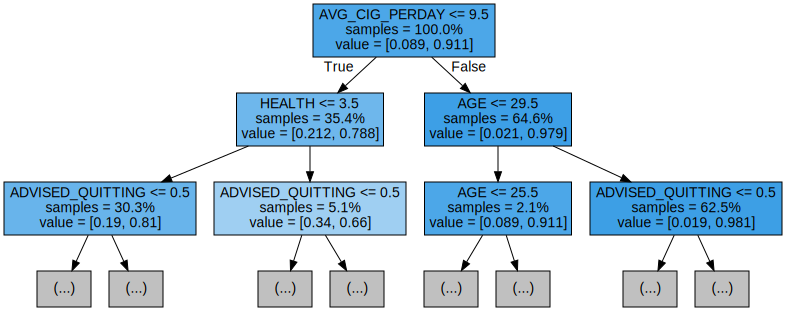

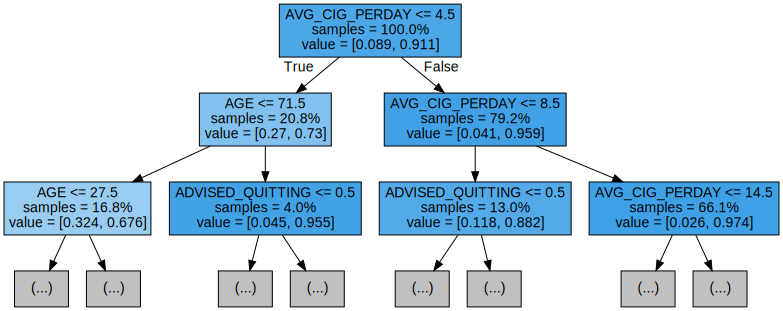

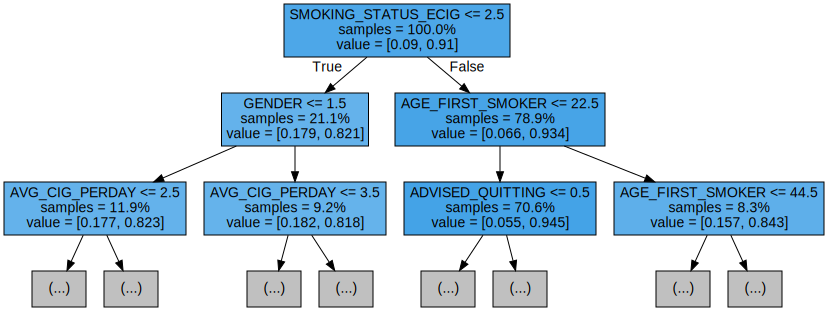

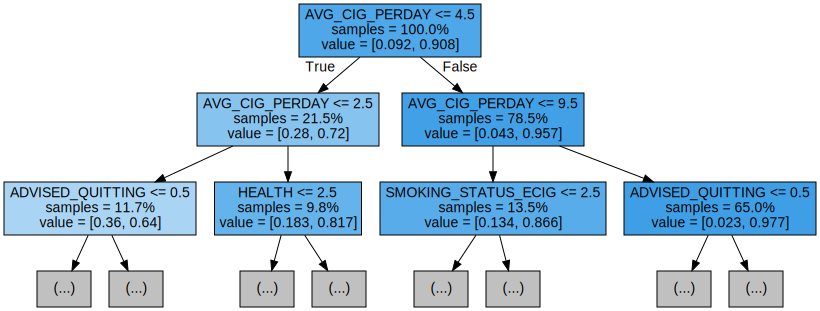

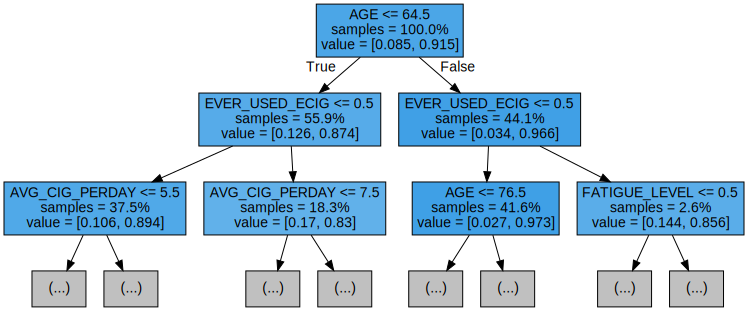

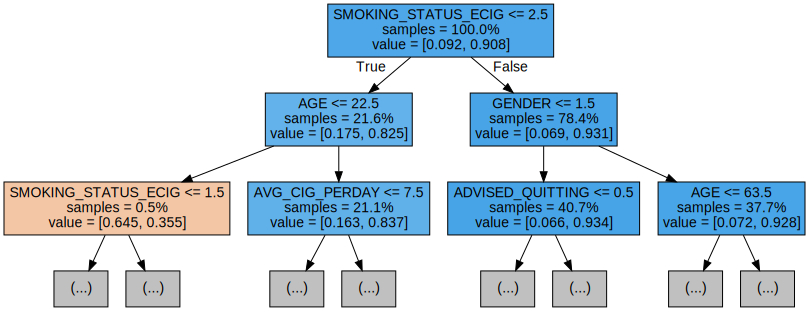

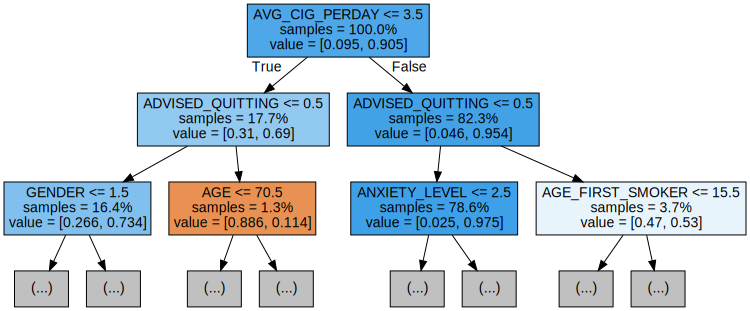

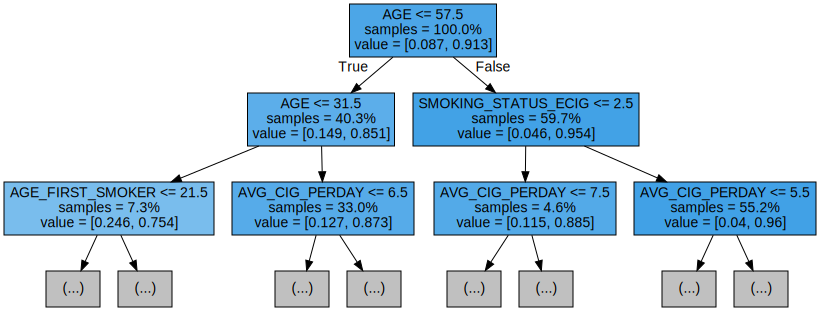

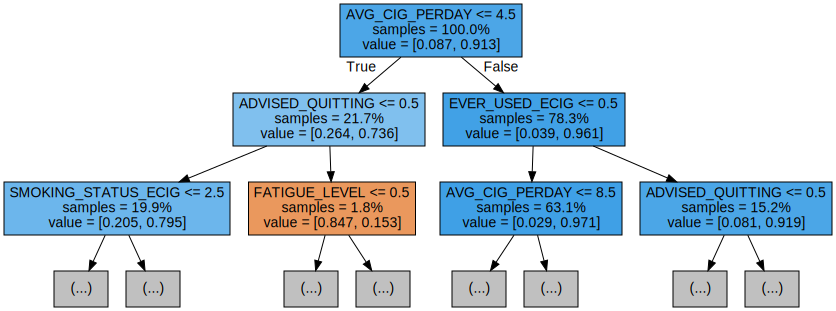

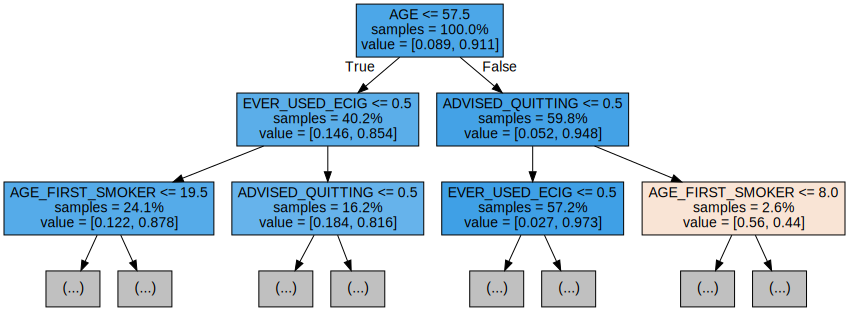

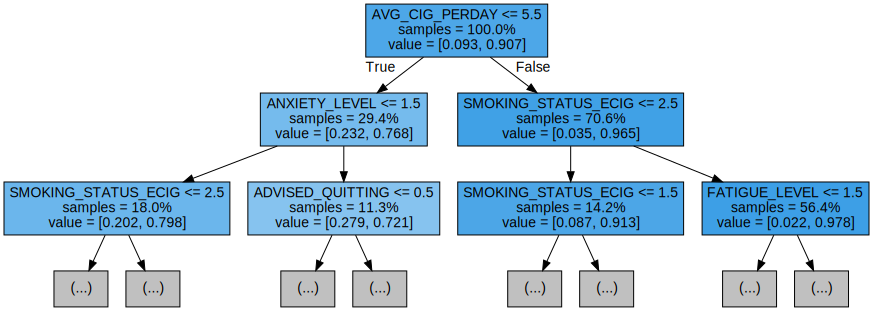

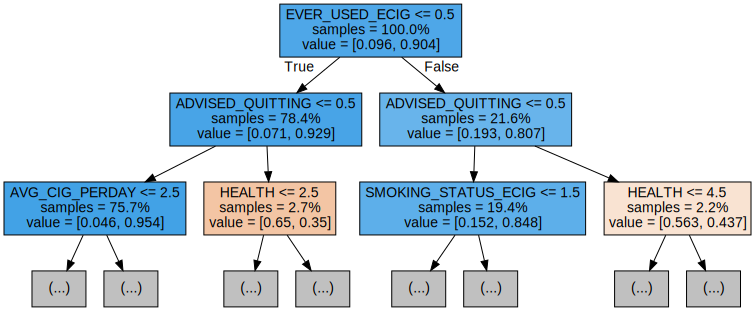

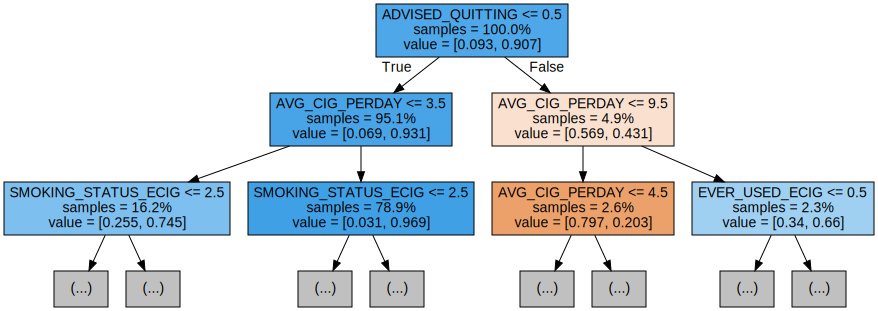

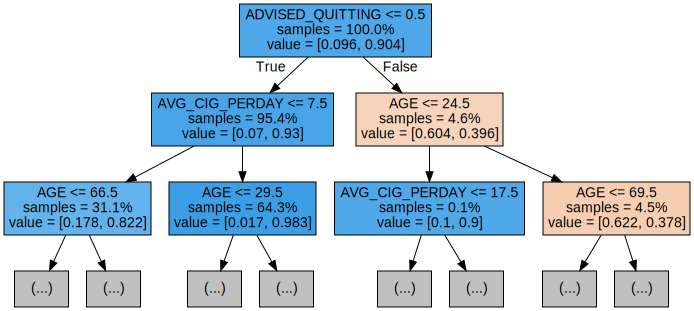

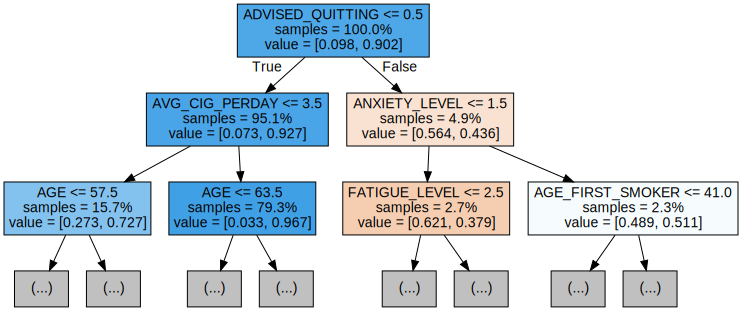

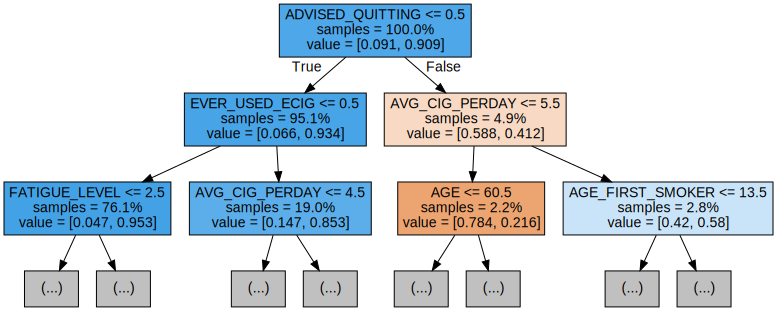

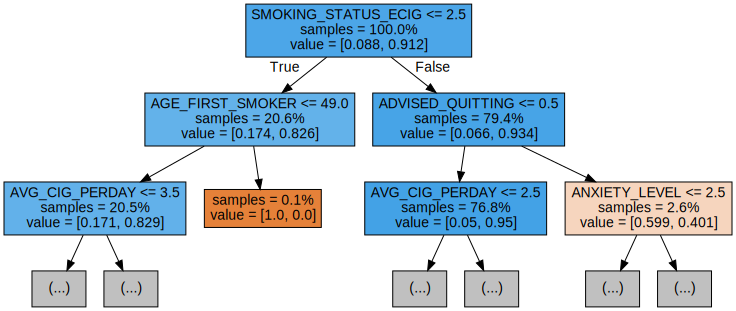

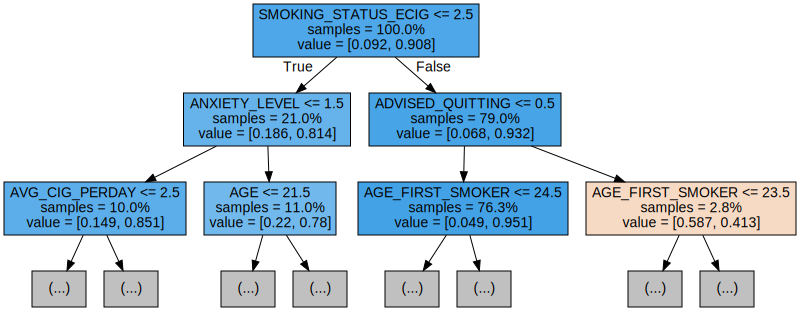

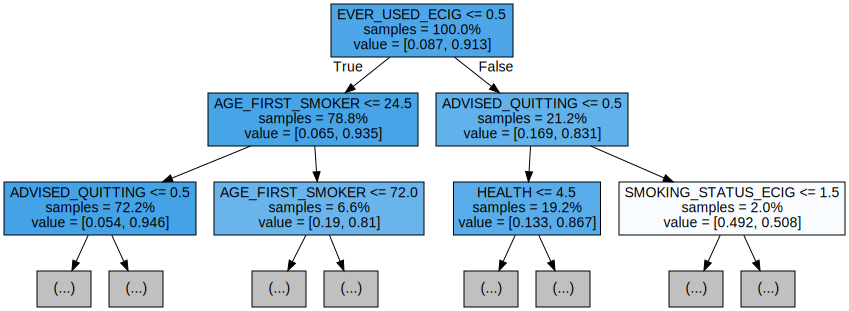

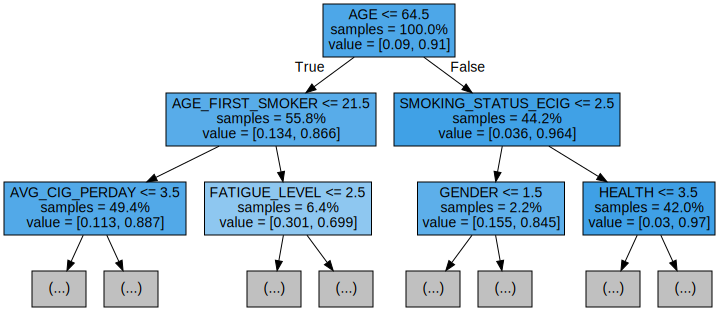

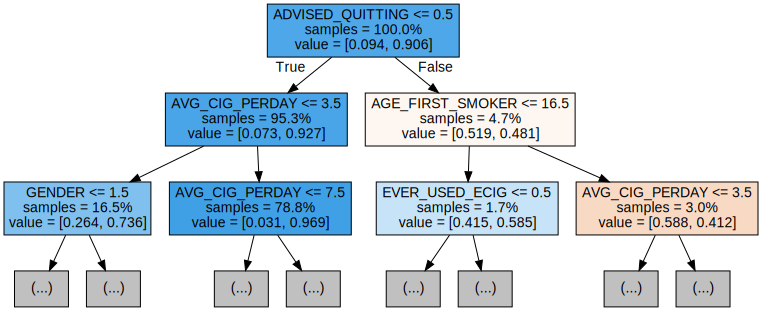

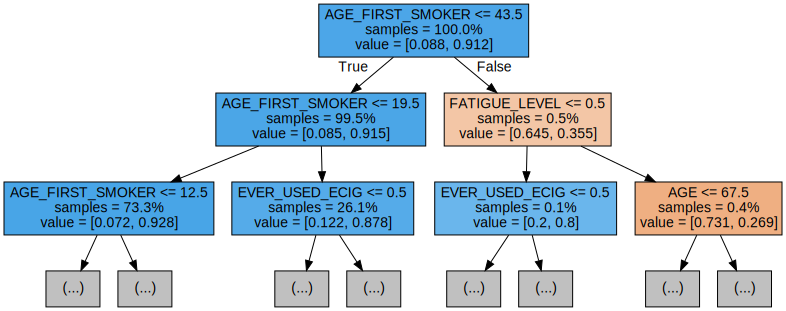

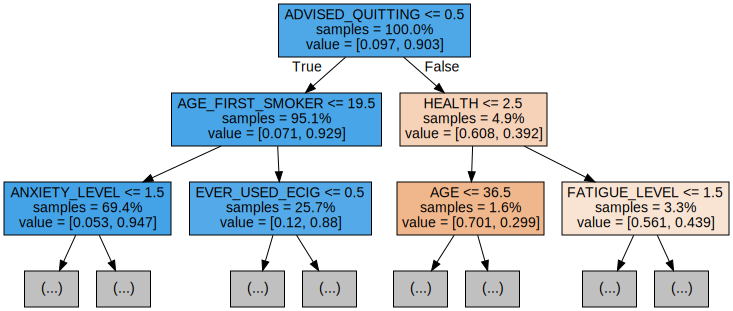

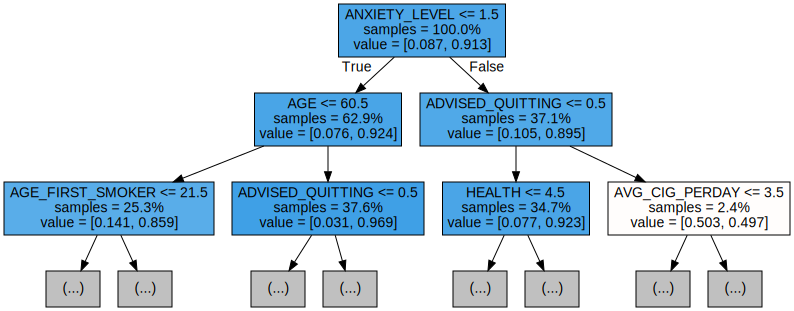

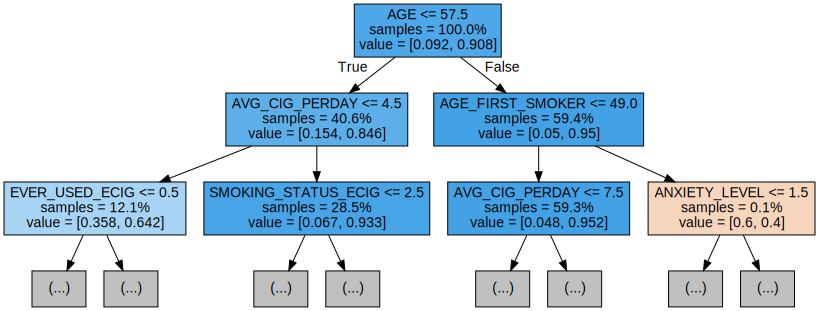

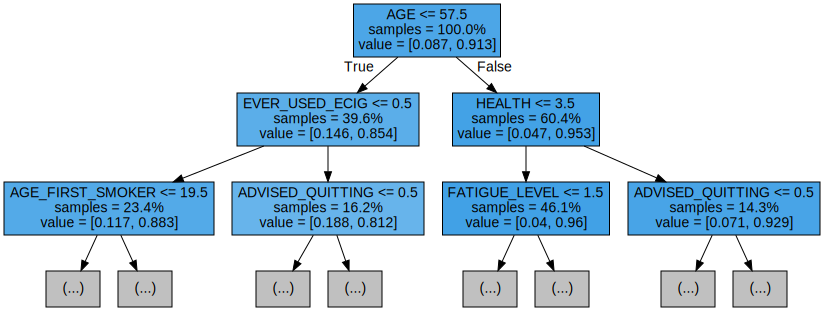

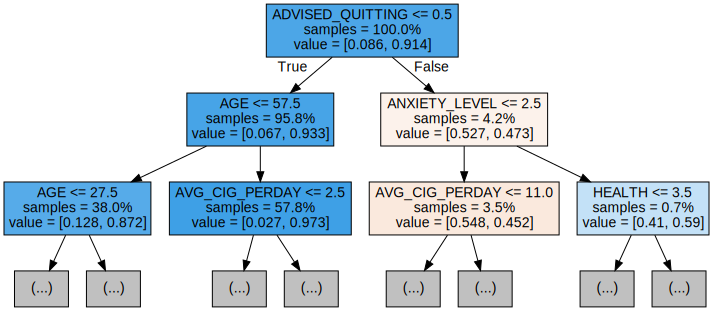

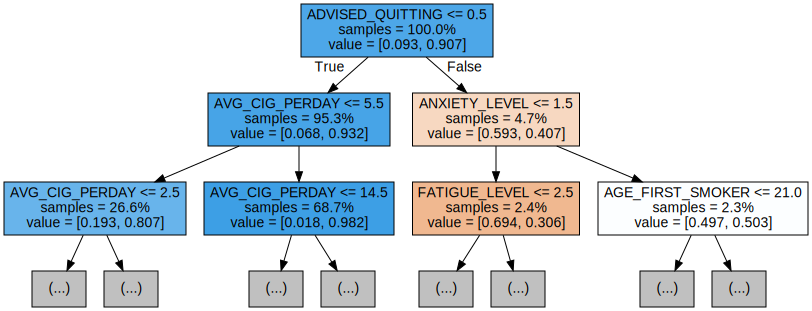

In [ ]:
# Export the first three decision trees from the forest

for i in range(99):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

In [ ]:
len(X_train.columns)

11

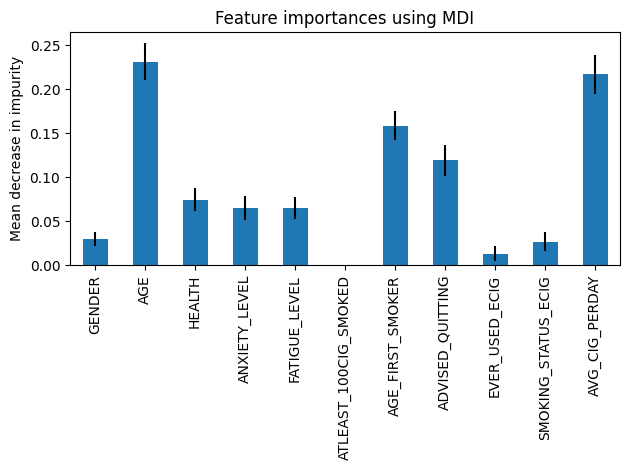

In [ ]:
import pandas as pd

feature_names = [f"{i}" for i in X_train.columns]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
print(forest_importances)

GENDER                   0.030113
AGE                      0.231481
HEALTH                   0.074519
ANXIETY_LEVEL            0.064876
FATIGUE_LEVEL            0.064618
ATLEAST_100CIG_SMOKED    0.000000
AGE_FIRST_SMOKER         0.158389
ADVISED_QUITTING         0.119067
EVER_USED_ECIG           0.013191
SMOKING_STATUS_ECIG      0.026891
AVG_CIG_PERDAY           0.216856
dtype: float64


In [ ]:
y_list=y_test.to_list()
pred_list=predictions.tolist()

In [ ]:
d = pd.DataFrame({"item" : pred_list})
counter = collections.Counter(d.item == 0)
counter

Counter({False: 2447, True: 149})

In [ ]:
d = pd.DataFrame({"item" : y_list})
counter = collections.Counter(d.item == 0)
counter

Counter({False: 2339, True: 257})

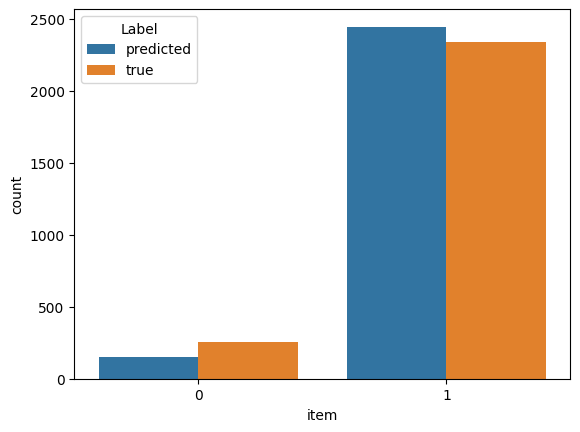

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction No FormerSmk 80%



In [ ]:
X_trainNf, X_testNf, y_trainNf, y_testNf = train_test_split(x1_NonFormerSmk, y1_NonFormerSmk['FORMER_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_testNf)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_testNf, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8065843621399177


In [ ]:
y_list=y_testNf.to_list()
pred_list=predictions.tolist()

In [ ]:
d = pd.DataFrame({"item" : pred_list})
counter = collections.Counter(d.item == 0)
counter

Counter({True: 196, False: 47})

In [ ]:
d = pd.DataFrame({"item" : y_list})
counter = collections.Counter(d.item == 0)
counter

Counter({True: 243})

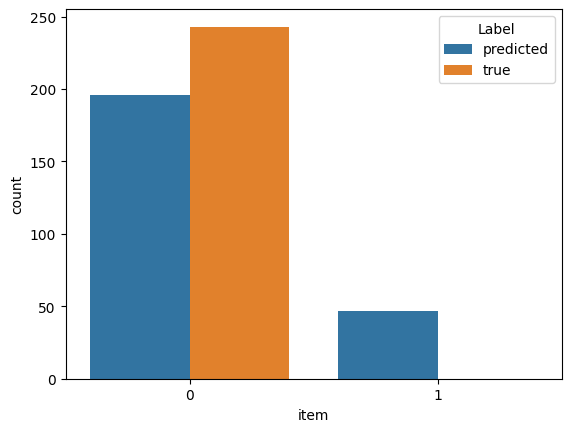

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction Former Smoker 99%

In [ ]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(x1_FormerSmk, y1_FormerSmk['FORMER_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_testf)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_testf, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9915002124946877


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
y_list=y_testf.to_list()
pred_list=predictions.tolist()

In [ ]:
d = pd.DataFrame({"item" : pred_list})
counter = collections.Counter(d.item == 0)
counter

Counter({False: 2333, True: 20})

In [ ]:
d = pd.DataFrame({"item" : y_list})
counter = collections.Counter(d.item == 0)
counter

Counter({False: 2353})

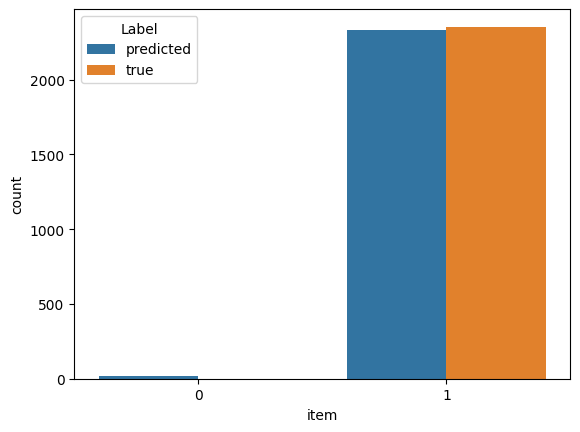

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction Non-Ecig Smokers 98%

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(x1_NonEcigSmk)
# Accuracy
accuracy = accuracy_score(y1_NonEcigSmk, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9810294117647059


In [ ]:
y_list=y1_NonEcigSmk['FORMER_SMOKER'].to_list()
pred_list=predictions.tolist()

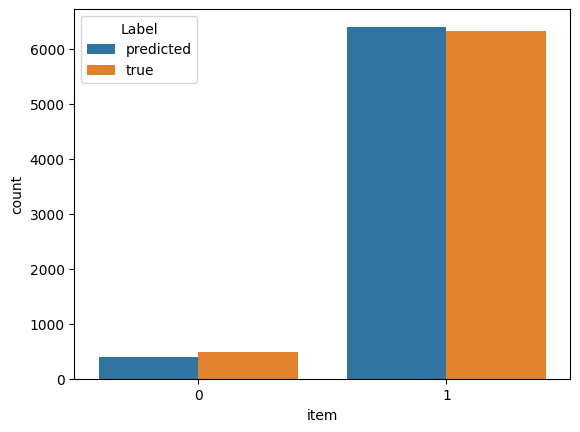

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction Ecig Smokers 94%

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(x1_EcigSmk)
# Accuracy
accuracy = accuracy_score(y1_EcigSmk, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9438444924406048


In [ ]:
y_list=y1_EcigSmk['FORMER_SMOKER'].to_list()
pred_list=predictions.tolist()

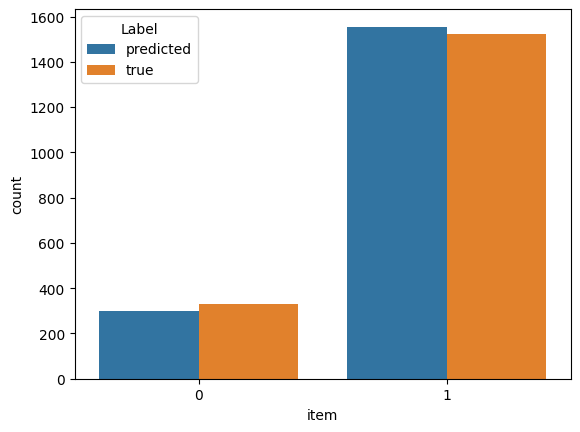

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

### 2 Define Model : Random Forest 70% | SMOTE 86%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x2_2, y2_2['FORMER_ECIG_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier()
# Train the model on training data
rf.fit(X_train, y_train);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.710431654676259


In [ ]:
y_list=y_test.to_list()
pred_list=predictions.tolist()

In [ ]:
d = pd.DataFrame({"item" : pred_list})
counter = collections.Counter(d.item == 0)
counter

Counter({True: 512, False: 44})

In [ ]:
d = pd.DataFrame({"item" : y_list})
counter = collections.Counter(d.item == 0)
counter

Counter({True: 411, False: 145})

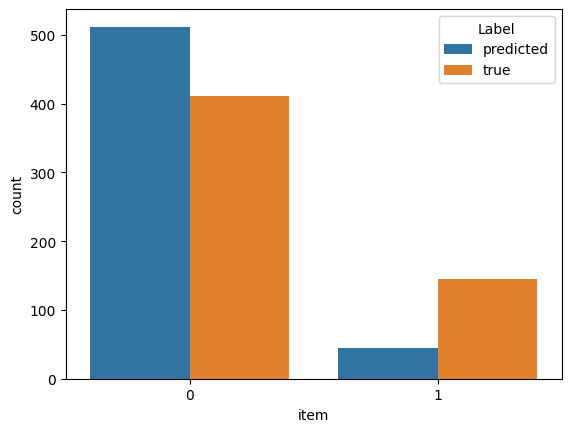

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

In [ ]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

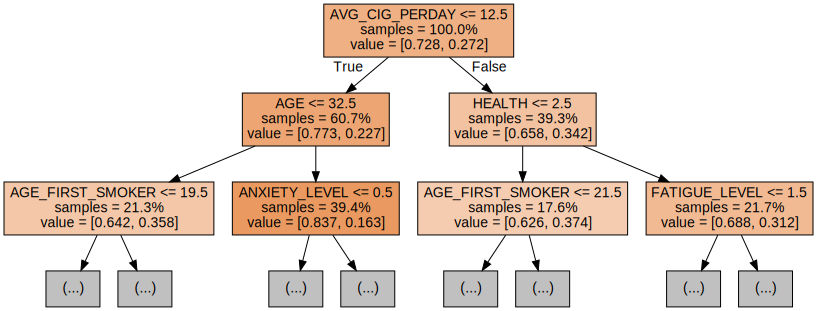

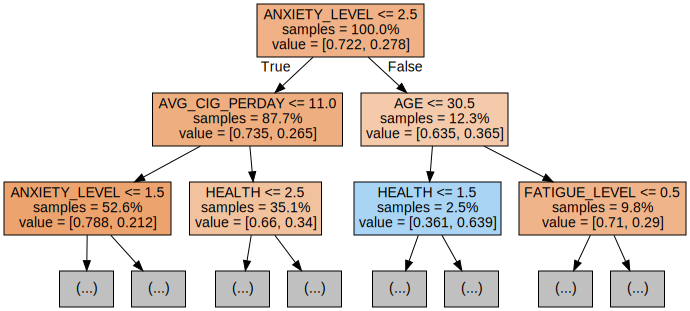

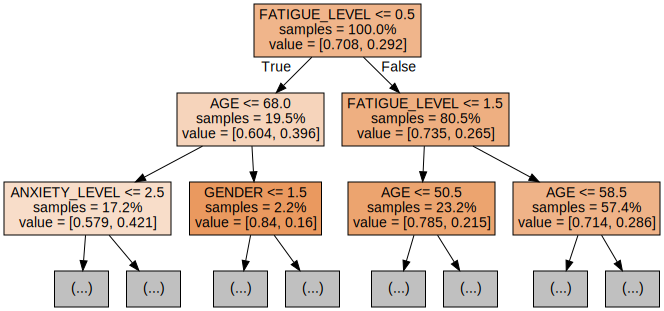

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

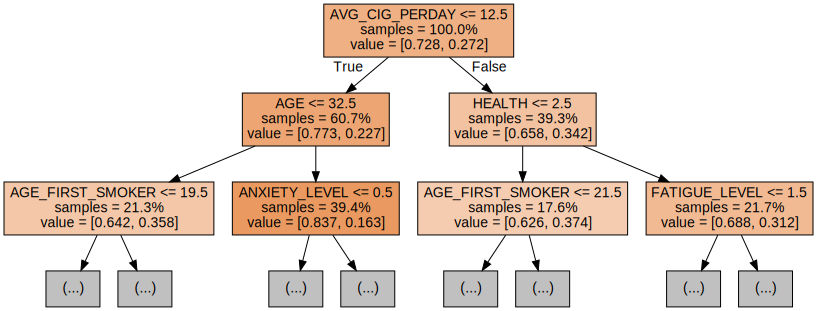

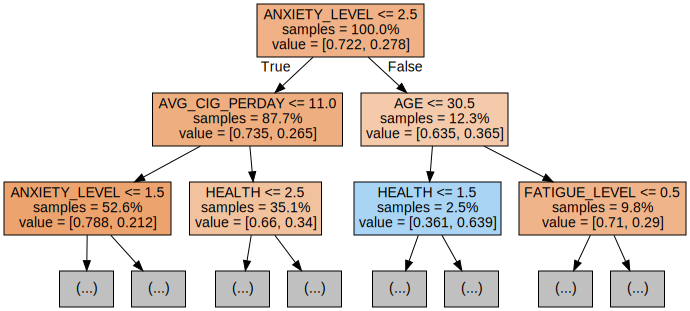

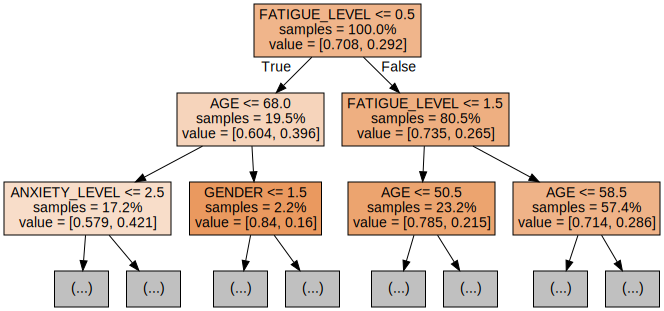

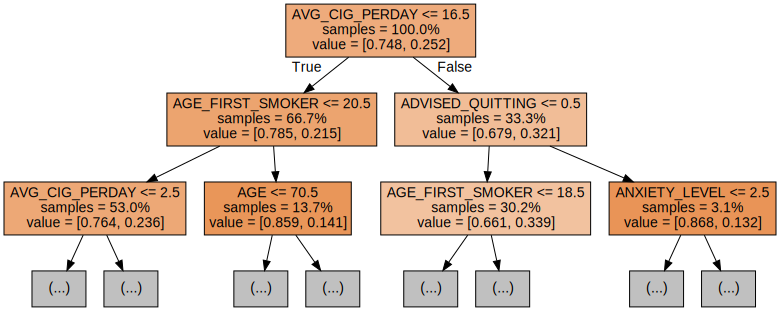

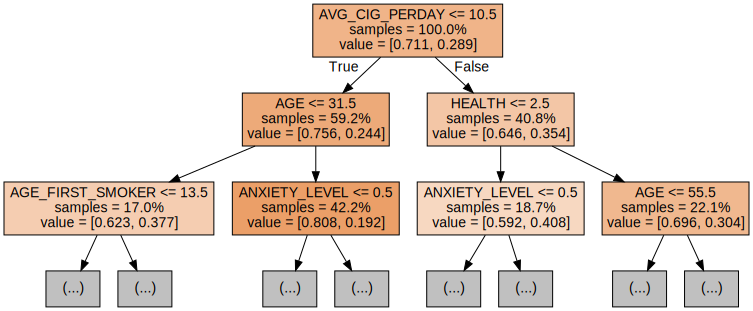

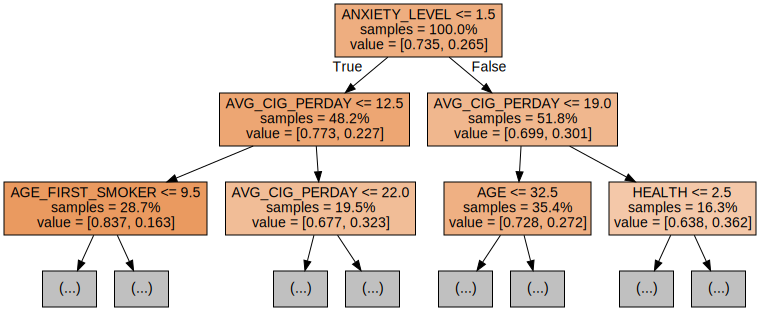

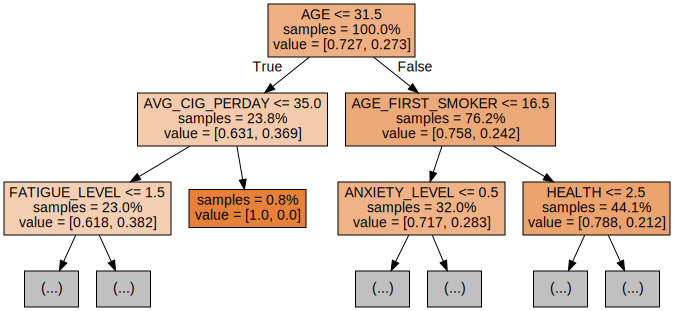

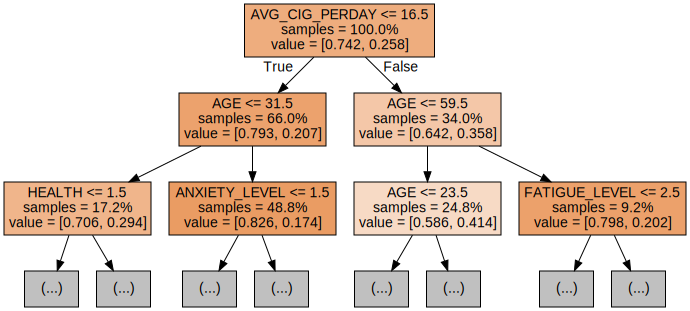

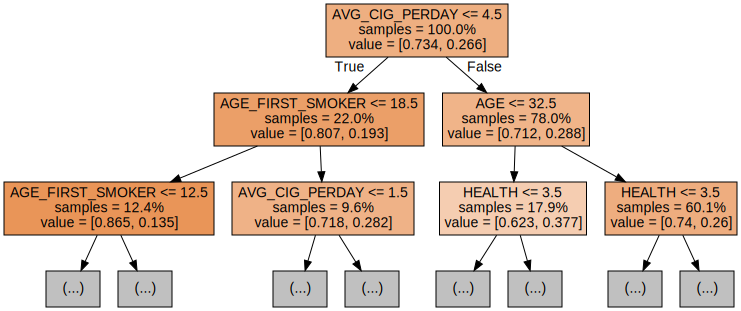

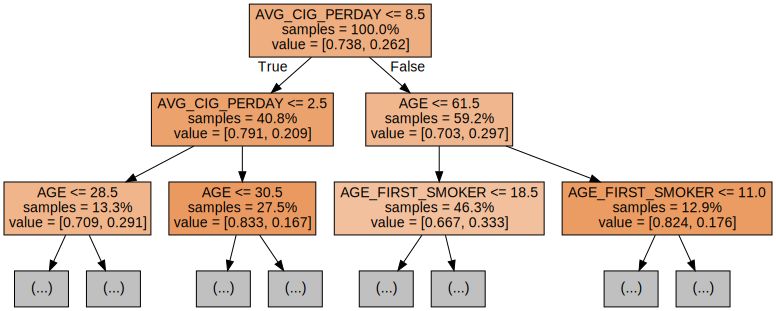

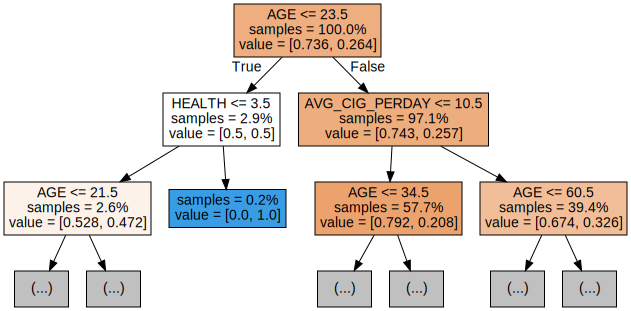

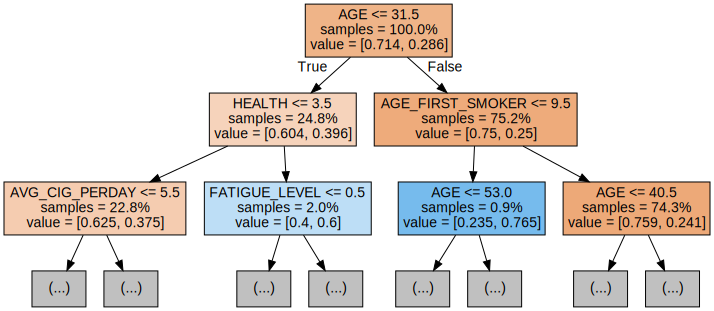

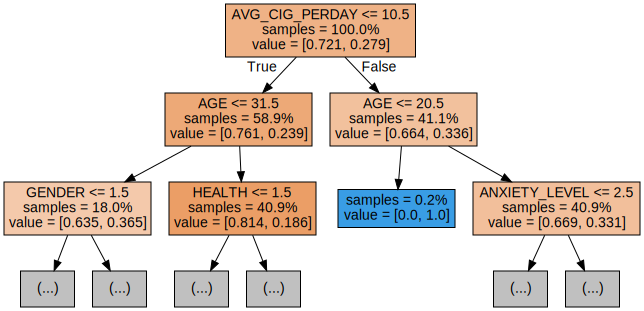

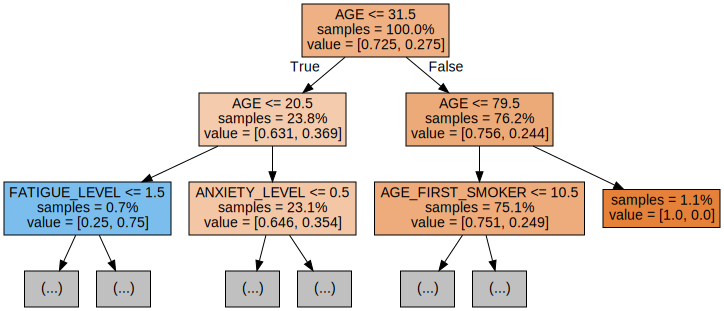

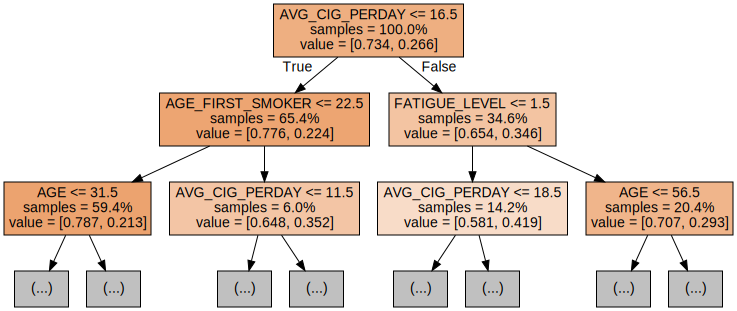

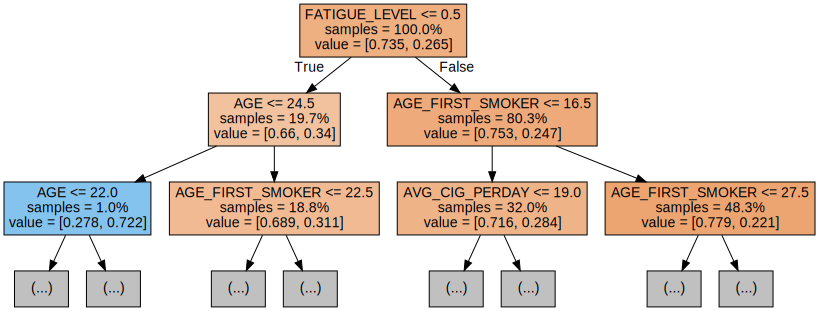

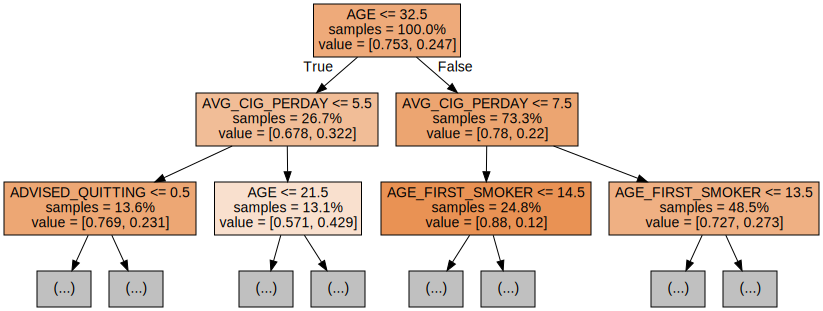

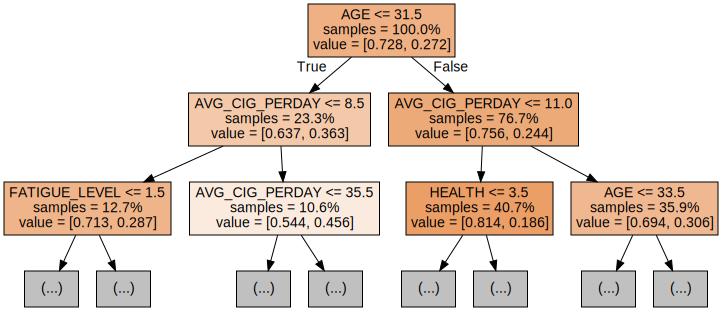

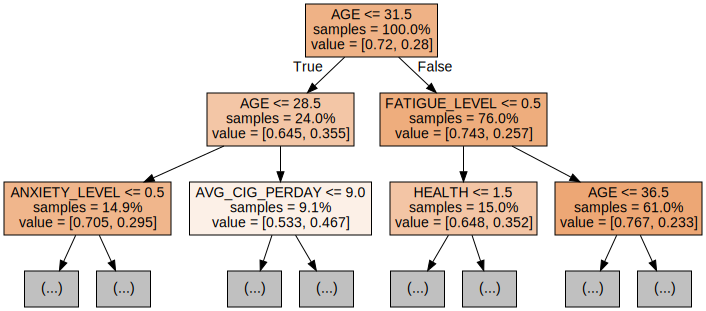

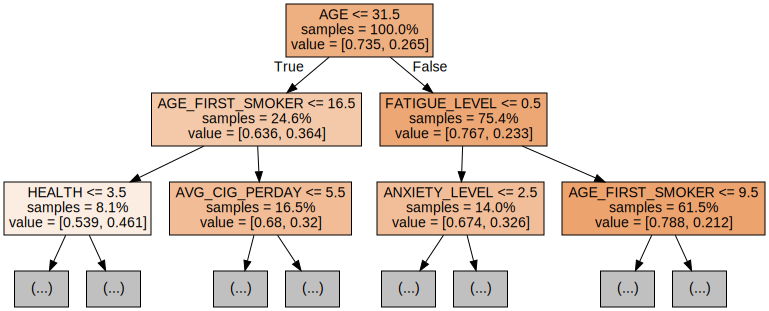

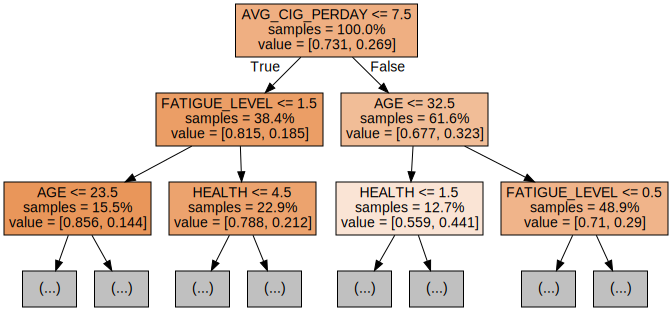

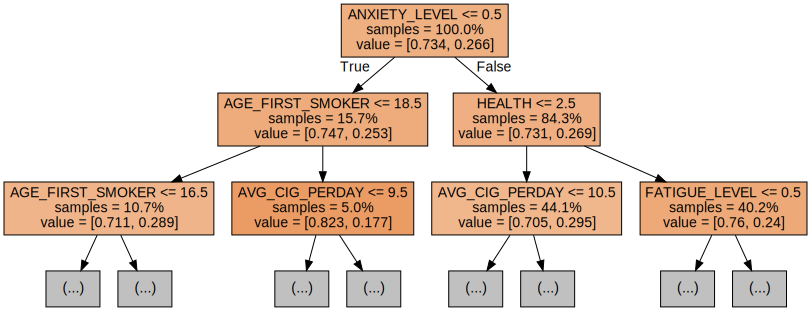

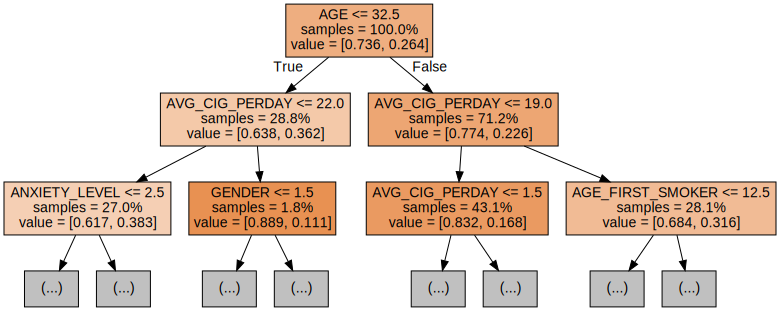

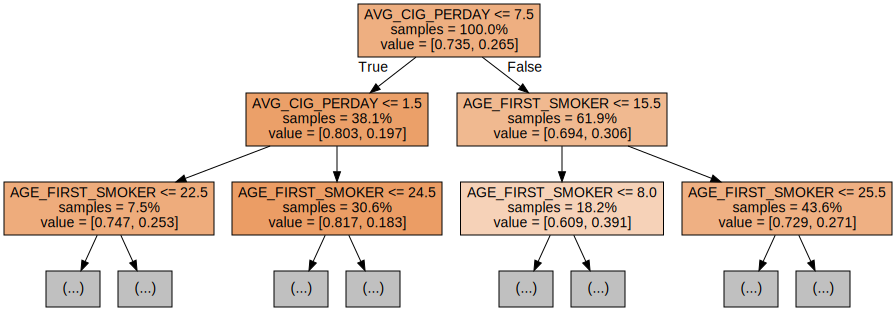

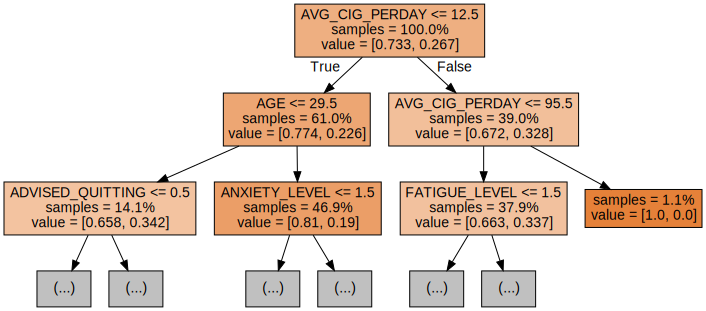

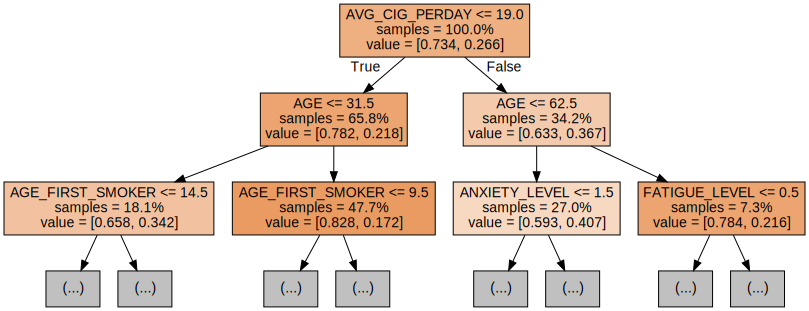

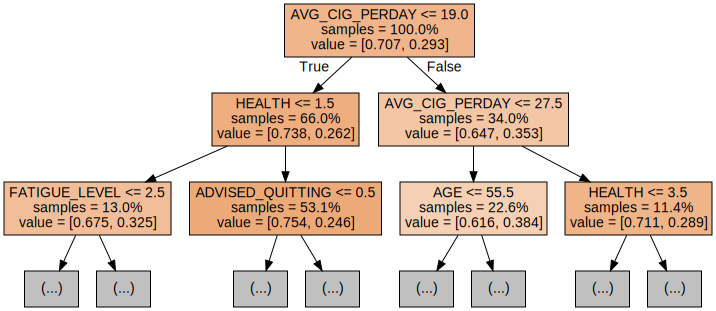

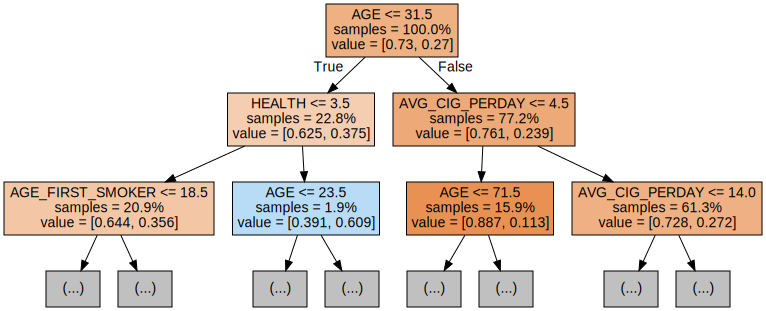

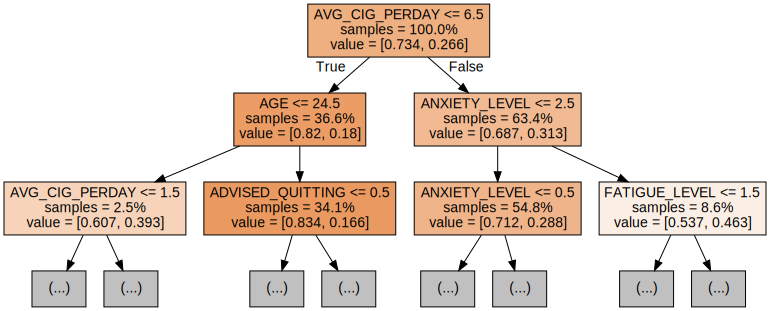

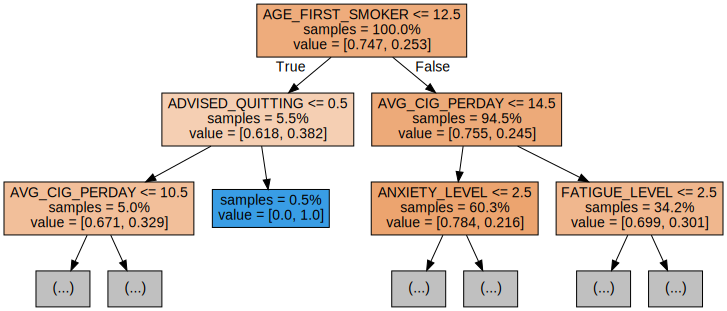

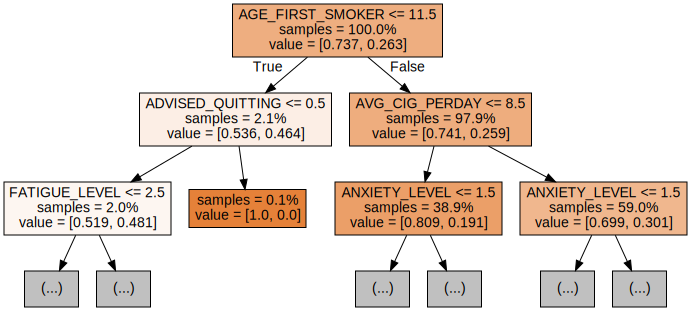

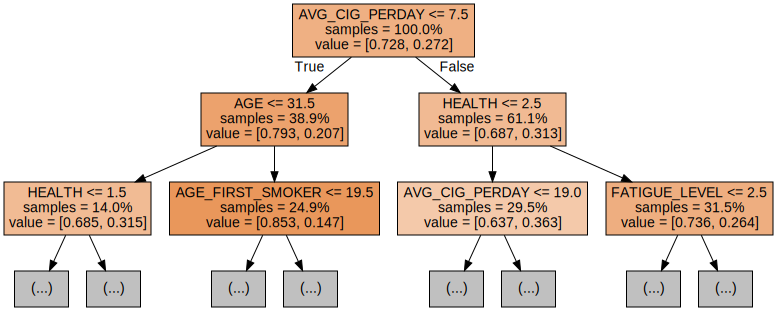

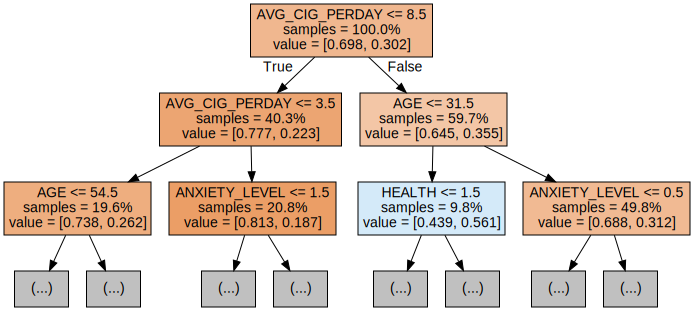

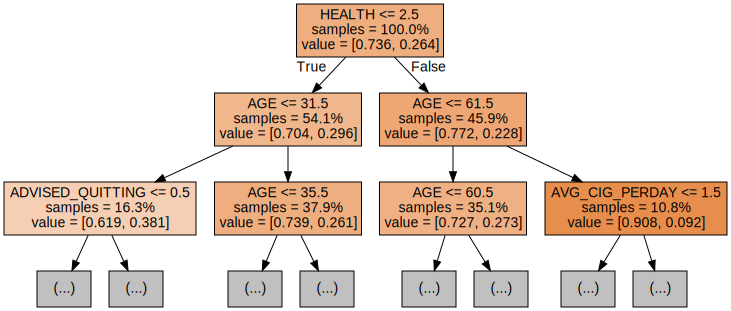

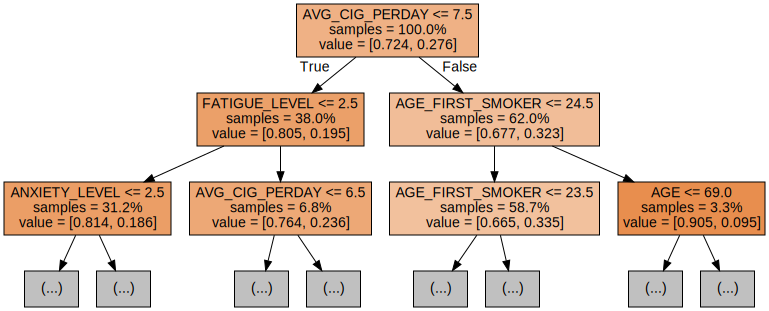

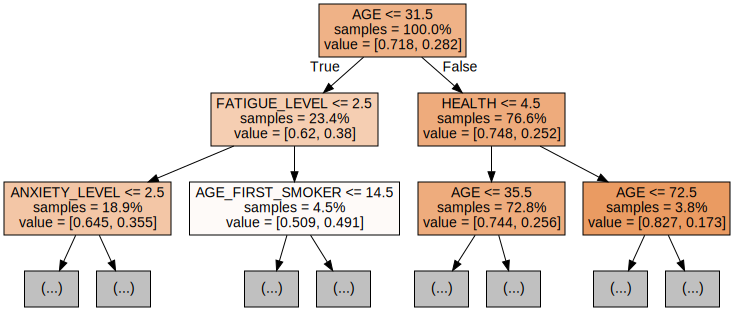

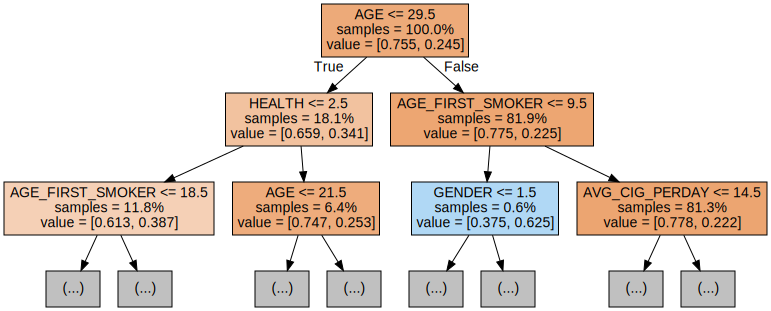

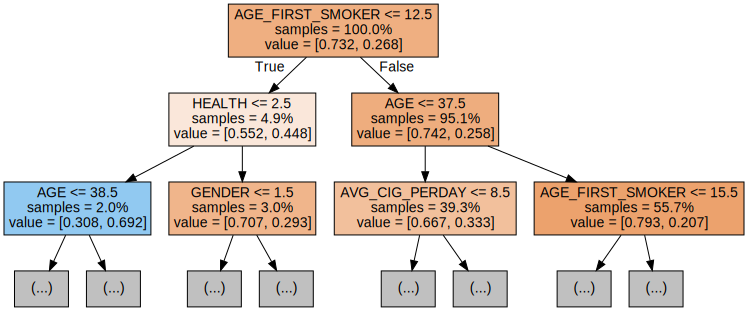

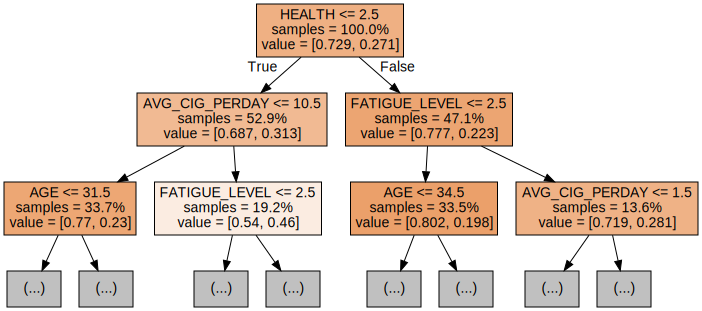

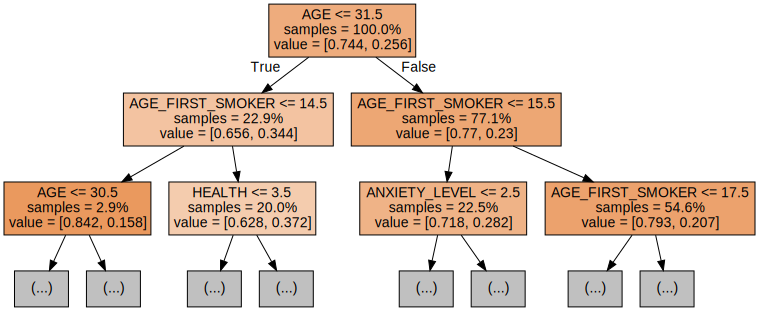

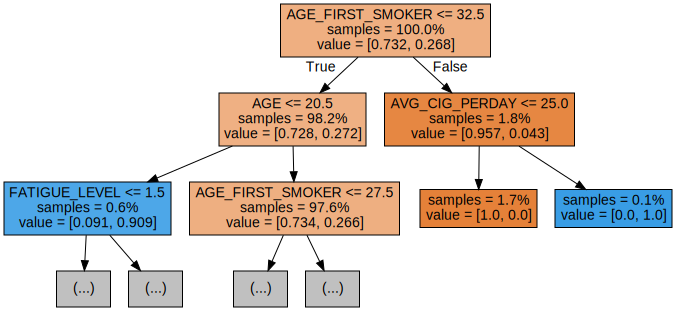

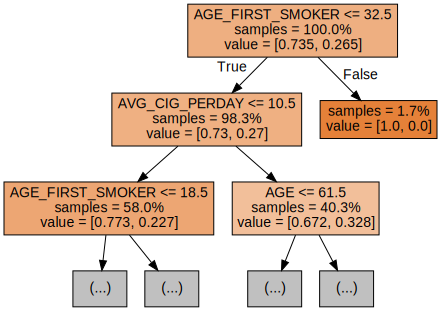

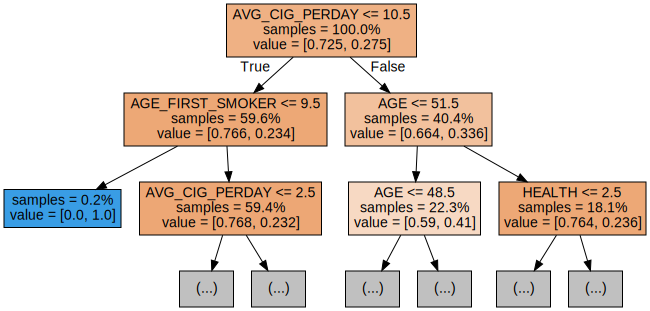

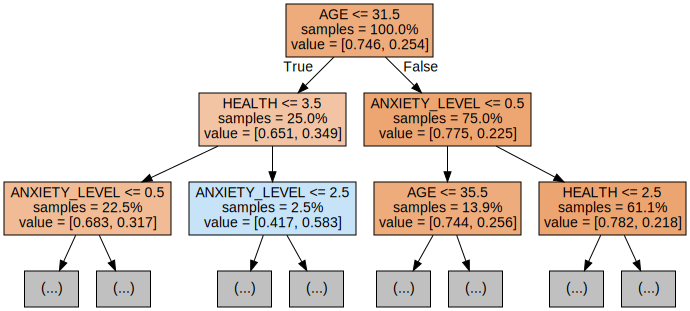

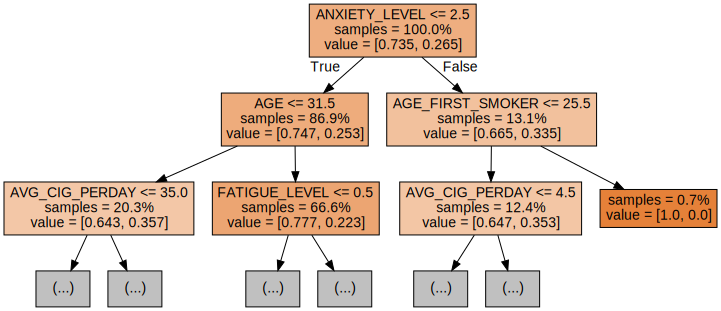

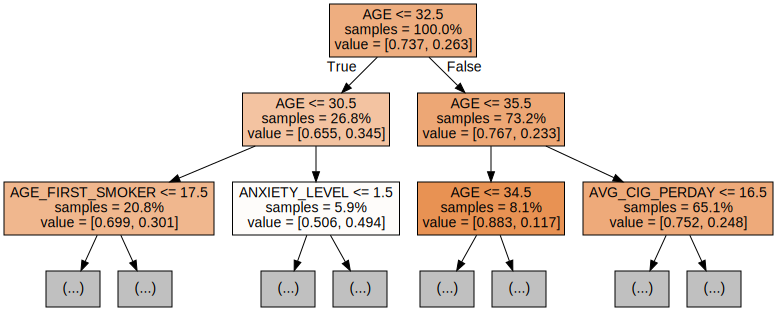

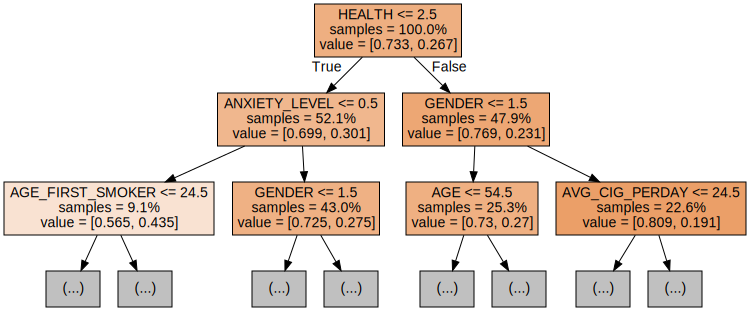

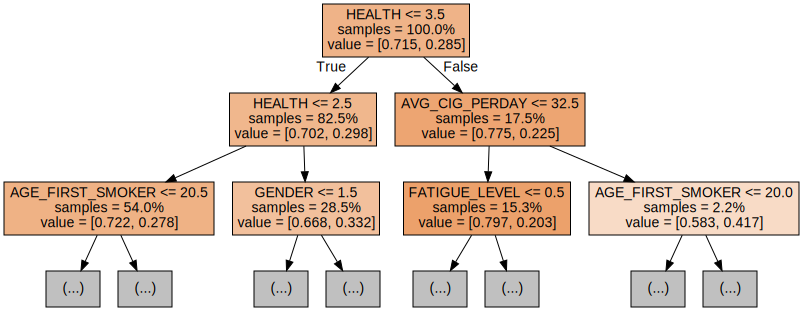

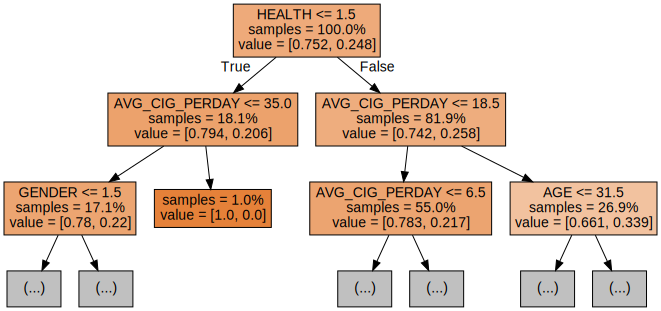

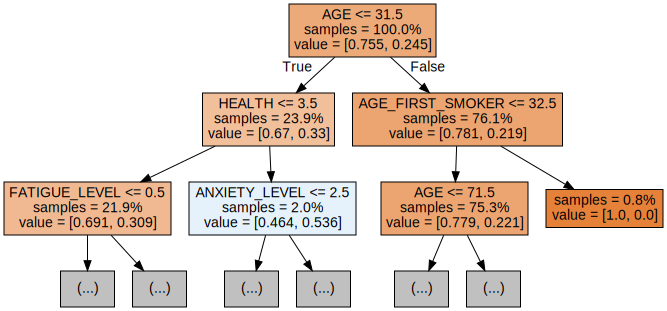

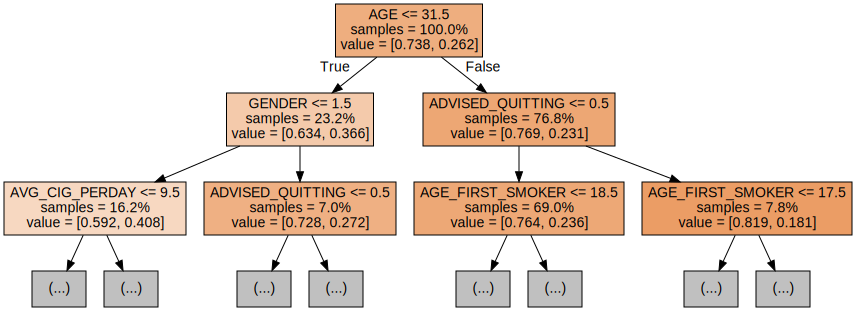

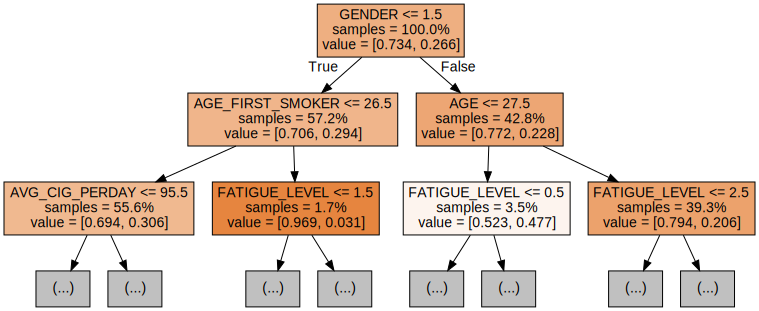

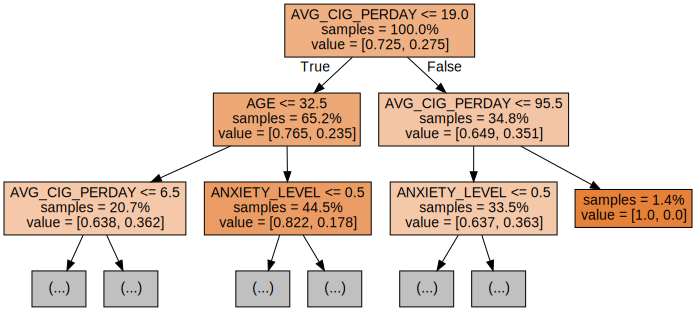

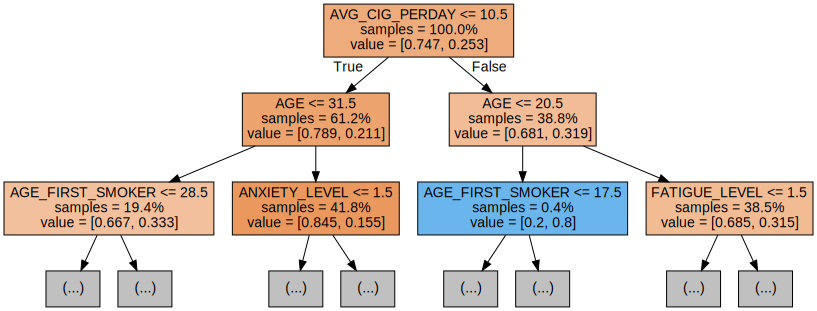

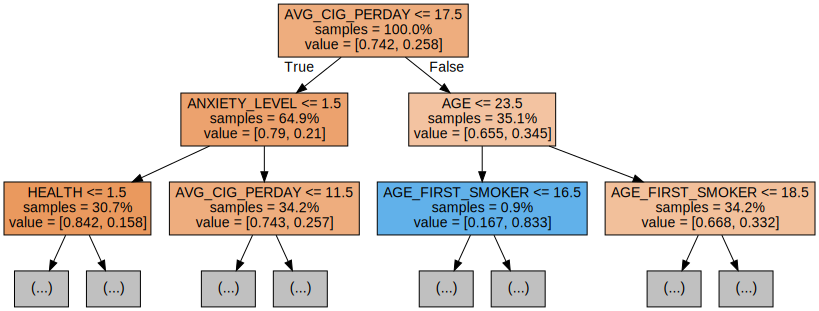

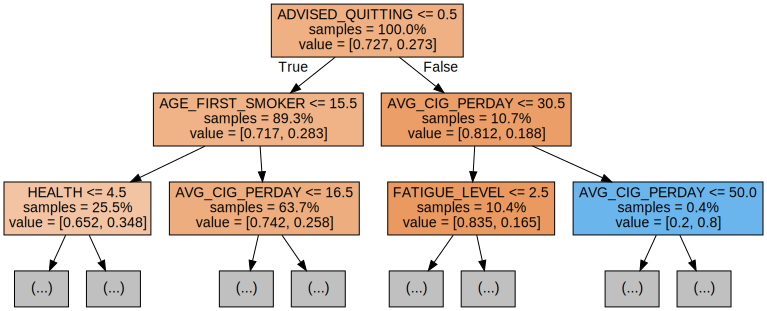

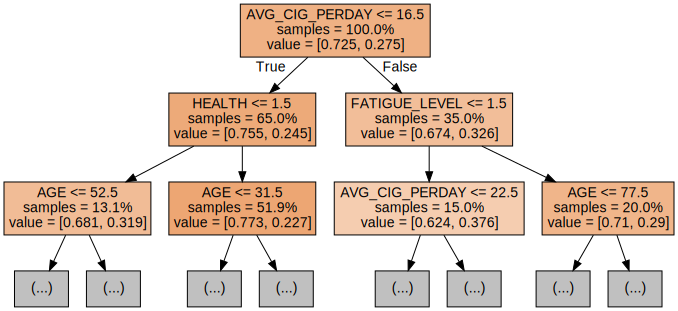

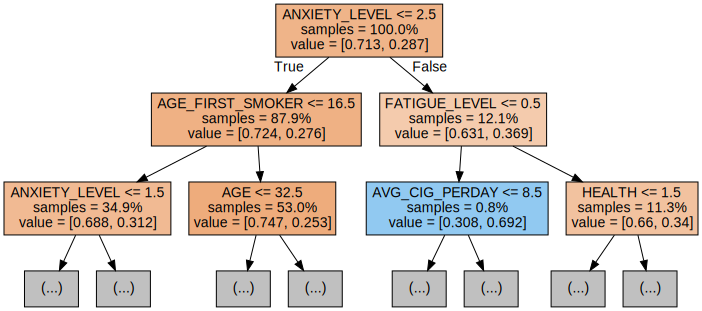

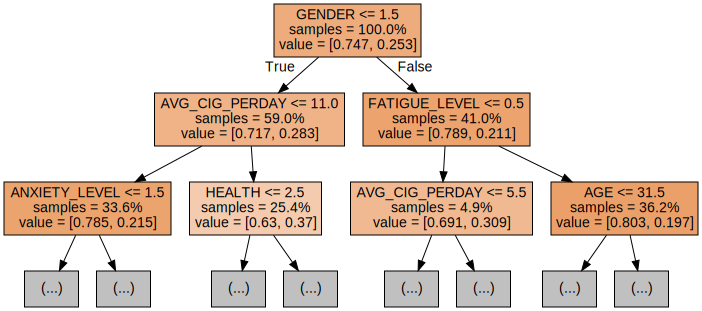

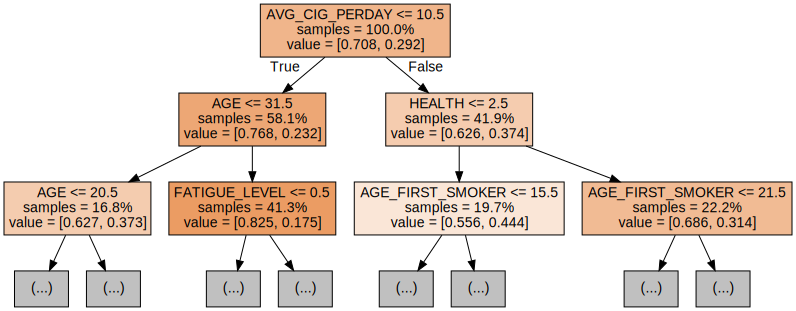

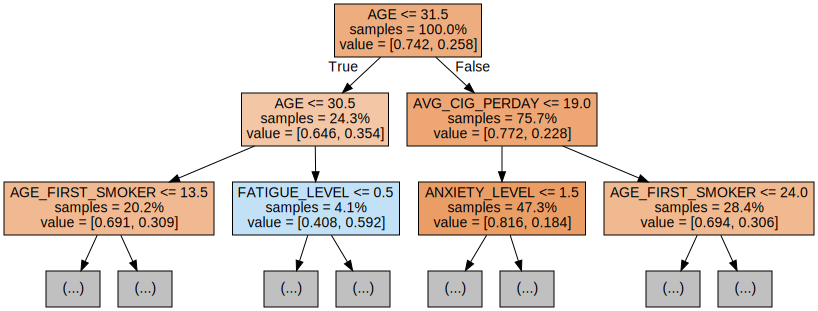

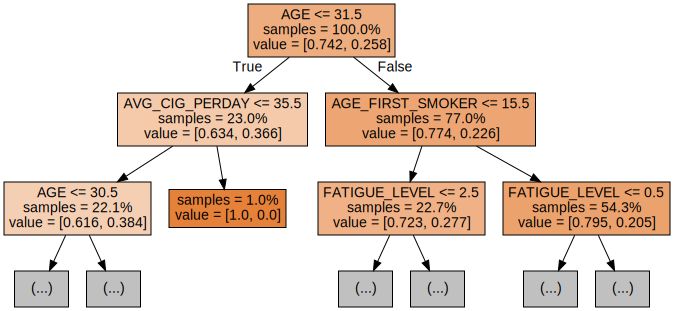

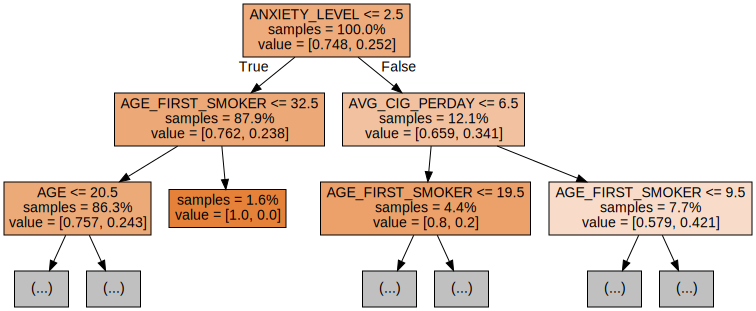

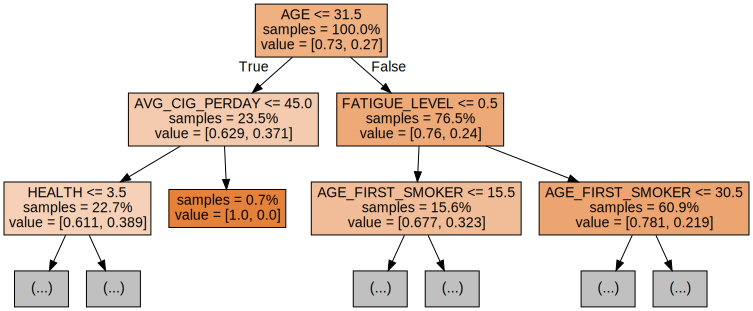

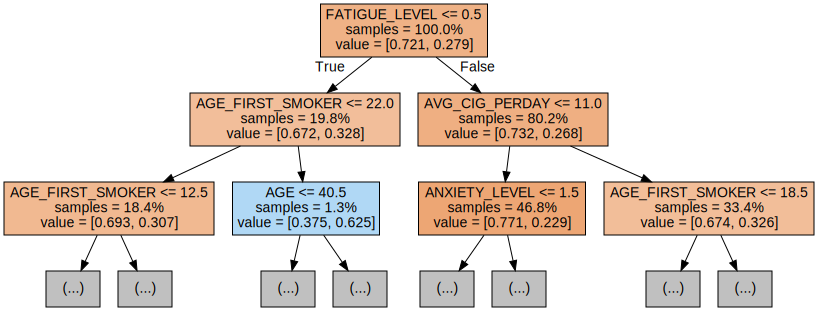

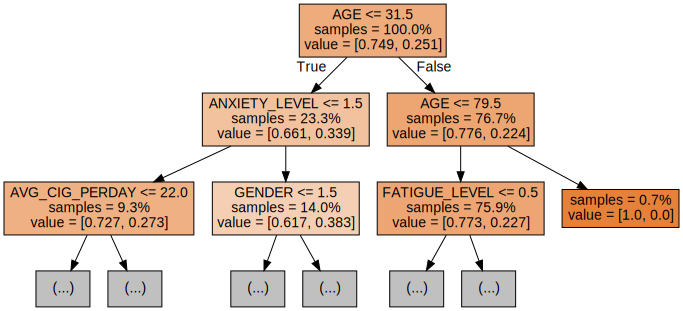

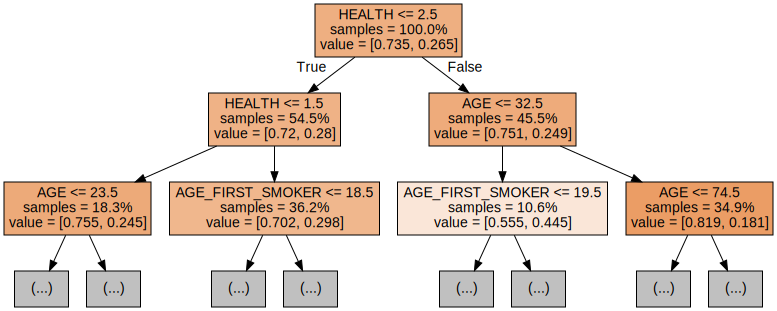

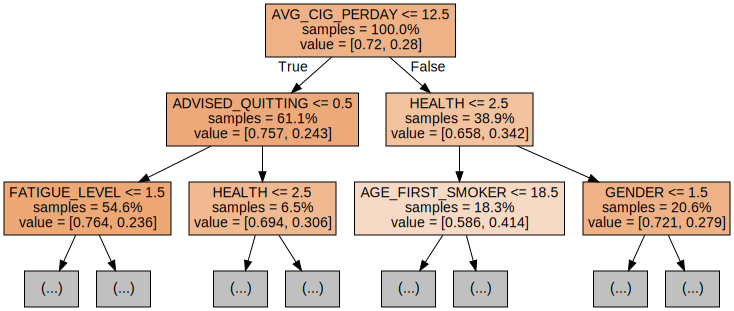

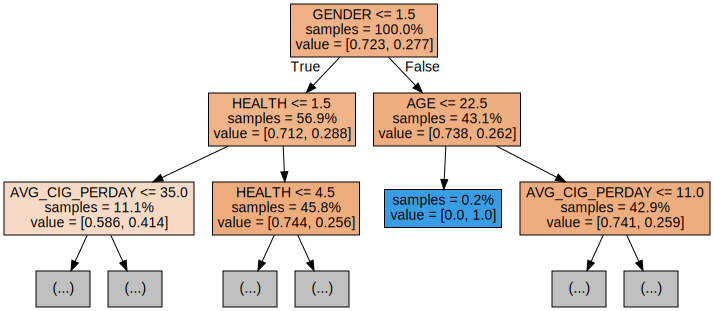

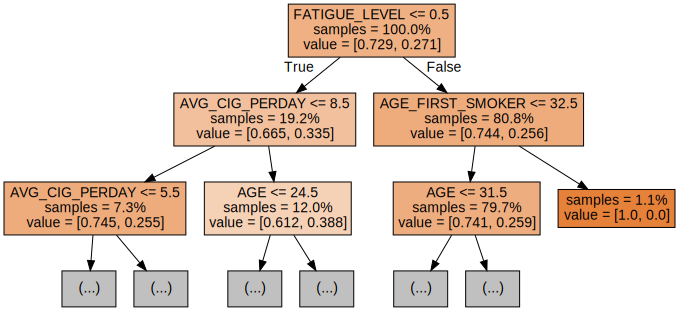

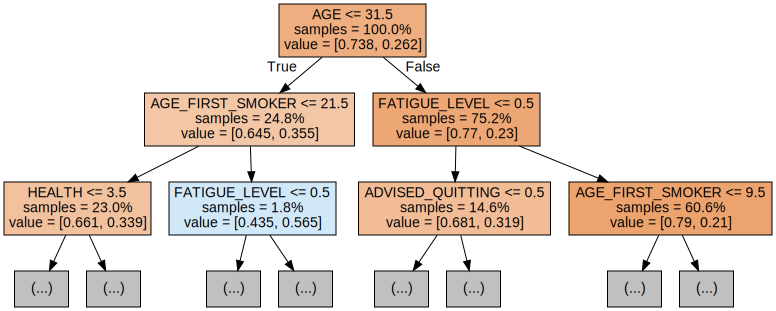

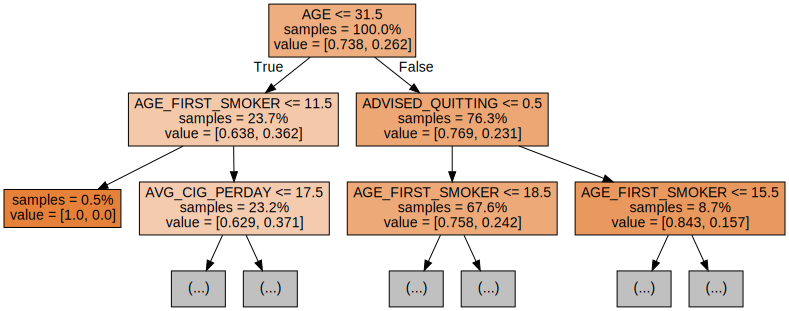

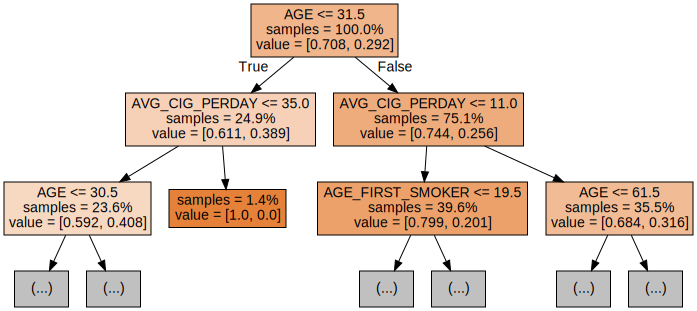

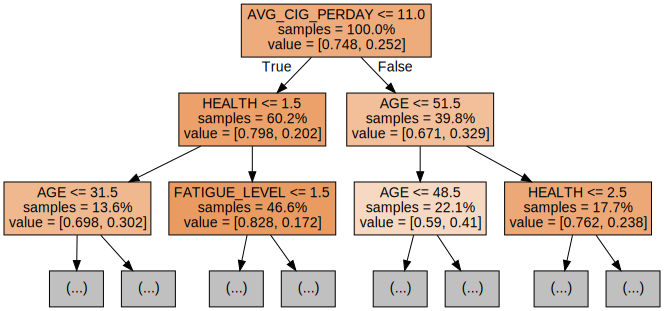

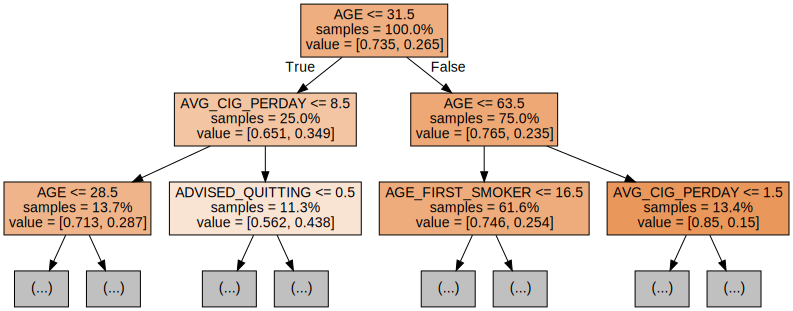

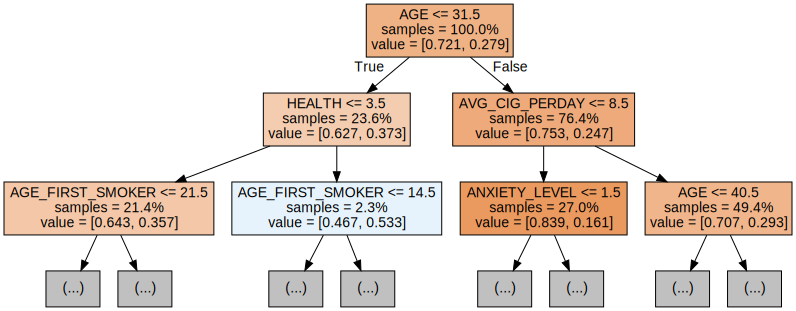

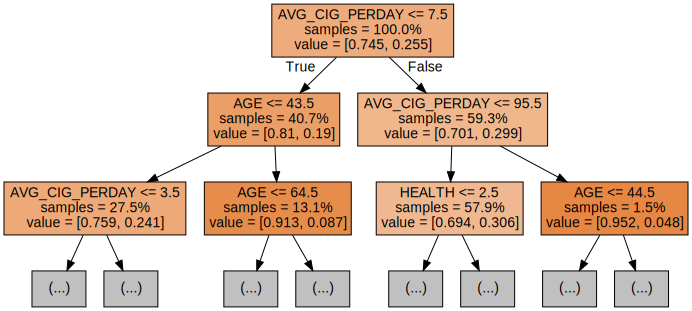

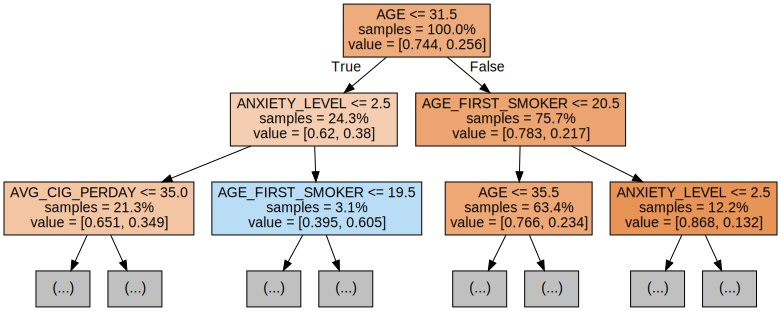

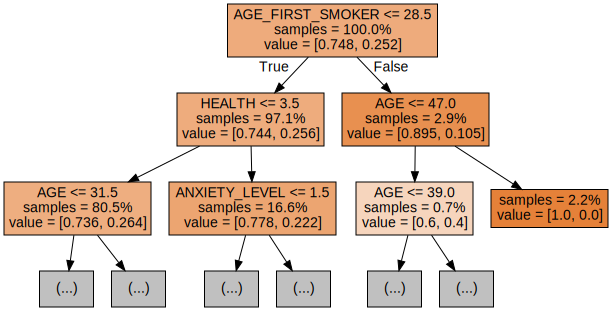

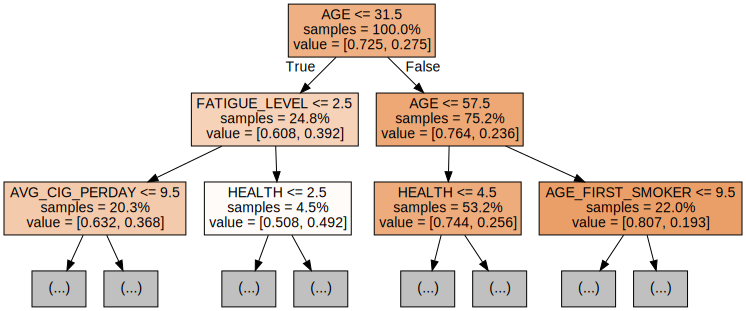

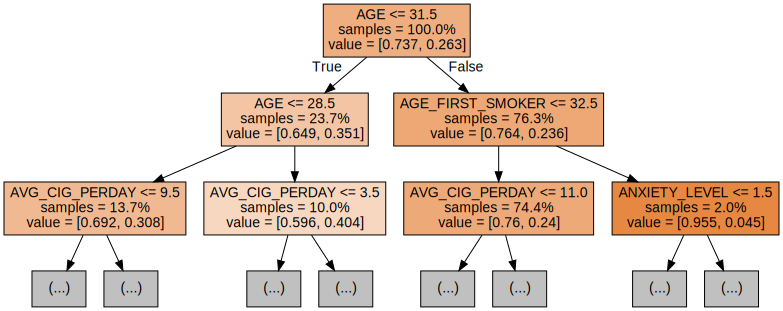

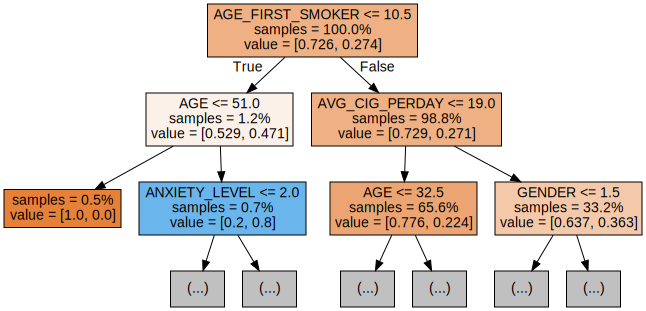

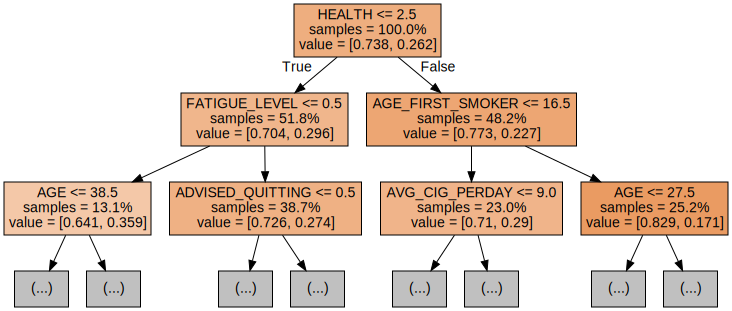

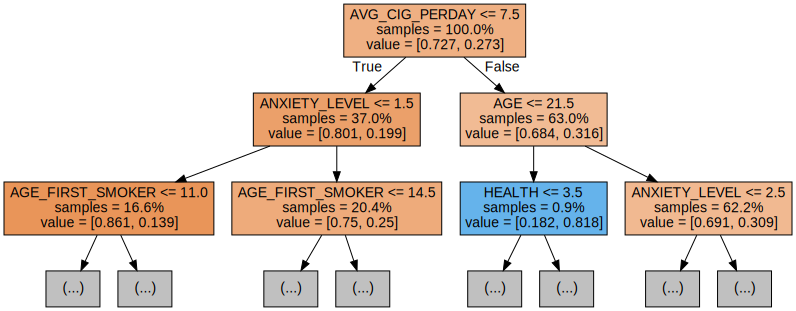

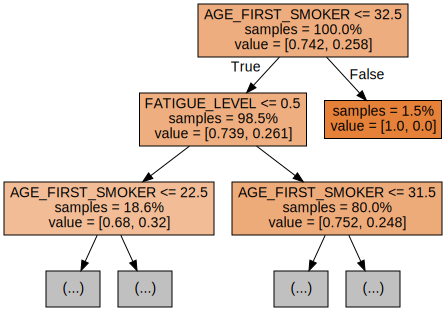

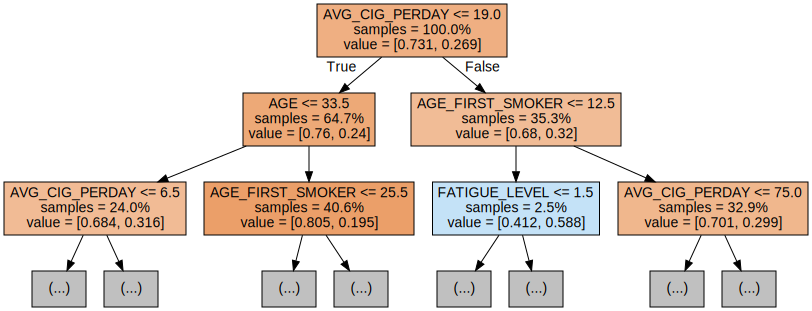

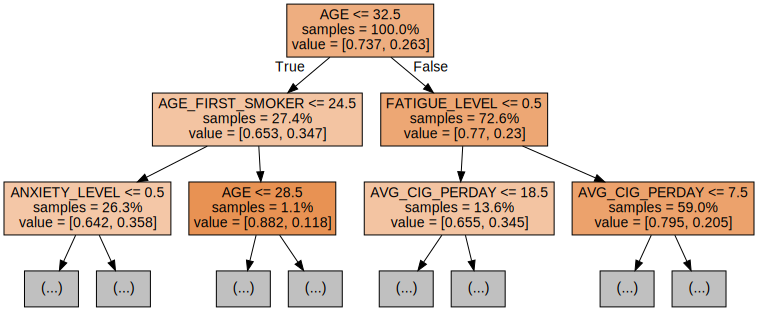

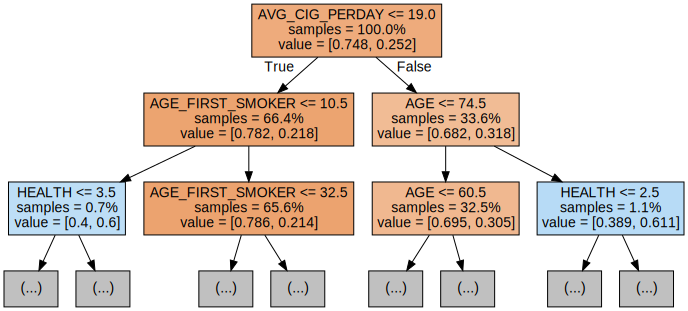

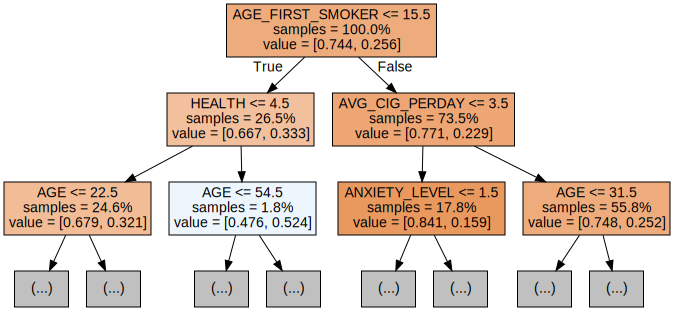

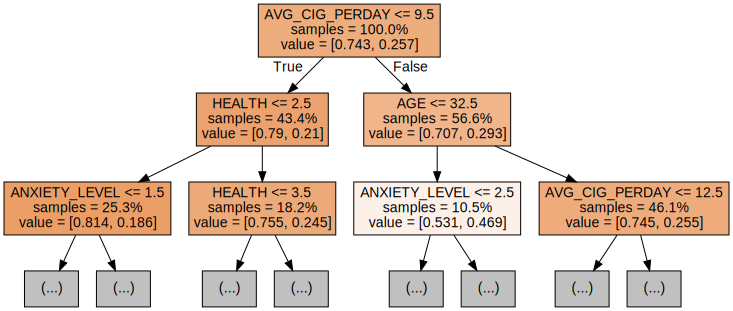

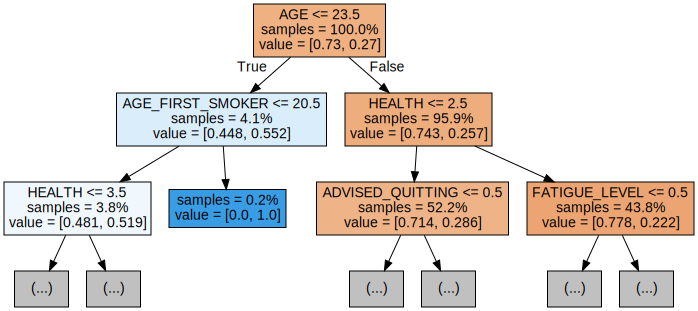

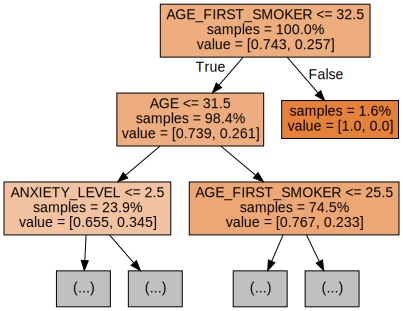

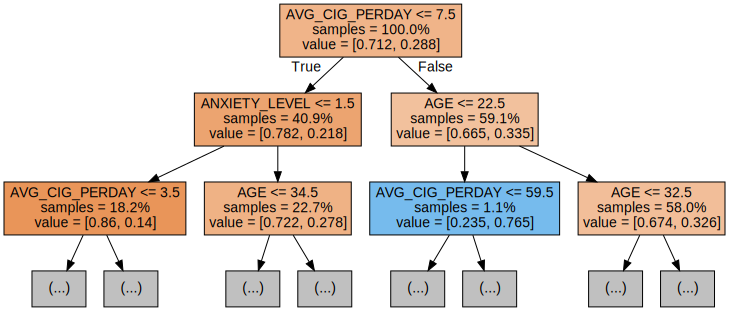

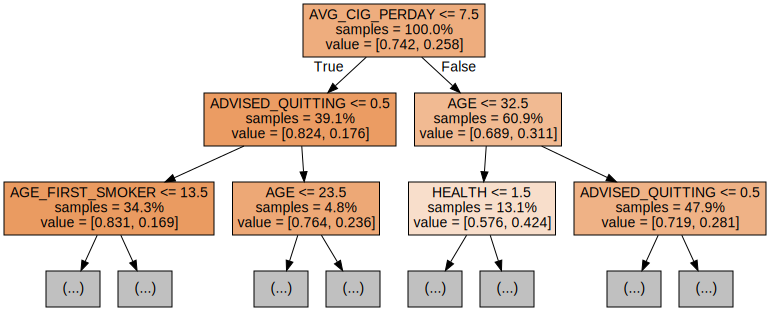

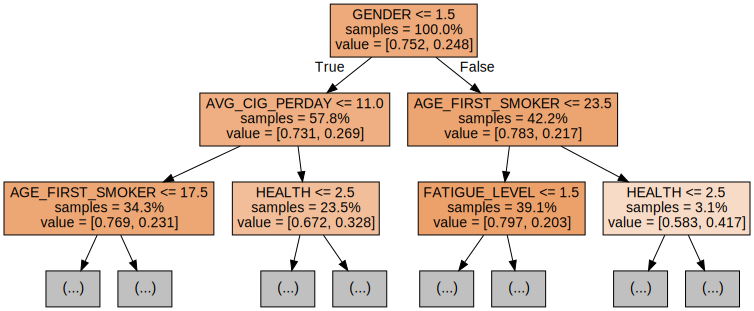

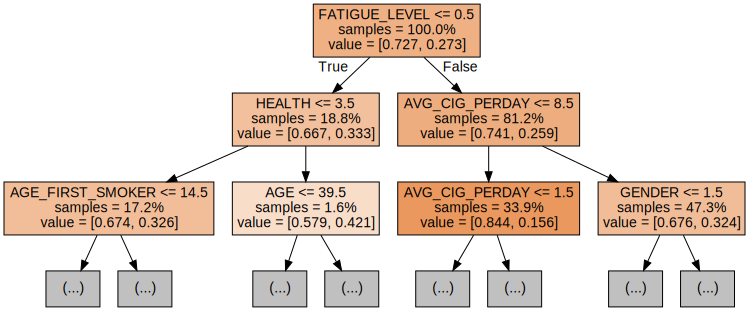

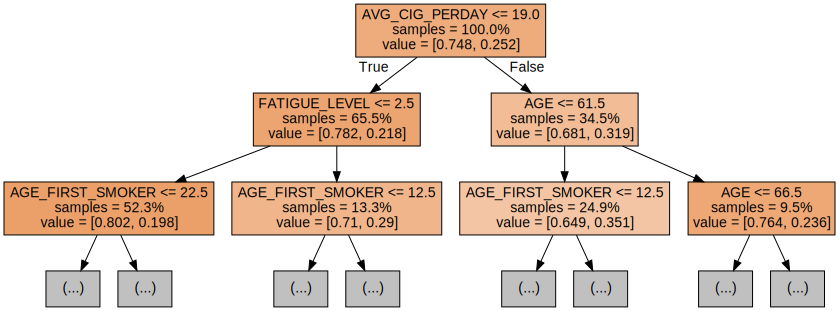

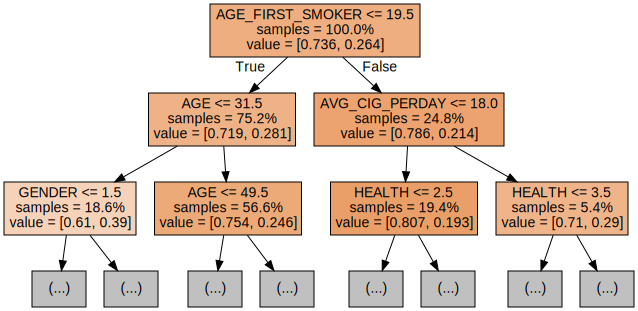

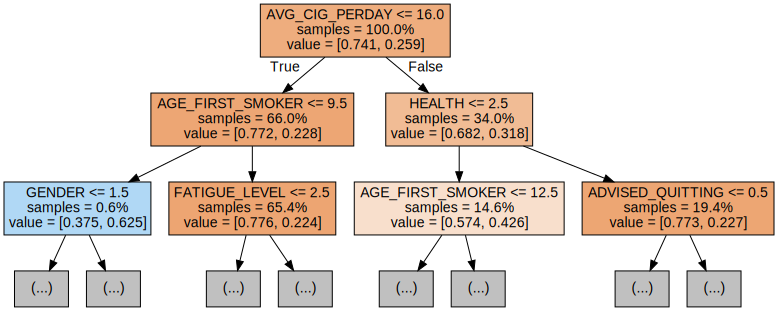

In [ ]:
# Export the first three decision trees from the forest

for i in range(99):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

In [ ]:
len(X_train.columns)

9

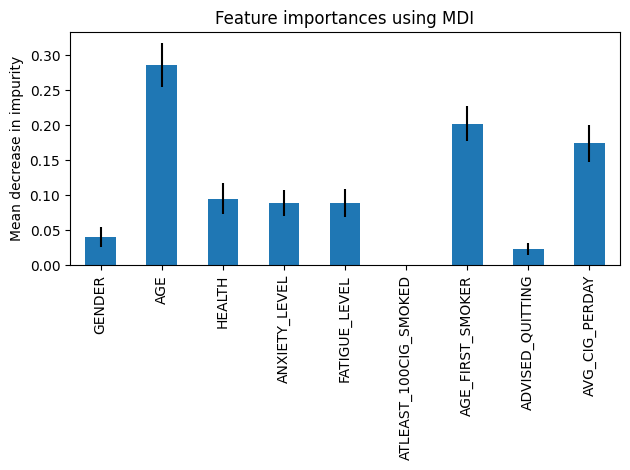

In [ ]:
import pandas as pd

feature_names = [f"{i}" for i in X_train.columns]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
print(forest_importances)

GENDER                   0.040308
AGE                      0.286457
HEALTH                   0.094996
ANXIETY_LEVEL            0.089207
FATIGUE_LEVEL            0.088697
ATLEAST_100CIG_SMOKED    0.000000
AGE_FIRST_SMOKER         0.202630
ADVISED_QUITTING         0.023337
AVG_CIG_PERDAY           0.174369
dtype: float64


##### Prediction No FormerSmk 97%



In [ ]:
X_trainNf, X_testNf, y_trainNf, y_testNf = train_test_split(x2_NonFormerSmk, y2_NonFormerSmk['FORMER_ECIG_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_testNf)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_testNf, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9706601466992665


In [ ]:
y_list=y_testNf.to_list()
pred_list=predictions.tolist()

In [ ]:
d = pd.DataFrame({"item" : pred_list})
counter = collections.Counter(d.item == 0)
counter

Counter({True: 397, False: 12})

In [ ]:
d = pd.DataFrame({"item" : y_list})
counter = collections.Counter(d.item == 0)
counter

Counter({True: 409})

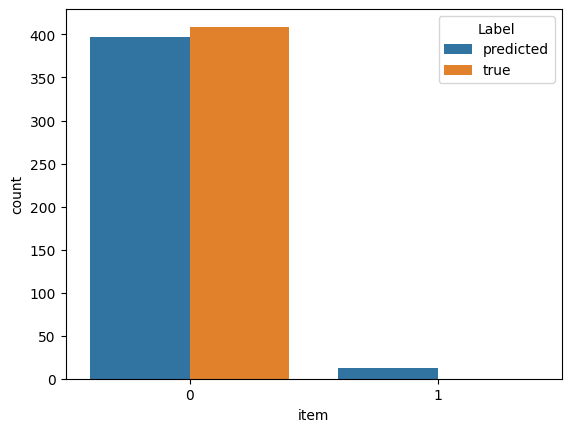

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction Former Smoker 74%

In [ ]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(x2_FormerSmk, y2_FormerSmk['FORMER_ECIG_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_testf)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_testf, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7619047619047619


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
y_list=y_testf.to_list()
pred_list=predictions.tolist()

In [ ]:
d = pd.DataFrame({"item" : pred_list})
counter = collections.Counter(d.item == 0)
counter

Counter({False: 112, True: 35})

In [ ]:
d = pd.DataFrame({"item" : y_list})
counter = collections.Counter(d.item == 0)
counter

Counter({False: 147})

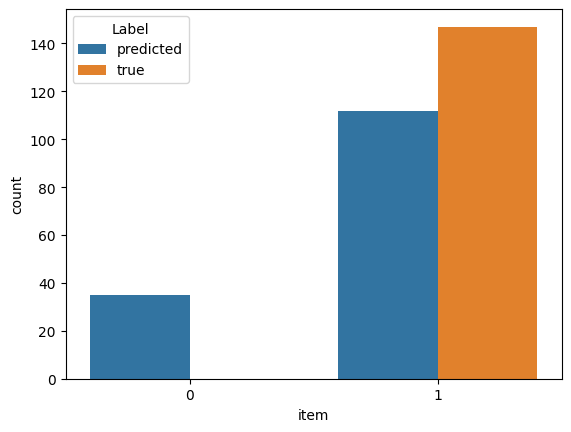

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### SMOTE

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42, k_neighbors=5)

In [ ]:
X_res, y_res = sm.fit_resample(x2_2, y2_2['FORMER_ECIG_SMOKER'])

In [ ]:
y = y_res.to_list()

In [ ]:
d = pd.DataFrame({"item" : y})
counter = collections.Counter(d.item == 0)
counter

Counter({False: 1363, True: 1363})

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res, y_res, test_size=0.3, random_state=0)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier()
# Train the model on training data
rf.fit(X_train1, y_train1);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8669064748201439


In [ ]:
y_list=y_test.to_list()
pred_list=predictions.tolist()

In [ ]:
d = pd.DataFrame({"item" : pred_list})
counter = collections.Counter(d.item == 0)
counter

Counter({True: 425, False: 131})

In [ ]:
d = pd.DataFrame({"item" : y_list})
counter = collections.Counter(d.item == 0)
counter

Counter({True: 411, False: 145})

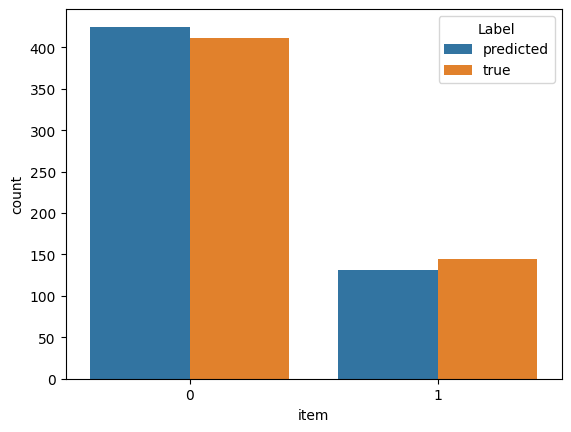

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction Former Smoker 81%

In [ ]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(x2_FormerSmk, y2_FormerSmk['FORMER_ECIG_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_testf)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_testf, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8095238095238095


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
y_list=y_testf.to_list()
pred_list=predictions.tolist()

In [ ]:
d = pd.DataFrame({"item" : pred_list})
counter = collections.Counter(d.item == 0)
counter

Counter({False: 119, True: 28})

In [ ]:
d = pd.DataFrame({"item" : y_list})
counter = collections.Counter(d.item == 0)
counter

Counter({False: 147})

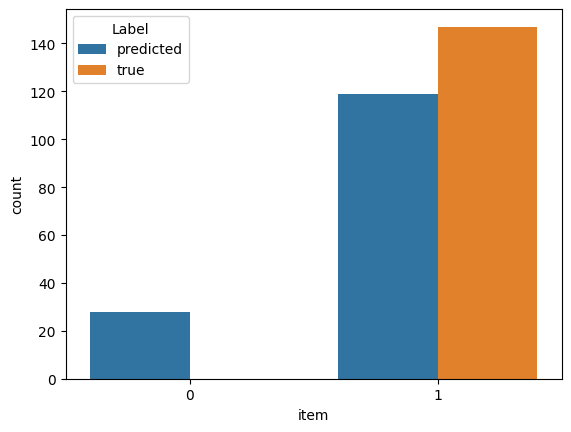

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction No FormerSmk 94%



In [ ]:
X_trainNf, X_testNf, y_trainNf, y_testNf = train_test_split(x2_NonFormerSmk, y2_NonFormerSmk['FORMER_ECIG_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_testNf)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_testNf, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9535452322738386


In [ ]:
y_list=y_testNf.to_list()
pred_list=predictions.tolist()

In [ ]:
d = pd.DataFrame({"item" : pred_list})
counter = collections.Counter(d.item == 0)
counter

Counter({True: 390, False: 19})

In [ ]:
d = pd.DataFrame({"item" : y_list})
counter = collections.Counter(d.item == 0)
counter

Counter({True: 409})

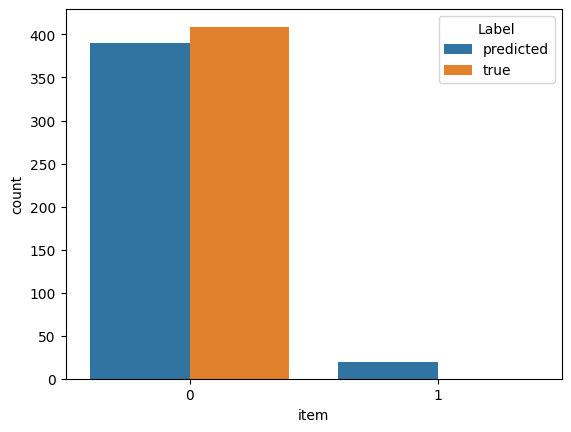

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

## LOGISTIC

### 1 Define Model : Logistic 91% | SMOTE 83%


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(x1_2, y1_2['FORMER_SMOKER'], test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: ',logreg.score(X_test, y_test))

Accuracy of logistic regression classifier on test set:  0.9198767334360555


In [ ]:
y_list=y_test.to_list()
pred_list=y_pred.tolist()

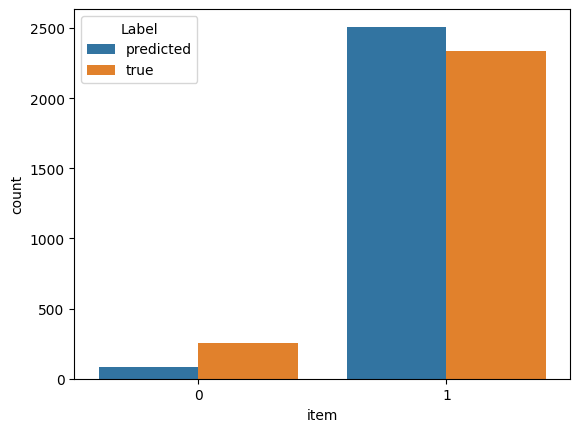

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction Former Smoker 99%

In [ ]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(x1_FormerSmk, y1_FormerSmk['FORMER_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
# Use the forest's predict method on the test data
y_pred = logreg.predict(X_testf)

In [ ]:
print('Accuracy of logistic regression classifier on test set: ',logreg.score(X_testf, y_testf))

Accuracy of logistic regression classifier on test set:  0.9923501912452188


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
y_list=y_testf.to_list()
pred_list=y_pred.tolist()

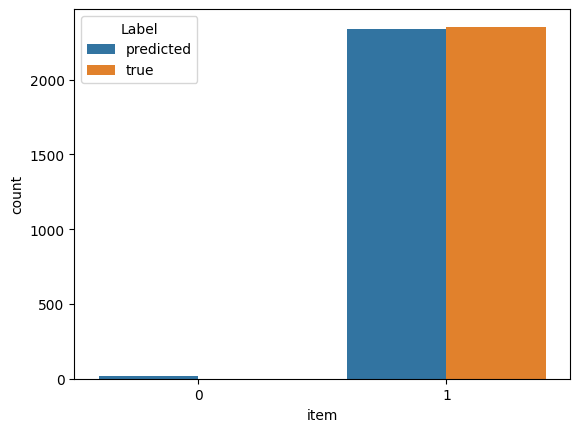

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction No FormerSmk 19%



In [ ]:
X_trainNf, X_testNf, y_trainNf, y_testNf = train_test_split(x1_NonFormerSmk, y1_NonFormerSmk['FORMER_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
# Use the forest's predict method on the test data
y_pred = logreg.predict(X_testNf)

In [ ]:
print('Accuracy of logistic regression classifier on test set: ',logreg.score(X_testNf, y_testNf))

Accuracy of logistic regression classifier on test set:  0.19753086419753085


In [ ]:
y_list=y_testNf.to_list()
pred_list=y_pred.tolist()

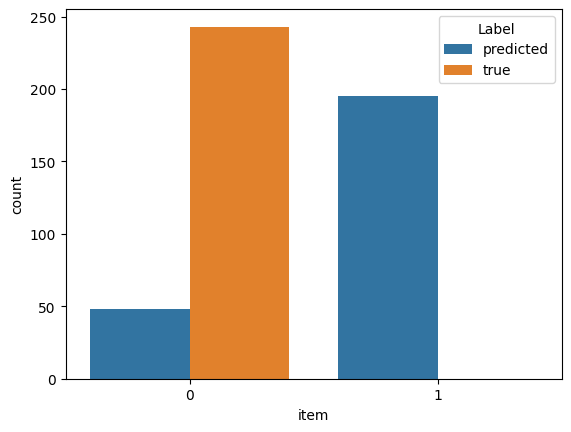

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### SMOTE data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(x1_2, y1_2['FORMER_SMOKER'], test_size=0.3, random_state=0)


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res2, y_res2, test_size=0.3, random_state=0)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: ',logreg.score(X_test, y_test))

Accuracy of logistic regression classifier on test set:  0.8397534668721109


In [ ]:
y_list=y_test.to_list()
pred_list=y_pred.tolist()

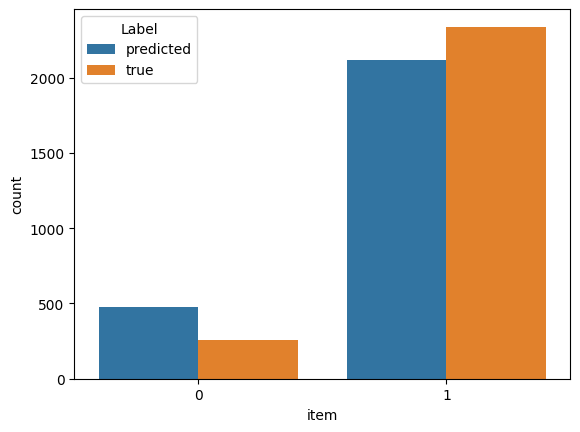

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction Former Smoker 87%

In [ ]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(x1_FormerSmk, y1_FormerSmk['FORMER_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
# Use the forest's predict method on the test data
y_pred = logreg.predict(X_testf)

In [ ]:
print('Accuracy of logistic regression classifier on test set: ',logreg.score(X_testf, y_testf))

Accuracy of logistic regression classifier on test set:  0.8725031874203145


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
y_list=y_testf.to_list()
pred_list=y_pred.tolist()

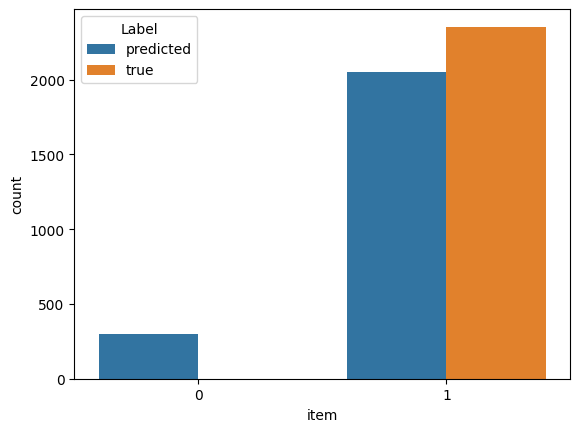

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction No FormerSmk 55%



In [ ]:
X_trainNf, X_testNf, y_trainNf, y_testNf = train_test_split(x1_NonFormerSmk, y1_NonFormerSmk['FORMER_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
# Use the forest's predict method on the test data
y_pred = logreg.predict(X_testNf)

In [ ]:
print('Accuracy of logistic regression classifier on test set: ',logreg.score(X_testNf, y_testNf))

Accuracy of logistic regression classifier on test set:  0.5555555555555556


In [ ]:
y_list=y_testNf.to_list()
pred_list=y_pred.tolist()

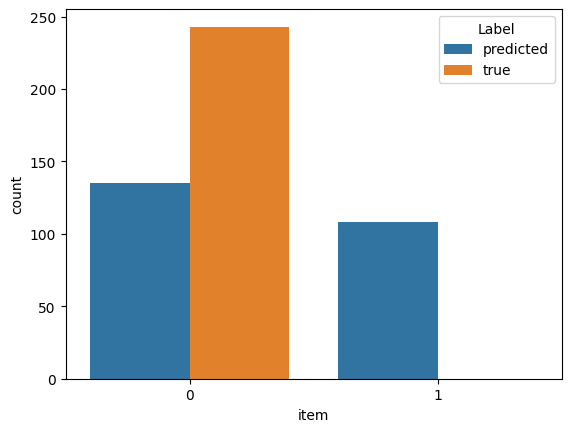

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

### 2 Define Model : Logistic 73% | 56%


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(x2_2, y2_2['FORMER_ECIG_SMOKER'], test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: ',logreg.score(X_test, y_test))

Accuracy of logistic regression classifier on test set:  0.7392086330935251


In [ ]:
y_list=y_test.to_list()
pred_list=y_pred.tolist()

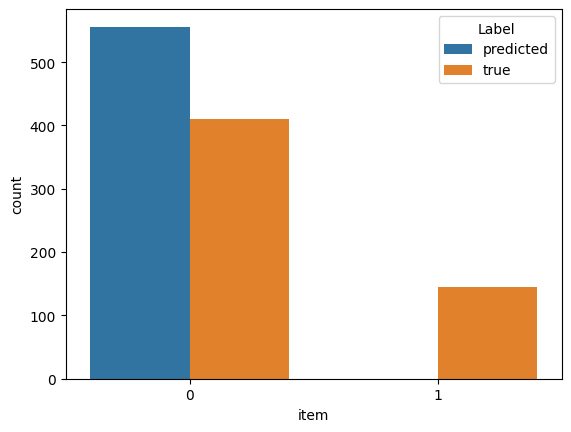

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction Former Smoker 0%

In [ ]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(x2_FormerSmk, y2_FormerSmk['FORMER_ECIG_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
# Use the forest's predict method on the test data
y_pred = logreg.predict(X_testf)

In [ ]:
print('Accuracy of logistic regression classifier on test set: ',logreg.score(X_testf, y_testf))

Accuracy of logistic regression classifier on test set:  0.0


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
y_list=y_testf.to_list()
pred_list=y_pred.tolist()

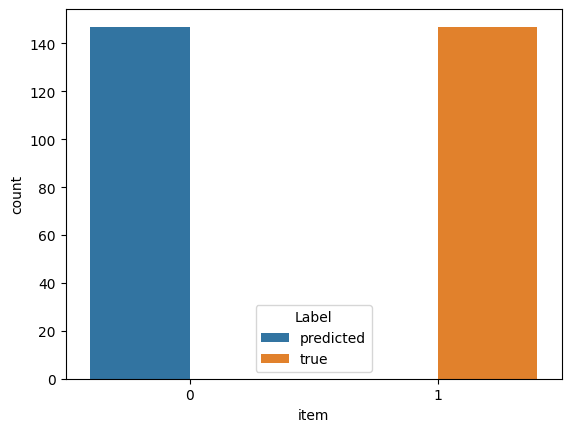

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction No FormerSmk 100%



In [ ]:
X_trainNf, X_testNf, y_trainNf, y_testNf = train_test_split(x2_NonFormerSmk, y2_NonFormerSmk['FORMER_ECIG_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
# Use the forest's predict method on the test data
y_pred = logreg.predict(X_testNf)

In [ ]:
print('Accuracy of logistic regression classifier on test set: ',logreg.score(X_testNf, y_testNf))

Accuracy of logistic regression classifier on test set:  1.0


In [ ]:
y_list=y_testNf.to_list()
pred_list=y_pred.tolist()

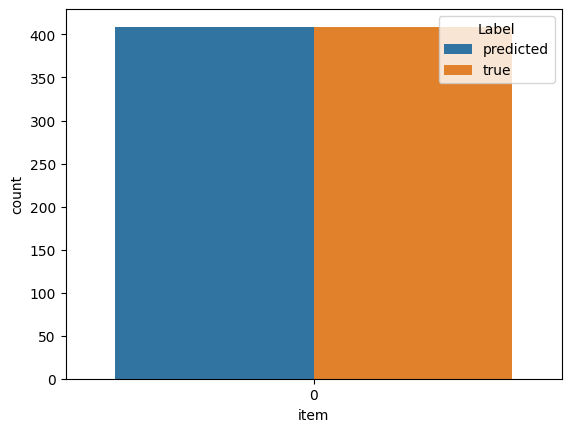

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### SMOTE data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(x2_2, y2_2['FORMER_ECIG_SMOKER'], test_size=0.3, random_state=0)


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res, y_res, test_size=0.3, random_state=0)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: ',logreg.score(X_test, y_test))

Accuracy of logistic regression classifier on test set:  0.5629496402877698


In [ ]:
y_list=y_test.to_list()
pred_list=y_pred.tolist()

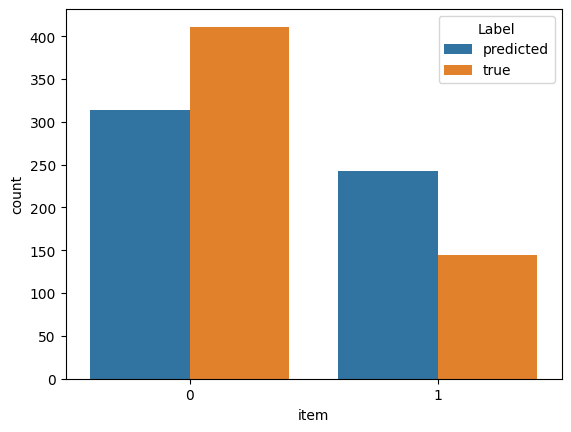

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction Former Smoker 45%

In [ ]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(x2_FormerSmk, y2_FormerSmk['FORMER_ECIG_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
# Use the forest's predict method on the test data
y_pred = logreg.predict(X_testf)

In [ ]:
print('Accuracy of logistic regression classifier on test set: ',logreg.score(X_testf, y_testf))

Accuracy of logistic regression classifier on test set:  0.4557823129251701


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
y_list=y_testf.to_list()
pred_list=y_pred.tolist()

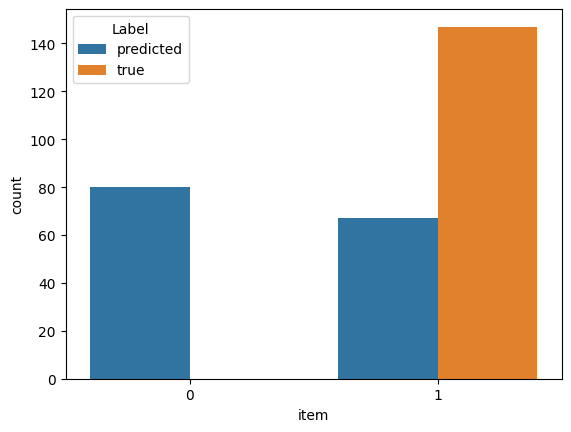

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction No FormerSmk 61%



In [ ]:
X_trainNf, X_testNf, y_trainNf, y_testNf = train_test_split(x2_NonFormerSmk, y2_NonFormerSmk['FORMER_ECIG_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
# Use the forest's predict method on the test data
y_pred = logreg.predict(X_testNf)

In [ ]:
print('Accuracy of logistic regression classifier on test set: ',logreg.score(X_testNf, y_testNf))

Accuracy of logistic regression classifier on test set:  0.6136919315403423


In [ ]:
y_list=y_testNf.to_list()
pred_list=y_pred.tolist()

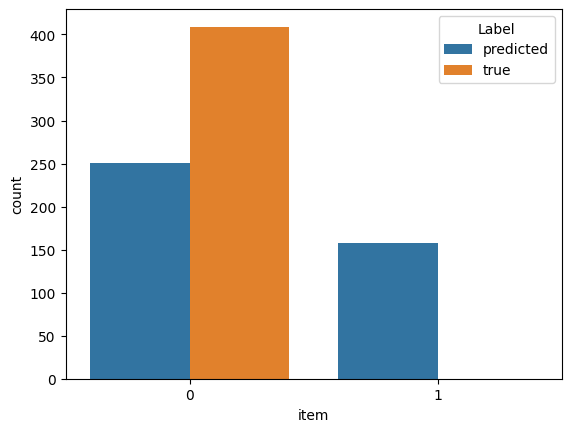

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

## KNN

### 1 Define Model : KNN 89% | SMOTE 89%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x1_2, y1_2['FORMER_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
Y_pred= classifier.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, Y_pred))
print(metrics.f1_score(y_test, Y_pred, average='weighted'))

0.8925269645608629
0.8722494281190771


In [ ]:
y_list=y_test.to_list()
pred_list=Y_pred.tolist()

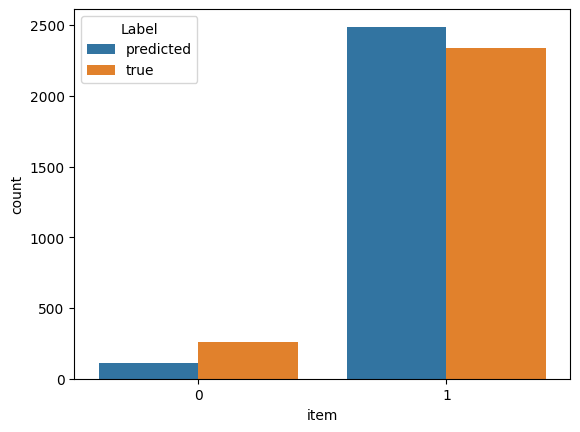

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction No FormerSmk 24%



In [ ]:
X_trainNf, X_testNf, y_trainNf, y_testNf = train_test_split(x1_NonFormerSmk, y1_NonFormerSmk['FORMER_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
Y_pred= classifier.predict(X_testNf)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_testNf, Y_pred))
print(metrics.f1_score(y_testNf, Y_pred, average='weighted'))

0.24691358024691357
0.396039603960396


In [ ]:
y_list=y_testNf.to_list()
pred_list=Y_pred.tolist()

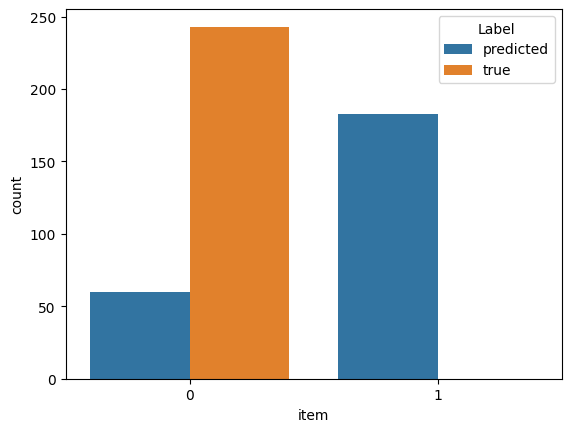

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction Former Smoker 98%

In [ ]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(x1_FormerSmk, y1_FormerSmk['FORMER_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
Y_pred= classifier.predict(X_testf)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_testf, Y_pred))
print(metrics.f1_score(y_testf, Y_pred, average='weighted'))

0.9804504887377815
0.9901287553648068


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
y_list=y_testf.to_list()
pred_list=Y_pred.tolist()

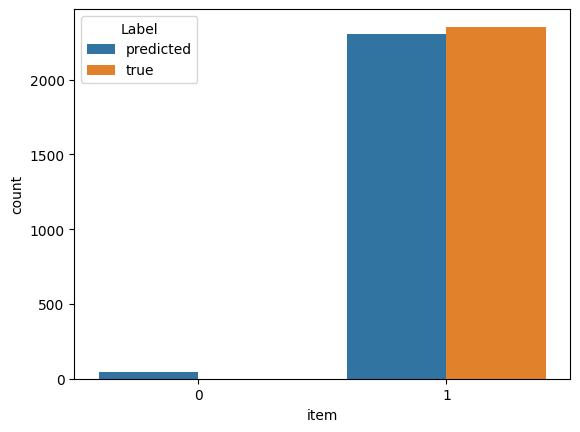

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### SMOTE data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x1_2, y1_2['FORMER_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
Y_pred= classifier.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, Y_pred))
print(metrics.f1_score(y_test, Y_pred, average='weighted'))

0.8925269645608629
0.8722494281190771


In [ ]:
y_list=y_test.to_list()
pred_list=Y_pred.tolist()

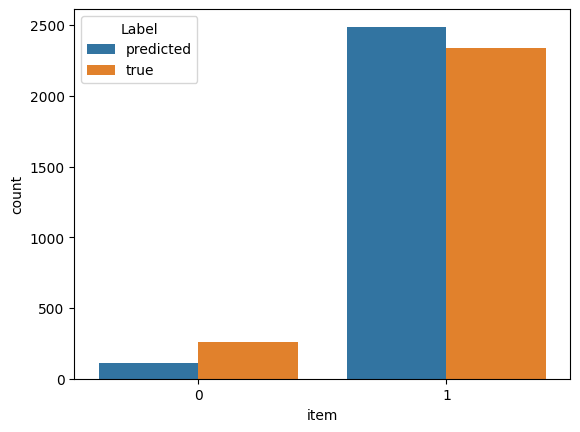

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction No FormerSmk 24%



In [ ]:
X_trainNf, X_testNf, y_trainNf, y_testNf = train_test_split(x1_NonFormerSmk, y1_NonFormerSmk['FORMER_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
Y_pred= classifier.predict(X_testNf)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_testNf, Y_pred))
print(metrics.f1_score(y_testNf, Y_pred, average='weighted'))

0.24691358024691357
0.396039603960396


In [ ]:
y_list=y_testNf.to_list()
pred_list=Y_pred.tolist()

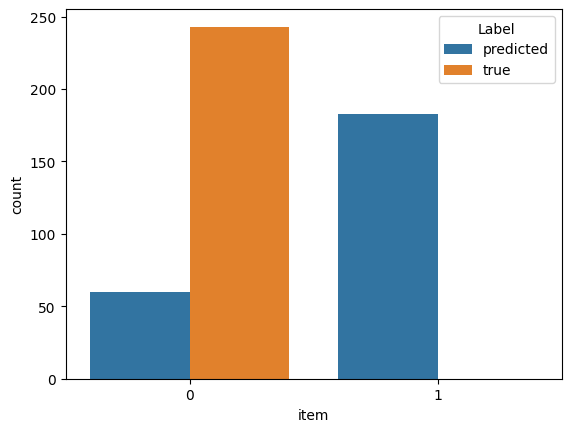

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction Former Smoker 98%

In [ ]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(x1_FormerSmk, y1_FormerSmk['FORMER_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
Y_pred= classifier.predict(X_testf)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_testf, Y_pred))
print(metrics.f1_score(y_testf, Y_pred, average='weighted'))

0.9804504887377815
0.9901287553648068


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
y_list=y_testf.to_list()
pred_list=Y_pred.tolist()

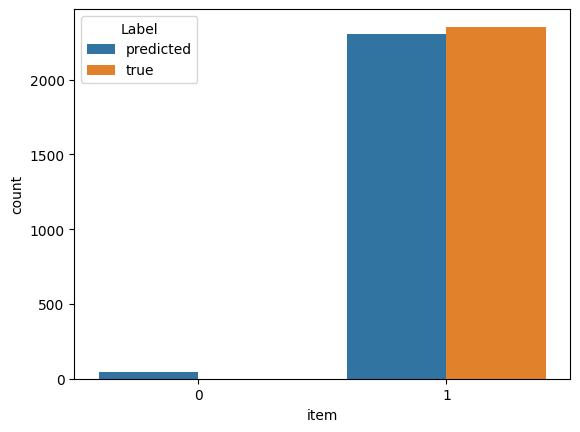

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

### 2 Define Model : KNN 69% | SMOTE 69%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x2_2, y2_2['FORMER_ECIG_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
Y_pred= classifier.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, Y_pred))
print(metrics.f1_score(y_test, Y_pred, average='weighted'))

0.6906474820143885
0.6634963975551642


In [ ]:
y_list=y_test.to_list()
pred_list=Y_pred.tolist()

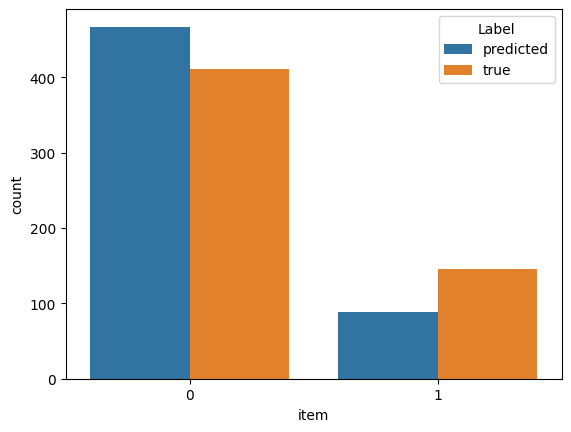

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

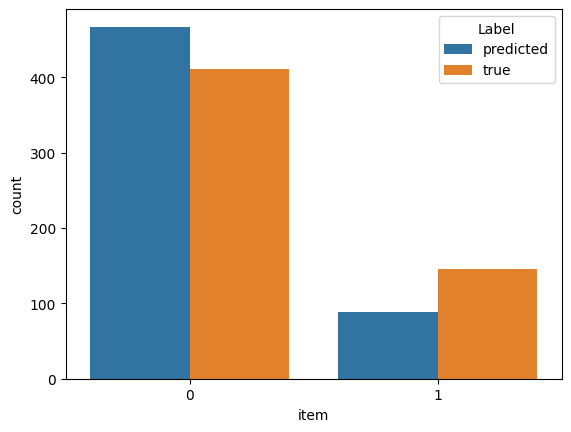

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction No FormerSmk 91%



In [ ]:
X_trainNf, X_testNf, y_trainNf, y_testNf = train_test_split(x2_NonFormerSmk, y2_NonFormerSmk['FORMER_ECIG_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
Y_pred= classifier.predict(X_testNf)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_testNf, Y_pred))
print(metrics.f1_score(y_testNf, Y_pred, average='weighted'))

0.9193154034229829
0.9579617834394905


In [ ]:
y_list=y_testNf.to_list()
pred_list=predictions.tolist()

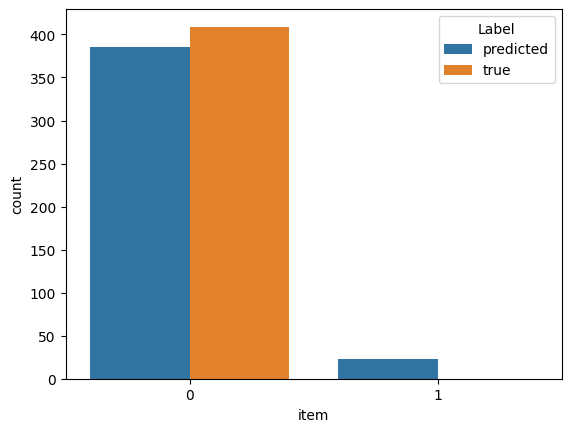

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction Former Smoker 35%

In [ ]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(x2_FormerSmk, y2_FormerSmk['FORMER_ECIG_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
Y_pred= classifier.predict(X_testf)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_testf, Y_pred))
print(metrics.f1_score(y_testf, Y_pred, average='weighted'))

0.35374149659863946
0.5226130653266332


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
y_list=y_testf.to_list()
pred_list=Y_pred.tolist()

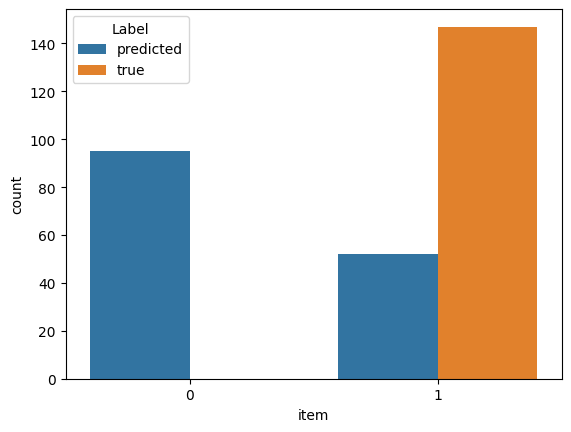

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### SMOTE data

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE( random_state=42, k_neighbors=5)

In [ ]:
X_res, y_res = sm.fit_resample(x2_2, y2_2['FORMER_ECIG_SMOKER'])

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res, y_res, test_size=0.3, random_state=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x2_2, y2_2['FORMER_ECIG_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train1, y_train1)

KNeighborsClassifier()

In [ ]:
Y_pred= classifier.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, Y_pred))
print(metrics.f1_score(y_test, Y_pred, average='weighted'))

0.6906474820143885
0.7094781960547885


In [ ]:
y_list=y_test.to_list()
pred_list=Y_pred.tolist()

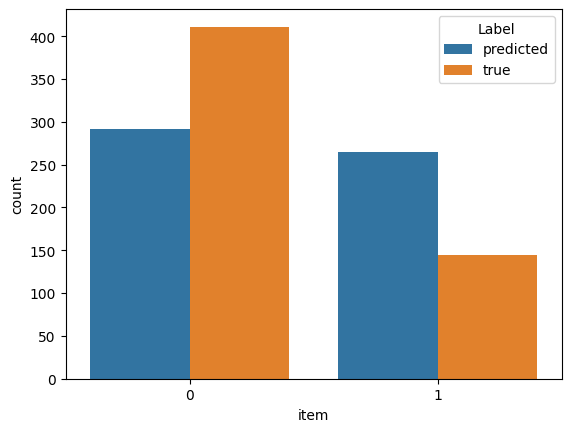

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction No FormerSmk 68%



In [ ]:
X_trainNf, X_testNf, y_trainNf, y_testNf = train_test_split(x2_NonFormerSmk, y2_NonFormerSmk['FORMER_ECIG_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
Y_pred= classifier.predict(X_testNf)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_testNf, Y_pred))
print(metrics.f1_score(y_testNf, Y_pred, average='weighted'))

0.6821515892420538
0.811046511627907


In [ ]:
y_list=y_testNf.to_list()
pred_list=predictions.tolist()

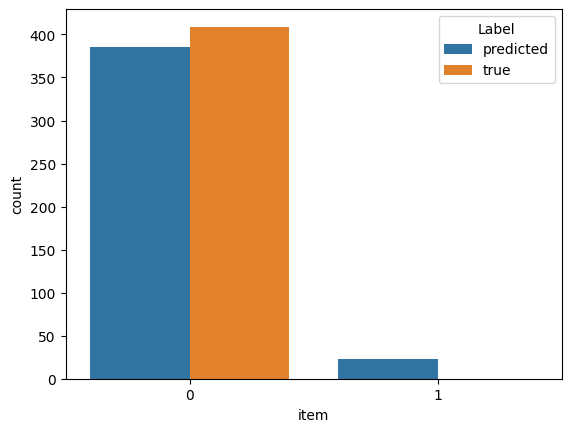

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()

##### Prediction Former Smoker 85%

In [ ]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(x2_FormerSmk, y2_FormerSmk['FORMER_ECIG_SMOKER'], test_size=0.3, random_state=0)

In [ ]:
Y_pred= classifier.predict(X_testf)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_testf, Y_pred))
print(metrics.f1_score(y_testf, Y_pred, average='weighted'))

0.8503401360544217
0.9191176470588236


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
y_list=y_testf.to_list()
pred_list=Y_pred.tolist()

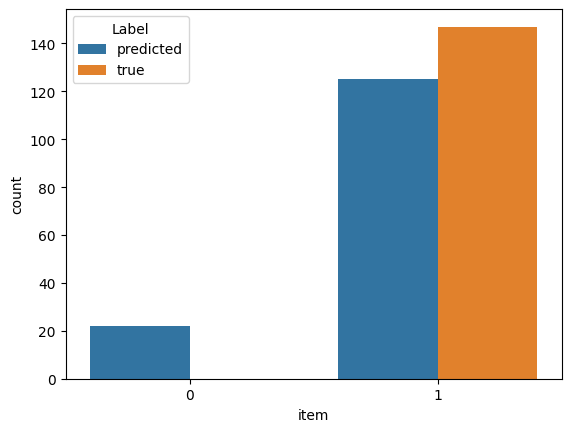

In [ ]:
df = pd.DataFrame({"item" : pred_list+y_list,
                   "Label" : ['predicted']*len(pred_list) + ['true']*len(y_list)})

sns.countplot(data=df, x="item", hue="Label")

plt.show()